<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/estudos_de_python_em_financas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
# @# markdown codigo é o ticker na B3. Data é ano/mes/dia.

codigo  = 'petr4'       #@param {type:"string"}
inicio  = '2007-01-28'  #@param {type:"date"}
termino = '2023-08-08'  #@param {type:"date"}


usar_periodo = True #@param {type:"boolean"}
if usar_periodo :
  periodo = '5y' #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
#else: #periodo em anos
#  periodo = ((datetime.strptime(termino,'%Y-%m-%d') #
#               - datetime.strptime(inicio,'%Y-%m-%d')).days)/365
codigo = codigo.upper()

In [190]:
#@markdown Importação de alguns pacotes do python

import warnings
warnings.filterwarnings('ignore')

##import datetime
from datetime import datetime, date
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

# !pip install -q googletrans==4.0.0rc1
from googletrans import Translator
translator = Translator()
# from google.colab import data_table

# !pip install -q yfinance --upgrade --no-cache
import yfinance as yf

## plotly
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import cufflinks # para conectar o plotly ao pandas
cufflinks.go_offline()

'''
 https://github.com/nicolaskruchten/plotly_img_test/blob/master/Untitled.ipynb
'''
#@markdown e renderização
meio = 'png' #@param ['svg', 'colab' , 'jpg' , 'png' , 'vscode']

# if meio != 'colab' :
#     !pip install -U kaleido
#     import kaleido

import plotly.io as pio
pio.renderers.default = meio

# 0 @ markdown uso o 'svg/jpg' pra enviar para o github,
# @ markdown porem perde o modo interativo do plotly

import textwrap
from IPython.display import clear_output
clear_output()

In [191]:
#@markdown A empresa e Indicadores fundamentalistas, dados do fundamentus.com.br

tk_info = yf.Ticker(codigo+".sa")
info = tk_info.get_info()
# info
try: L52 = info['fiftyTwoWeekLow']
except: L52 = None
try : H52 = info['fiftyTwoWeekHigh']
except: H52 = None
try: HP = info['targetHighPrice']
except: HP = None
try: LP = info['targetLowPrice']
except: LP = None
try: MP = info['targetMeanPrice']
except: MP = None
try: mP = info['targetMedianPrice']
except: mP = None
rec = translator.translate(info['recommendationKey'], dest='pt').text
try: nAnal = info['numberOfAnalystOpinions']
except: nAnal = None
message = (
     f"\n\n\n De acordo com o yahoo finance, dentre {nAnal} analistas, "
     f"o menor preço-alvo é {LP}, "
     f"o maior {HP},"
     f"o preço alvo médio é {MP}, a mediana {mP}. "
     f'A recomentação é "{rec}".'
     f'Nas últimas 52 semanas o maior preço foi {H52} e o menor {L52}.'
)

print(codigo)
print("\n".join(textwrap.wrap(translator.translate(info['longBusinessSummary'], dest='pt').text,118)))

print("\n".join(textwrap.wrap(message,118)))


PETR4
Petróleo Brasileiro S.A. - A Petrobras explora, produz e vende petróleo e gás no Brasil e internacionalmente.A empresa
opera através de três segmentos: exploração e produção;Refino, transporte e marketing;e gás e energia.O segmento de
exploração e produção explora, desenvolve e produz petróleo bruto, líquidos de gás natural e gás natural
principalmente para suprimentos para as refinarias domésticas.O segmento de refino, transporte e marketing se envolve
no refinamento, logística, transporte, aquisição e exportações de petróleo bruto;e produção de fertilizantes, além de
manter interesses em empresas petroquímicas.O segmento de gás e energia está envolvido na logística e na negociação de
gás natural e eletricidade;transporte e negociação de GNL;geração de eletricidade através de usinas
termoelétricas;negócios de energia renovável;serviços de baixo carbono;e negócios de processamento de gás natural, bem
como a produção de biodiesel e seus co-produtos.A empresa também se envolve em p

In [192]:
import requests
#pra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

url = 'https://www.fundamentus.com.br/resultado.php'


#junta com a requests
r = requests.get(url, headers=header)
# read_html do pandas põe a tabela num dataframe
funds = pd.read_html(r.text, decimal=',', thousands='.',encoding='ISO-8859-1')
dfunds = pd.DataFrame(funds[0])

(dfunds.loc[dfunds['Papel']==codigo]).set_index('Papel')

Cotação   P/L  P/VP    PSR Div.Yield  P/Ativo  P/Cap.Giro  P/EBIT  \
Papel                                                                      
PETR4    36.72  4.35  1.18  0.976    17,52%    0.449       39.63    2.14   

       P/Ativ Circ.Liq  EV/EBIT  EV/EBITDA Mrg Ebit Mrg. Líq.  Liq. Corr.  \
Papel                                                                       
PETR4            -0.97     3.16       2.37   45,57%    22,56%        1.08   

         ROIC     ROE    Liq.2meses   Patrim. Líq  Dív.Brut/ Patrim.  \
Papel                                                                  
PETR4  23,30%  27,02%  1.556280e+09  4.076360e+11               0.76   

      Cresc. Rec.5a  
Papel                
PETR4        19,89%

In [193]:
#@markdown A empresa e Indicadores fundamentalistas dados do statusinvest.com.br

#@markdown (pode ter atraso, dados não são pegos diretamente no SI)

url = 'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/SI_Acoes.csv'
pd.set_option('display.max_columns', None)
fundsSI = pd.read_csv(url,sep=';' , decimal=',' ,thousands ='.' )

In [194]:
print('INDICADORES DE VALUATION')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[[ 'DY', 'P/L', 'P/VP', 'P/ATIVOS', 'P/EBIT', 'EV/EBIT', 'PSR' ,' VPA', ' LPA', ' PEG Ratio',
                                                        'P/CAP. GIRO', 'P. AT CIR. LIQ.']]

INDICADORES DE VALUATION


DY   P/L  P/VP  P/ATIVOS  P/EBIT  EV/EBIT   PSR    VPA   LPA  \
TICKER                                                                    
PETR4   17.67  4.08  1.18      0.45    2.47     3.71  0.97  31.25  8.99   

         PEG Ratio  P/CAP. GIRO  P. AT CIR. LIQ.  
TICKER                                            
PETR4        -0.11        39.63            -0.53

In [195]:
print('INDICADORES DE  EFICIÊNCIA')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[['MARGEM BRUTA','MARGEM EBIT', 'MARG. LIQUIDA']]

INDICADORES DE  EFICIÊNCIA


MARGEM BRUTA  MARGEM EBIT  MARG. LIQUIDA
TICKER                                          
PETR4          52.07         39.1          23.67

In [196]:
print('INDICADORES DE  ENDIVIDAMENTO')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[['DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'LIQ. CORRENTE','PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS']]

INDICADORES DE  ENDIVIDAMENTO


DIVIDA LIQUIDA / EBIT  DIV. LIQ. / PATRI.  LIQ. CORRENTE  \
TICKER                                                             
PETR4                    1.17                0.56           1.08   

        PATRIMONIO / ATIVOS  PASSIVOS / ATIVOS  
TICKER                                          
PETR4                  0.38               0.62

In [197]:
print('INDICADORES DE RENTABILIDADE')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[['ROE', 'ROA', 'ROIC','GIRO ATIVOS']]

INDICADORES DE RENTABILIDADE


ROE    ROA   ROIC  GIRO ATIVOS
TICKER                                  
PETR4   28.77  10.99  19.56         0.46

In [198]:
print('INDICADORES DE CRESCIMENTO')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[['CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS']]

INDICADORES DE CRESCIMENTO


CAGR RECEITAS 5 ANOS  CAGR LUCROS 5 ANOS
TICKER                                          
PETR4                  17.72                 NaN

#### Informações financeiras  últimos trimestres

**DRE**

In [199]:
def adicionar_espacos(s):
    resultado = [s[0]]

    for char_atual in s[1:]:
        if char_atual.isupper() and resultado[-1].islower():
            resultado.append(' ')
        resultado.append(char_atual)

    return ''.join(resultado)

In [200]:
dre = tk_info.quarterly_financials
dre = dre[dre.columns[::-1]]

k=[]
v=[]
for i in dre.index:
    #print(i)
    j = adicionar_espacos(i)
    k.append(i)
    #print(translator.translate(i, dest='pt').text)
    v.append(translator.translate(j, dest='pt').text)
trad = dict(zip(k, v))
dre_trimestre = dre.rename(index=trad)
dre_trimestre

2022-09-30  \
Efeito tributário de itens incomuns                           NaN   
Taxa de imposto para calcs                                    NaN   
Ebitda normalizada                                            NaN   
Itens totais incomuns                                         NaN   
Itens incomuns totais excluindo a boa vontade                 NaN   
Lucro líquido da operação contínua juros minori...            NaN   
Depreciação reconciliada                                      NaN   
Custo reconciliado da receita                                 NaN   
EBITDA                                                        NaN   
EBIT                                                          NaN   
Receita líquida de juros                                      NaN   
Despesa de juros                                              NaN   
Rendimentos de juros                                  175000000.0   
Renda normalizada                                             NaN   
Lucro líquido da operação continuada e desconti...            NaN   
Despesas totais                                               NaN   
Aluguel de despesas suplementares                             NaN   
Receita operacional total conforme relatado         14170000000.0   
Ações médias diluídas                                         NaN   
Ações médias básicas                                          NaN   
EPS diluído                                                   NaN   
EPS básico                                                    NaN   
Ni diluído disponível para acionistas                         NaN   
Lucro líquido acionistas ordinários                           NaN   
Resultado líquido                                             NaN   
Interesses minoritários                                       NaN   
Lucro líquido, incluindo juros não controladores              NaN   
Operações contínuas de lucro líquido                          NaN   
Provisão de imposto                                           NaN   
Renda antes dos impostos                                      NaN   
Outras despesas de renda                                      NaN   
Outras despesas de receita não operacional                    NaN   
Encargos de renda especial                                    NaN   
Ganho na venda de EPI                                         NaN   
Outras cobranças especiais                                    NaN   
Eliminar                                               -1000000.0   
Comprometimento de ativos de capital                  255000000.0   
Ganhos de juros patrimoniais                                  NaN   
Ganho na venda de segurança                                   NaN   
Despesas de receita de juros não operacionais l...            NaN   
Outro custo financeiro total                                  NaN   
Despesa de juros não operando                                 NaN   
Receita de juros não operacional                      175000000.0   
Receita operacional                                           NaN   
Despesa operacional                                           NaN   
Outras despesas de operação                                   NaN   
Outros impostos                                               NaN   
Provisão para contas duvidosas                                NaN   
Demonstrução de resultado da depleção de depura...            NaN   
Pesquisa e desenvolvimento                                    NaN   
Vendendo geral e administração                                NaN   
Despesas de venda e marketing                                 NaN   
Despesa geral e administrativa                                NaN   
Outra gand a                                           85000000.0   
Taxas de aluguel e pouso                                      NaN   
Salários e remunerações                                       NaN   
Lucro bruto                                                   NaN   
Custo de receita                                     

**Balanço**

In [201]:
balanco = tk_info.get_balance_sheet(freq='quarterly')
balanco = balanco[balanco.columns[::-1]]

k=[]
v=[]
for i in balanco.index:
    j = adicionar_espacos(i)
    # print(adicionar_espacos(i))
    k.append(i)
    #print(translator.translate(i, dest='pt').text)
    v.append(translator.translate(j, dest='pt').text)
traducao = dict(zip(k, v))
balanco_trimestre=balanco.rename(index=traducao)
balanco_trimestre

2022-12-31     2023-03-31  \
Número de ações do Tesouro                                NaN       295669.0   
Número de ações ordinárias                                NaN  13044201261.0   
Ação emitida                                              NaN  13044496930.0   
Dívida líquida                                            NaN  19546000000.0   
Dívida total                                              NaN  53349000000.0   
...                                                       ...            ...   
Equivalentes em dinheiro e investimentos de cur...        NaN  13169000000.0   
Outros investimentos de curto prazo                       NaN   2879000000.0   
Caixa e equivalentes de caixa                             NaN  10290000000.0   
Equivalentes em dinheiro                                  NaN  10155000000.0   
Cash Financial                                            NaN    135000000.0   

                                                       2023-06-30  \
Número de ações do Tesouro                               295669.0   
Número de ações ordinárias                          13044201261.0   
Ação emitida                                        13044496930.0   
Dívida líquida                                      18877000000.0   
Dívida total                                        57971000000.0   
...                                                           ...   
Equivalentes em dinheiro e investimentos de cur...  12655000000.0   
Outros investimentos de curto prazo                  2304000000.0   
Caixa e equivalentes de caixa                       10351000000.0   
Equivalentes em dinheiro                            10239000000.0   
Cash Financial                                        112000000.0   

                                                       2023-09-30  \
Número de ações do Tesouro                             29031369.0   
Número de ações ordinárias                          13015465561.0   
Ação emitida                                        13044496930.0   
Dívida líquida                                      17352000000.0   
Dívida total                                        60997000000.0   
...                                                           ...   
Equivalentes em dinheiro e investimentos de cur...  13409000000.0   
Outros investimentos de curto prazo                  1299000000.0   
Caixa e equivalentes de caixa                       12110000000.0   
Equivalentes em dinheiro                            59961270600.0   
Cash Financial                                       1022267400.0   

                                                       2023-12-31  \
Número de ações do Tesouro                            104359669.0   
Número de ações ordinárias                          12940137261.0   
Ação emitida                                        13044496930.0   
Dívida líquida                                      16074000000.0   
Dívida total                                        62600000000.0   
...                                                           ...   
Equivalentes em dinheiro e investimentos de cur...  15546000000.0   
Outros investimentos de curto prazo                  2819000000.0   
Caixa e equivalentes de caixa                       12727000000.0   
Equivalentes em dinheiro                            12624000000.0   
Cash Financial                                        103000000.0   

                                                       2024-03-31  
Número de ações do Tesouro                            135209269.0  
Número de ações ordinárias                          12909287661.0  
Ação emitida                                        13044496930.0  
Dívida líquida                                      16191000000.0  
Dívida total                                        61838000000.0  
...                                                           ...  
Equivalentes em dinheiro e investimentos de cur...  16365000000.0  
Outros investimentos de curto prazo                  481800

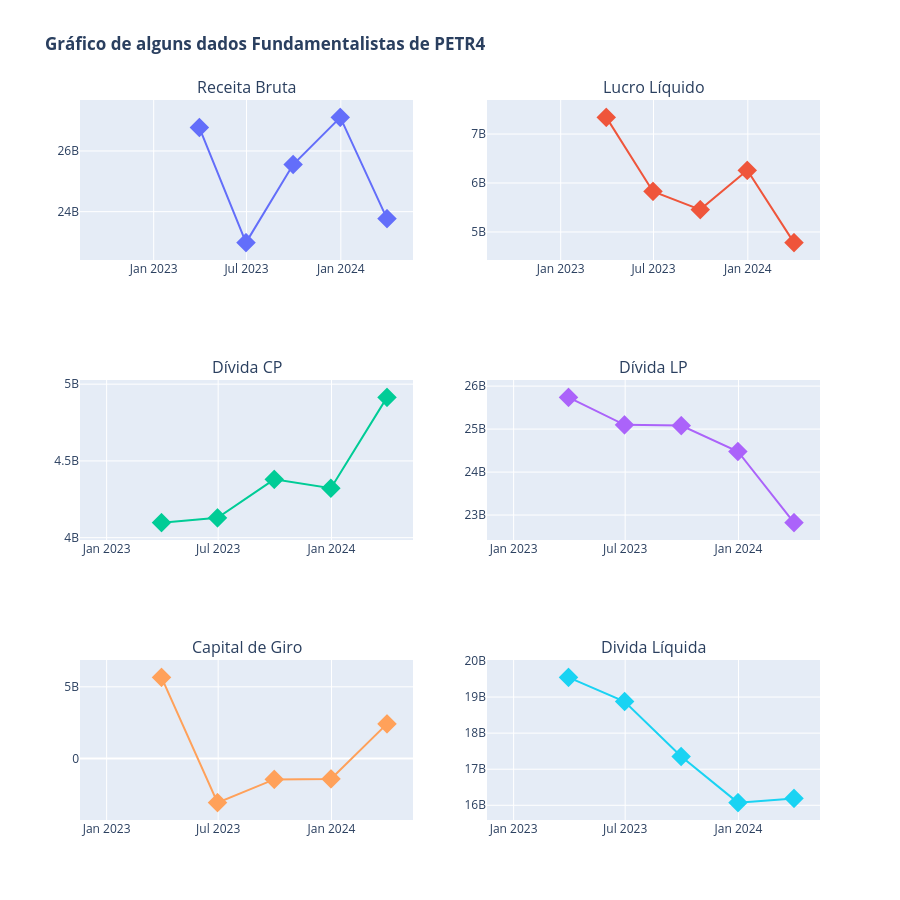

In [202]:
fig = make_subplots(rows=3,
                    cols=2,
                    row_heights=[5,5,5],
                    column_widths=[3,3],
                    subplot_titles=('Receita Bruta', 'Lucro Líquido',
                                    'Dívida CP', 'Dívida LP',
                                    'Capital de Giro','Divida Líquida',
                                    ),
                    shared_xaxes=False)
try:fig.add_trace(go.Scatter(name='Receita_bruta', x=dre.columns, y=dre.loc['Operating Revenue'], mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=1, col=1)
except:pass
try:fig.add_trace(go.Scatter(name='Receita_liquida', x=dre.columns, y=dre.loc['Net Income'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=1, col=2)
except:pass

try: fig.add_trace(go.Scatter(name='Divida_CP', x=balanco.columns, y=balanco.loc['CurrentDebt'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=2, col=1)
except:pass
try:fig.add_trace(go.Scatter(name='Divida_CP', x=balanco.columns, y=balanco.loc['LongTermDebt'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=2, col=2)
except:pass

try:fig.add_trace(go.Scatter(name='WC', x=balanco.columns, y=balanco.loc['WorkingCapital'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=3, col=1)
except:pass
try:fig.add_trace(go.Scatter(name='Divida_liquida', x=balanco.columns, y=balanco.loc['NetDebt'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=3, col=2)
except:pass

fig.update_layout(title_text=f'<b>Gráfico de alguns dados Fundamentalistas de {codigo}<b>',
                  showlegend=False, #esconder ou mostrar legenda
                  height=900, #altura
                  width=900) #largura
fig.show()

Empresas do mesmo setor


In [203]:
# empresaas X setores
url = 'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/setores.csv'
setores = pd.read_csv(url, sep =',')
setor=setores[setores['TICKER']==codigo[0:4]]['SETOR'].values[0]
mesmo_setor = setores[setores['SETOR'] == setores[setores['TICKER']==codigo[0:4]]['SETOR'].values[0]]
mesmo_setor['NOME'] = mesmo_setor['NOME'].str.strip()
# print(*mesmo_setor.TICKER.values)

#pegar o ticker de maior volume da empresa de acordo com o IBrA
url='https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_IBrA.csv'
IBRA = pd.read_csv(url, sep =';' , encoding='latin-1' , decimal=',' , thousands='.' , skiprows=1 , index_col=False)
IBRA = IBRA[:-2].sort_values(by='Part. (%)',ascending=False)

#pegar o ticker de maior volume da empresa de acordo com o IBr100
url='https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_IBr100.csv'
IBR100 = pd.read_csv(url, sep =';' , encoding='latin-1' , decimal=',' , thousands='.' , skiprows=1 , index_col=False)
IBR100 = IBR100[:-2].sort_values(by='Part. (%)',ascending=False)

url='https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/acoes-listadas-b3.csv'
listagem = pd.read_csv(url, sep =',' , encoding='utf-8' , decimal=',' , thousands='.' ,index_col=False)
# listagem = listagem.Ticker

lista_indice100 = []
lista_indiceA = []
mesmo_setor_linhas = []
for tck in mesmo_setor['TICKER']:
    linha = IBR100[IBR100['Código'].str.contains(tck)].first_valid_index()
    if linha != None : lista_indice100.append(linha)
    linha = IBRA[IBRA['Código'].str.contains(tck)].first_valid_index()
    if linha != None : lista_indiceA.append(linha)
    linha = listagem[listagem['Ticker'].str.contains(tck)].first_valid_index()
    if linha != None : mesmo_setor_linhas.append(linha)

IBr100 = list(IBR100[IBR100.index.isin(lista_indice100)]['Código'].values)
if codigo in IBr100 : IBr100.remove(codigo)
IBrA = list(IBRA[IBRA.index.isin(lista_indiceA)]['Código'].values)
if codigo in IBrA : IBrA.remove(codigo)

mesmo_setor_tickers =  list(listagem.Ticker.loc[mesmo_setor_linhas].values)

if len(IBrA)<=2 : IBr = mesmo_setor_tickers
else : IBr = IBrA

print('setor: ')
print(setor)
print(*list(mesmo_setor.NOME))
print(*mesmo_setor_tickers)
print(f'Ações do setor {setor} no indice IBR100: ')
print(*IBr100)
print(f'Ações do setor {setor} no indice IBRA: ')
print(*IBrA)

media_pl = dfunds[dfunds['Papel'].isin(list(mesmo_setor_tickers)+[codigo])]['P/L'].mean()
print(f'\nO P/L médio das empresas do setor {setor} é {media_pl:.2f}')
media_pl_indice = dfunds[dfunds['Papel'].isin(IBrA+[codigo])]['P/L'].mean()
print(f'\nO P/L médio das empresas do setor {setor} no índice amplo é {media_pl_indice:.2f}')
print(f'\n P/L de {codigo} é', (dfunds.loc[dfunds['Papel']==codigo])['P/L'].values[0] )

setor: 
Petróleo, Gás e Biocombustíveis
3R PETROLEUM COSAN ENAUTA PART PET MANGUINH PETROBRAS PETRORECSA PETRORIO RAIZEN ULTRAPAR VIBRA LUPATECH OCEANPACT OSX BRASIL
RRRP3 CSAN3 ENAT3 RPMG3 PETR4 RECV3 PRIO3 RAIZ4 UGPA3 VBBR3 LUPA3 OPCT3 OSXB3
Ações do setor Petróleo, Gás e Biocombustíveis no indice IBR100: 
PRIO3 UGPA3 VBBR3 CSAN3 RRRP3 RECV3 RAIZ4
Ações do setor Petróleo, Gás e Biocombustíveis no indice IBRA: 
PRIO3 UGPA3 VBBR3 CSAN3 RRRP3 RECV3 ENAT3 RAIZ4 LUPA3

O P/L médio das empresas do setor Petróleo, Gás e Biocombustíveis é 21.37

O P/L médio das empresas do setor Petróleo, Gás e Biocombustíveis no índice amplo é 26.49

 P/L de PETR4 é 4.35


Cotação     P/L  P/VP Div.Yield  Dív.Brut/ Patrim.  Liq. Corr.  \
Papel                                                                   
LUPA3     1.55    1.16  0.42     0,00%               1.02        1.36   
VBBR3    20.93    4.28  1.41     7,16%               0.95        2.20   
PETR4    36.72    4.35  1.18    17,52%               0.76        1.08   
PRIO3    41.33    7.28  2.39     0,17%               0.72        1.87   
RECV3    18.25    8.64  1.15    10,98%               0.19        1.05   
UGPA3    21.59    9.23  1.74     3,01%               1.04        1.68   
CSAN3    12.89   13.37  1.17     3,50%               3.18        1.79   
RRRP3    25.61   39.24  1.17     1,50%               1.81        1.27   
RAIZ4     2.89   57.46  1.40     6,70%               2.21        1.10   
ENAT3    20.46  119.91  1.31     0,00%               0.74        2.17   

       EV/EBIT Mrg. Líq.     ROE Cresc. Rec.5a  
Papel                                           
LUPA3   -14.35    55,40%  35,85%        58,15%  
VBBR3     6.08     3,35%  33,06%        20,41%  
PETR4     3.16    22,56%  27,02%        19,89%  
PRIO3     6.16    41,20%  32,89%        66,69%  
RECV3     8.16    21,81%  13,32%        37,67%  
UGPA3     6.44     2,14%  18,87%        12,80%  
CSAN3     9.94    14,03%   8,74%        36,66%  
RRRP3     8.48     2,54%   2,97%       169,63%  
RAIZ4     9.25     0,28%   2,44%        29,35%  
ENAT3    27.03     2,58%   1,09%        17,84%

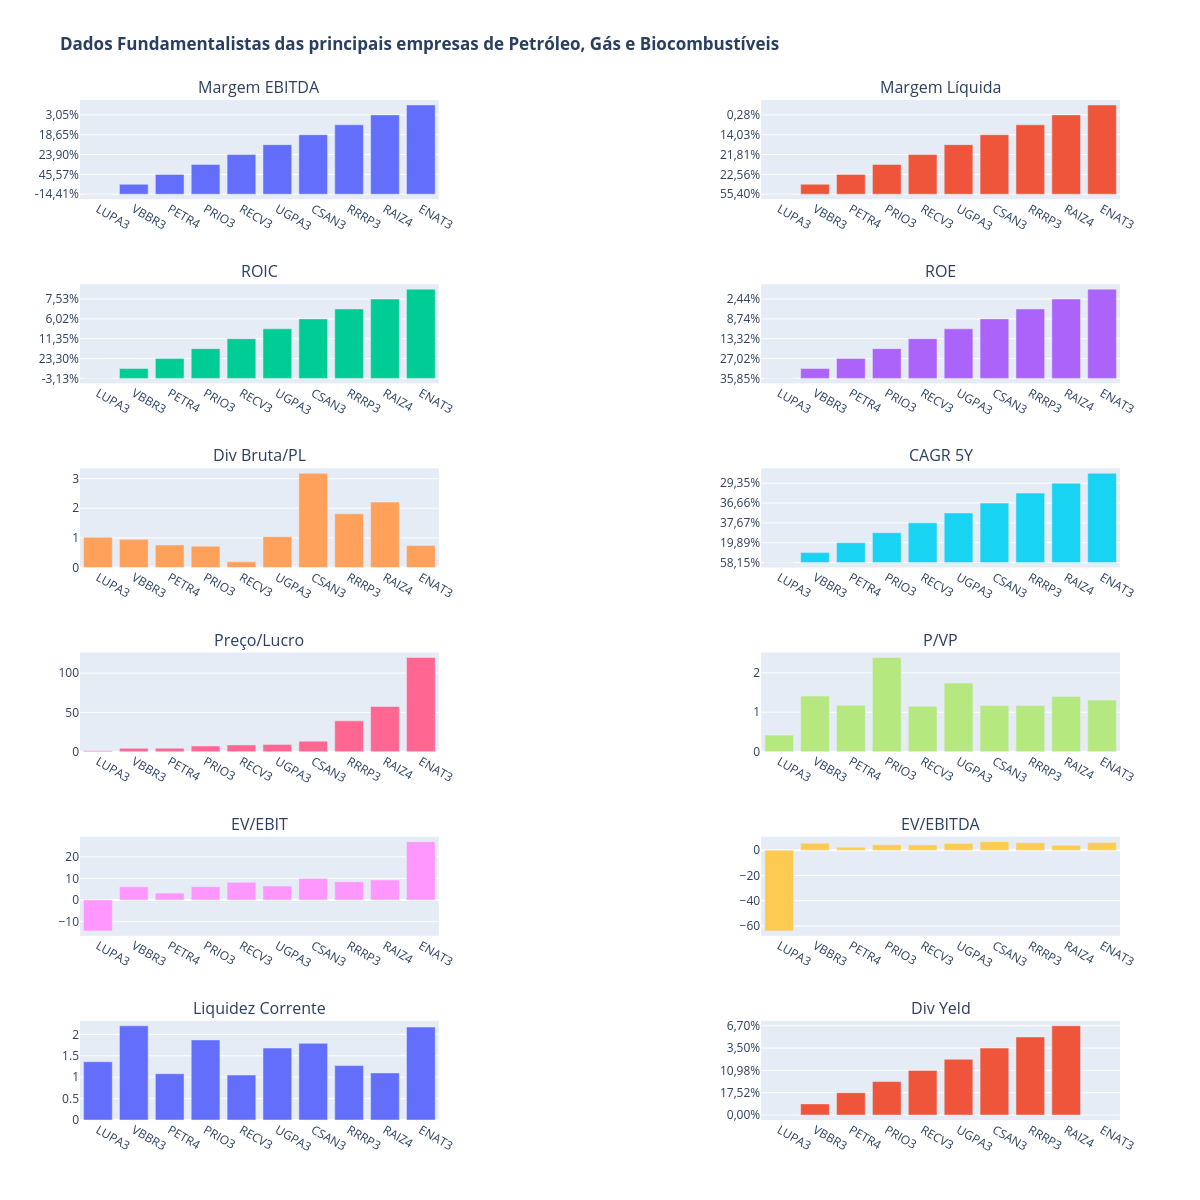

In [204]:
display(dfunds[dfunds['Papel'].isin(IBr+[codigo])].set_index('Papel')[['Cotação','P/L', 'P/VP', 'Div.Yield', 'Dív.Brut/ Patrim.', 'Liq. Corr.','EV/EBIT', 'Mrg. Líq.', 'ROE','Cresc. Rec.5a']])

luc = dfunds[dfunds['Papel'].isin(IBrA+[codigo])].set_index('Papel')[['Mrg. Líq.' , 'Mrg Ebit' , 'ROIC', 'ROE', 'Div.Yield', 'Cresc. Rec.5a']]
end = dfunds[dfunds['Papel'].isin(IBrA+[codigo])].set_index('Papel')[['Dív.Brut/ Patrim.']]
val = dfunds[dfunds['Papel'].isin(IBrA+[codigo])].set_index('Papel')[['P/L', 'P/VP', 'EV/EBIT', 'EV/EBITDA']]
liq = dfunds[dfunds['Papel'].isin(IBrA+[codigo])].set_index('Papel')[['Liq. Corr.']]

fig = make_subplots(rows=6,
                    cols=2,
                    row_heights=[5,5,5,5,5,5],
                    column_widths=[3,3],
                    subplot_titles=('Margem EBITDA', 'Margem Líquida',
                                    'ROIC', 'ROE',
                                    'Div Bruta/PL', 'CAGR 5Y',
                                    'Preço/Lucro', 'P/VP',
                                    'EV/EBIT', 'EV/EBITDA',
                                    'Liquidez Corrente', 'Div Yeld'),
                    horizontal_spacing=0.31,
                    shared_xaxes=False)

fig.add_trace(go.Bar(name='Margem_Ebtida', x=luc.index, y=luc['Mrg Ebit']), row=1, col=1)
fig.add_trace(go.Bar(name='Margem_Liquida', x=luc.index, y=luc['Mrg. Líq.']), row=1, col=2)

fig.add_trace(go.Bar(name='ROIC', x=luc.index, y=luc['ROIC']), row=2, col=1)
fig.add_trace(go.Bar(name='ROE', x=luc.index, y=luc['ROE']), row=2, col=2)

fig.add_trace(go.Bar(name='div/patr', x=end.index, y=end['Dív.Brut/ Patrim.']), row=3, col=1)
fig.add_trace(go.Bar(name='c5y', x=luc.index, y=luc['Cresc. Rec.5a']), row=3, col=2)

fig.add_trace(go.Bar(name='pl', x=val.index, y=val['P/L']), row=4, col=1)
fig.add_trace(go.Bar(name='pvp', x=val.index,y=val['P/VP']), row=4, col=2)

fig.add_trace(go.Bar(name='evebit', x=val.index, y=val['EV/EBIT']), row=5, col=1)
fig.add_trace(go.Bar(name='evebitda', x=val.index, y=val['EV/EBITDA']), row=5, col=2)

fig.add_trace(go.Bar(name='liq', x=liq.index, y=liq['Liq. Corr.']), row=6, col=1)
fig.add_trace(go.Bar(name='dy', x=luc.index, y=luc['Div.Yield']), row=6, col=2)

fig.update_layout(title_text=f'<b>Dados Fundamentalistas das principais empresas de {setor}<b>',
                #   template='plotly_dark',#template pré-definido da plotly
                  showlegend=False, #esconder ou mostrar legenda
                  height=1200, #altura
                  width=1200) #largura
fig.show()

In [205]:
#@markdown

# def get_setor_data(setor=None):

#     url = 'http://www.fundamentus.com.br/resultado.php?setor={}'.format(setor)
#     content = requests.get(url, headers=header)
#     df = pd.read_html(content.text, decimal=",", thousands='.')[0]
#     return list(df['Papel'])

# def list_setor():
#     from tabulate import tabulate
#     print( tabulate(df, headers=['label','desc','id'], tablefmt='presto') )
#     return None

# setores = [ 1 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 2 ,
#     20 , 21 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 3 , 30 , 31
#     , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 4 , 40 , 41 , 42 , 43 , 5
#     , 6 , 7 , 8 , 9 ]

# ## Setores:
# setor = [
#    [ 'agro'            , 'Agropecuária'                       , 42 ] ,
#    [ 'saneamento'      , 'Água e Saneamento'                  , 33 ] ,
#    [ 'alimentos'       , 'Alimentos'                          , 15 ] ,
#    [ 'bebidas'         , 'Bebidas'                            , 16 ] ,
#    [ 'com1'            , 'Comércio'                           , 27 ] ,
#    [ 'com2'            , 'Comércio'                           , 12 ] ,
#    [ 'com3'            , 'Comércio e Distribuição'            , 20 ] ,
#    [ 'computadores'    , 'Computadores e Equipamentos'        , 28 ] ,
#    [ 'construcao'      , 'Construção e Engenharia'            , 13 ] ,
#    [ 'engenharia'      , 'Construção e Engenharia'            , 13 ] ,
#    [ 'diversos'        , 'Diversos'                           , 26 ] ,
#    [ 'embalagens'      , 'Embalagens'                         , 6  ] ,
#    [ 'energia'         , 'Energia Elétrica'                   , 32 ] ,
#    [ 'equipamentos'    , 'Equipamentos Elétricos'             , 9  ] ,
#    [ 'imoveis'         , 'Exploração de Imóveis'              , 39 ] ,
#    [ 'financeiro'      , 'Financeiros'                        , 35 ] ,
#    [ 'fumo'            , 'Fumo'                               , 17 ] ,
#    [ 'gas'             , 'Gás'                                , 34 ] ,
#    [ 'holdings'        , 'Holdings Diversificadas'            , 40 ] ,
#    [ 'hoteis'          , 'Hoteis e Restaurantes'              , 24 ] ,
#    [ 'restaurantes'    , 'Hoteis e Restaurantes'              , 24 ] ,
#    [ 'papel'           , 'Madeira e Papel'                    , 5  ] ,
#    [ 'maquinas'        , 'Máquinas e Equipamentos'            , 10 ] ,
#    [ 'materiais'       , 'Materiais Diversos'                 , 7  ] ,
#    [ 'transporte'      , 'Material de Transporte'             , 8  ] ,
#    [ 'midia'           , 'Mídia'                              , 23 ] ,
#    [ 'mineracao'       , 'Mineração'                          , 2  ] ,
#    [ 'outros'          , 'Outros'                             , 41 ] ,
#    [ 'petroleo'        , 'Petróleo, Gás e Biocombustíveis'    , 1  ] ,
#    [ 'previdencia'     , 'Previdência e Seguros'              , 38 ] ,
#    [ 'seguros'         , 'Previdência e Seguros'              , 38 ] ,
#    [ 'usopessoal'      , 'Prods. de Uso Pessoal e de Limpeza' , 18 ] ,
#    [ 'limpeza'         , 'Prods. de Uso Pessoal e de Limpeza' , 18 ] ,
#    [ 'programas'       , 'Programas e Serviços'               , 29 ] ,
#    [ 'quimicos'        , 'Químicos'                           , 4  ] ,
#    [ 'saude'           , 'Saúde'                              , 19 ] ,
#    [ 'securitizadoras' , 'Securitizadoras de Recebíveis'      , 36 ] ,
#    [ 'servicos'        , 'Serviços'                           , 11 ] ,
#    [ 'finandiversos'   , 'Serviços Financeiros Diversos'      , 37 ] ,
#    [ 'siderurgia'      , 'Siderurgia e Metalurgia'            , 3  ] ,
#    [ 'tecidos'         , 'Tecidos, Vestuário e Calçados'      , 21 ] ,
#    [ 'vestuario'       , 'Tecidos, Vestuário e Calçados'      , 21 ] ,
#    [ 'telecom'         , 'Telecomunicações'                   , 43 ] ,
#    [ 'telefoniafixa'   , 'Telefonia Fixa'                     , 30 ] ,
#    [ 'telefoniamovel'  , 'Telefonia Móvel'                    , 31 ] ,
#    [ 'transporte'      , 'Transporte'                         , 14 ] ,
#    [ 'utilidades'      , 'Utilidades Domésticas'              , 22 ] ,
#    [ 'viagens'         , 'Viagens e Lazer'                    , 25 ] ,
# ]

In [206]:
#@markdown Download dos preços históricos do ativo(s) e do índice

ativo = pd.DataFrame()
ibov = pd.DataFrame()
if usar_periodo :
  ativo = yf.download(codigo+'.SA', period = periodo , actions=True , progress = False)
  ibov = yf.download('^BVSP', period = periodo , actions=True , progress = False)
else :
  ativo = yf.download(codigo+'.SA' , start=inicio , end=termino , actions=True ,  progress = False)
  ibov = yf.download('^BVSP', start=inicio , end=termino , actions=True, progress = False)

**Eventos**

In [207]:
if len(ativo[ativo['Stock Splits']!=0])>0 : ativo[ativo['Stock Splits']!=0][['Stock Splits']]

In [208]:
ativo=ativo.loc['2009-06-03':]
ativo

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2019-06-21  27.950001  28.389999  27.950001  28.280001   9.782899  58424700   
2019-06-24  28.320000  28.379999  28.120001  28.250000   9.772524  27365000   
2019-06-25  28.139999  28.160000  27.379999  27.510000   9.516536  56472100   
2019-06-26  27.549999  27.930000  27.520000  27.670000   9.571883  48901500   
2019-06-27  27.440001  27.549999  27.010000  27.230000   9.419674  55219200   
...               ...        ...        ...        ...        ...       ...   
2024-06-17  34.410000  35.130001  34.270000  34.810001  34.810001  40941800   
2024-06-18  34.889999  36.139999  34.820000  35.900002  35.900002  36180700   
2024-06-19  35.900002  36.119999  35.570000  35.930000  35.930000  20776200   
2024-06-20  36.220001  36.889999  36.200001  36.500000  36.500000  39442900   
2024-06-21  36.549999  36.959999  36.380001  36.689999  36.689999  43340200   

            Dividends  Stock Splits  
Date                                 
2019-06-21        0.0           0.0  
2019-06-24        0.0           0.0  
2019-06-25        0.0           0.0  
2019-06-26        0.0           0.0  
2019-06-27        0.0           0.0  
...               ...           ...  
2024-06-17        0.0           0.0  
2024-06-18        0.0           0.0  
2024-06-19        0.0           0.0  
2024-06-20        0.0           0.0  
2024-06-21        0.0           0.0  

[1244 rows x 8 columns]

### Histórico de dividendos

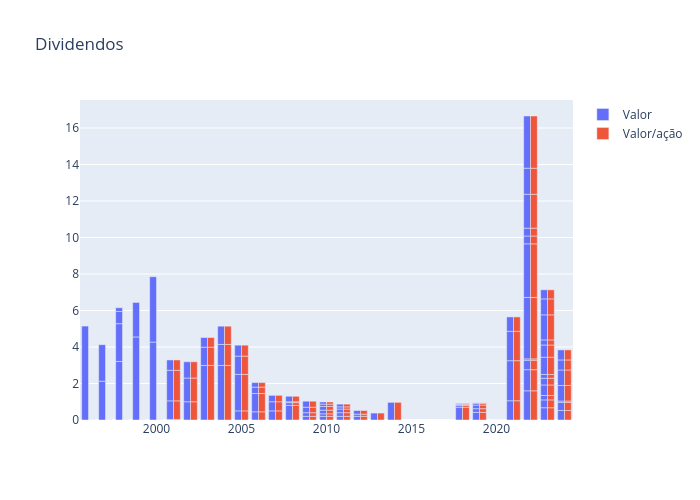

In [209]:
url1 = f'https://www.fundamentus.com.br/proventos.php?papel={codigo}&tipo=2'
header = { "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36", "X-Requested-With": "XMLHttpRequest"}
r1 = requests.get(url1, headers=header)
dy = pd.read_html(r1.text, decimal=',', thousands='.')[0]
dy['Data'] = pd.to_datetime(dy['Data'] , dayfirst=True)
dy.set_index('Data',inplace =True )
dy['Valor/acao'] = dy['Valor']/dy['Por quantas ações']

fig = go.Figure(
    [ go.Bar(x=dy.index.year , y = dy['Valor'],name='Valor'),
     go.Bar(x=dy.index.year , y = dy['Valor/acao'],name='Valor/ação')],
    layout=dict(title='Dividendos ',height=500, width=700 ))
fig.show()

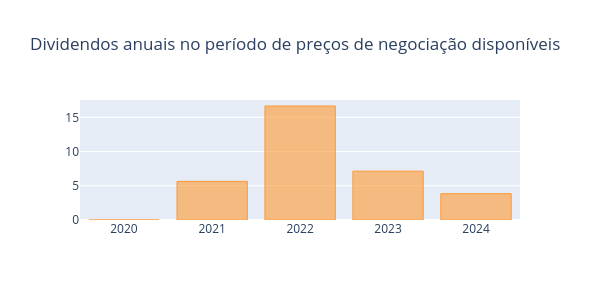

In [210]:
yanual = dy['Valor'].groupby(pd.Grouper(freq='YS')).sum()
if len(yanual.index) > 6 :
    yanual[(yanual.index >= ativo.index[0]) & (yanual.index < ativo.index[-1])].iplot(kind='bar',layout=dict(title='Dividendos anuais no período de preços de negociação disponíveis',height=300, width=600))

In [211]:
if (ativo.index[0].year <= date.today().year - 7) :  apartir = dy[dy.index.year > date.today().year - 7 ]
else : apartir = dy.copy()
# apartir['Valor'].iplot(kind='bar',layout=dict(title='Dividendos nos últimos 6 anos',height=350, width=700))

In [212]:
apartir_anual = apartir['Valor'].groupby(pd.Grouper(freq='YS')).sum()
# apartir_anual.iplot(kind='bar',layout=dict(title='Dividendos anuais nos últimos 6 anos',height=300, width=600))

In [213]:
print(f'Distribuição de {codigo}', end=' ')
print(f'em {( (ativo.index[-1].year -1) - ativo.index[0].year)} anos, R$ {round(yanual[(yanual.index >= ativo.index[0]) & (yanual.index < ativo.index[-1])].sum(),2)}')
print(f'provento anual medio R$ {round(yanual[(yanual.index >= ativo.index[0]) & (yanual.index < ativo.index[-1])].mean(),2)}')
print(f"preço fechamento médio R$ {round( np.mean(ativo['Adj Close']),2 )}")
print(f"DY por essas médias {round( 100*(apartir.Valor.sum()/5) / (ativo['Adj Close'].mean()),2)}%")

Distribuição de PETR4 em 4 anos, R$ 33.28
provento anual medio R$ 6.66
preço fechamento médio R$ 16.27
DY por essas médias 116.2%


#### Nos últimos 6 anos
tendência do yield

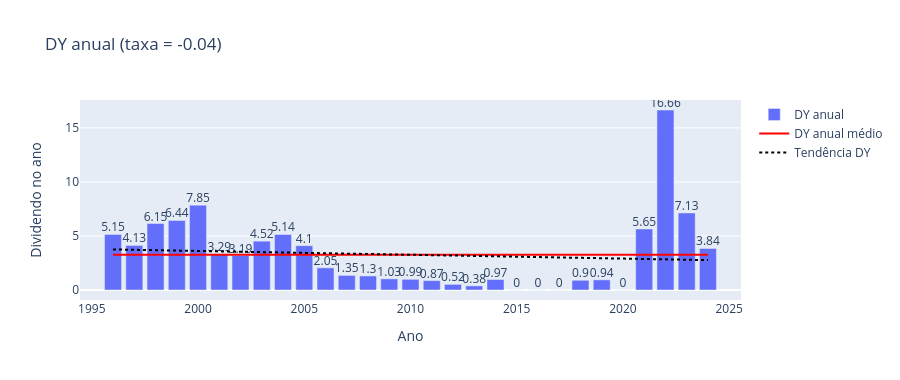

In [214]:
df_m, df_b = np.polyfit(apartir_anual.index.year, apartir_anual.values, 1)

fig = go.Figure()

fig.add_trace(
    go.Bar(name='DY anual',
    x=apartir_anual.index.year,
    y=apartir_anual.values
))

fig.add_trace(
    go.Scatter(
    x=apartir_anual.index.year,
    y=apartir_anual.values,
    text= apartir_anual.values.round(decimals=2),
    mode='text',
    textposition='top center',
    textfont=dict(size=12),
    showlegend=False
))


fig.add_trace(go.Scatter(name='DY anual médio',
    x=apartir_anual.index.year,
    y=[apartir_anual.values.mean()]*len(apartir_anual.index.year),
    mode='lines',
    line = dict(color = 'red' , width=2)
))

# fig.add_trace(
#     go.Scatter(name='variação percentual DY', visible='legendonly',
#     x=yanual.index.year,
#     y=yanual.pct_change().fillna(0),
#     mode='lines',
#     marker = dict(color = 'brown')
# ))

fig.add_trace(
    go.Scatter(name='Tendência DY',
    x=apartir_anual.index.year,
    y=df_m*apartir_anual.index.year+df_b,
    mode='lines',
    line = dict(color = 'black', dash='dot')
))

fig.update_layout(title= f"DY anual (taxa = {df_m:.2f})" , width=900, height=380 )
fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="Dividendo no ano")

fig.show()

# preço


In [215]:
ativo[['Open','High','Low','Close','Adj Close','Volume']]

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-06-21  27.950001  28.389999  27.950001  28.280001   9.782899  58424700
2019-06-24  28.320000  28.379999  28.120001  28.250000   9.772524  27365000
2019-06-25  28.139999  28.160000  27.379999  27.510000   9.516536  56472100
2019-06-26  27.549999  27.930000  27.520000  27.670000   9.571883  48901500
2019-06-27  27.440001  27.549999  27.010000  27.230000   9.419674  55219200
...               ...        ...        ...        ...        ...       ...
2024-06-17  34.410000  35.130001  34.270000  34.810001  34.810001  40941800
2024-06-18  34.889999  36.139999  34.820000  35.900002  35.900002  36180700
2024-06-19  35.900002  36.119999  35.570000  35.930000  35.930000  20776200
2024-06-20  36.220001  36.889999  36.200001  36.500000  36.500000  39442900
2024-06-21  36.549999  36.959999  36.380001  36.689999  36.689999  43340200

[1244 rows x 6 columns]

In [216]:
qual_preco = 'Adj Close' #@param ['Open','High','Close','Low','Adj Close']


In [217]:
preco = pd.DataFrame()
preco = pd.merge(ativo[qual_preco],ibov[qual_preco],left_index = True, right_index = True, how = 'inner')
preco.columns = [codigo,"ibov"]
preco

PETR4      ibov
Date                           
2019-06-21   9.782899  102013.0
2019-06-24   9.772524  102062.0
2019-06-25   9.516536  100093.0
2019-06-26   9.571883  100689.0
2019-06-27   9.419674  100724.0
...               ...       ...
2024-06-17  34.810001  119138.0
2024-06-18  35.900002  119630.0
2024-06-19  35.930000  120261.0
2024-06-20  36.500000  120446.0
2024-06-21  36.689999  121341.0

[1244 rows x 2 columns]

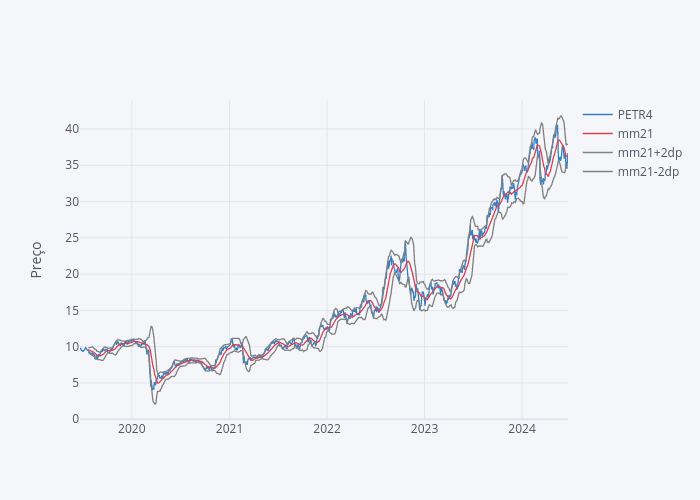

In [218]:
# Bandas com média movel 21 periodos e 2dp
preco['mm21'] = preco[codigo].rolling(21).mean()
Mov_SD = preco[codigo].rolling(21).std(ddof=0)
preco['mm21+2dp'] = preco['mm21'] + 2*Mov_SD
preco['mm21-2dp'] = preco['mm21'] - 2*Mov_SD
preco.loc['2019':].iplot(keys = [codigo,'mm21','mm21+2dp','mm21-2dp'], yTitle='Preço',
                         colors=['blue','red','gray','gray'] )

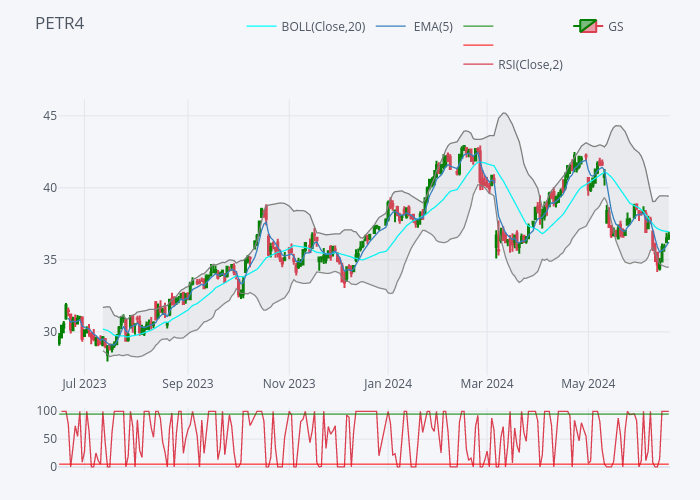

In [219]:
if len(ativo>254) :
  qf=cufflinks.QuantFig(ativo[-254:],title=codigo,legend='top',name='GS',up_color='green', down_color='red' )
  qf.add_bollinger_bands(periods=20, boll_std=2, colors=['cyan','grey'], fill=True)
  qf.add_ema(periods=5)
  qf.add_rsi(periods=2,color='red',rsi_upper=95,rsi_lower=5,showbands=True)
#   qf.add_macd(fast_period=9,slow_period=21,signal_period=3)
#   qf.add_resistance(date='2023-02-17', on='close', color='orange')

  fig = qf.figure()
  fig.update_xaxes(rangebreaks=[dict(bounds=["sat", "mon"])])
  fig.show()

###simulação de preços
 [movimento browniano geométrico](https://pt.wikipedia.org/wiki/Movimento_browniano_geom%C3%A9trico) (GBM):


Esse modelo simula o comportamento de uma ação usando a fórmula

$$
S_t = S_{t-\Delta t}e^{\left( \mu - \frac{\sigma^2}{2} \right) \Delta t + \sigma z_t \sqrt{\Delta t}}
$$

em que $S_0$ e $S_t$ são o preço da ação no início e no instante $t$, respectivamente,  $\mu$ e $\sigma$ são a média e o desvio padrão do retorno esperado de uma ação, e $z_i$ é uma componente aleatória --- um número sorteado a partir de uma [distribuição normal](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal) com média 0 e desvio padrão 1 --- e $\Delta t$ é o número de dias das taxa de retorno (como estamos trabalhando com retorno diário $\Delta t=1$)
$$
S_t = S_{0}e^{\left( \mu - \frac{\sigma^2}{2} \right) t + \sigma z_t }
$$
A componente $\exp{\left( \mu - {\sigma^2}/{2} \right)t}$ é conhecida como **deriva** (*drift*) e modela uma tendência determinística do preço da ação: $S_t = S_0 \exp{\left( \mu - {\sigma^2}/{2} \right)t}$.

A componente $\exp {\sigma W_t}$ é conhecida como **difusão** (*diffusion*), e é usado para modelar um conjunto de eventos imprevisíveis que ocorrem durante este movimento.

Obviamente não temos como saber a sequência correta de retornos, mas a título de ilustração,  podemos usar a própria sequência de eventos de retorno.

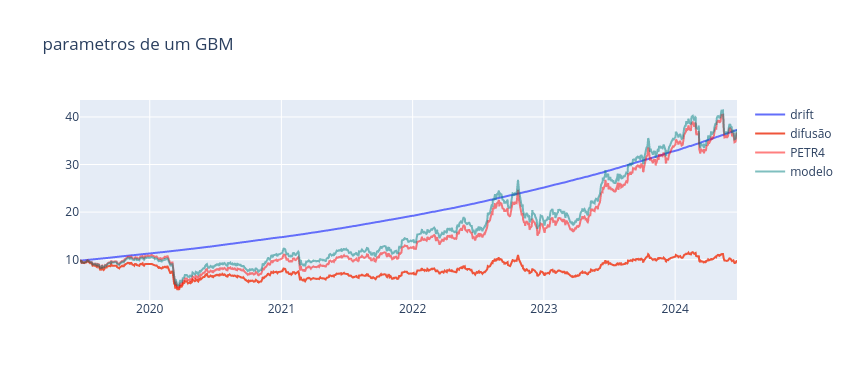

In [220]:
rate = preco[codigo].pct_change().fillna(0)
s_media = rate.mean()
s_devp  = rate.std()
S0 = preco[codigo][0]

drift = pd.Series(s_media - (s_devp**2)/2 , index=preco.index)
St_dri = S0*np.exp(drift.cumsum())

Z = ( rate - s_media) / s_devp
diffusion = Z * s_devp
St_dif = S0*np.exp(diffusion.cumsum())

St = S0 * np.exp((drift+diffusion).cumsum())

trace1 = go.Scatter(x=preco.index , y = St_dri , name='drift')
trace2 = go.Scatter(x=preco.index , y = preco[codigo] , name=codigo, line=dict(color='rgba(1.0 ,0, 0, 0.5)'))
trace3 = go.Scatter(x=preco.index , y = St_dif , name='difusão')
trace4 = go.Scatter(x=preco.index , y = St , name='modelo' , line=dict(color='rgba(0, 0.5, 0.5, 0.5)'))
figdata = [trace1,trace3,trace2,trace4]
fig = go.Figure(data=figdata)
fig.update_layout(title='parametros de um GBM', height=380, width=850 )

fig.show()

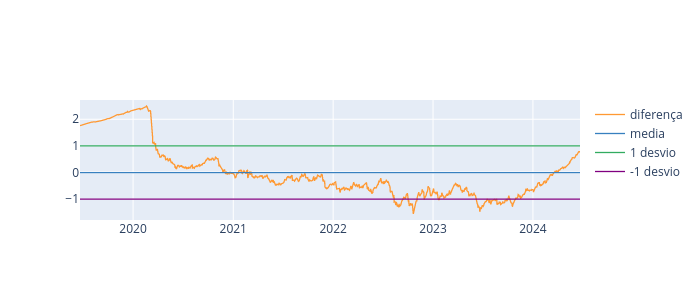

In [221]:
diferenca = pd.DataFrame()
diferenca['diferença'] = (preco[codigo] - St)
diferenca['media'] = diferenca['diferença'].mean()
diferenca['1 desvio'] = diferenca['diferença'].std()
diferenca['diferença'] = (diferenca['diferença'] - diferenca['media'])/diferenca['1 desvio']
diferenca['media'] = 0
diferenca['1 desvio'] = 1
diferenca['-1 desvio'] = -1

diferenca.iplot(layout=dict(height=300, width=700 ))

Na simulação do preço, trocamos a sequência conhecida de eventos por uma sequência de eventos chamada de processo de Wiener ou processo Browniano. No modelo,  W  é sorteado a partir de uma distrinuição normal com média 0 e desvio padrão 1:

In [222]:
# Função para simular o GBM
def simula(S0 , dias , mu , sigma , n_paths, seed=None):
    np.random.seed(seed)
    dt = 1 / dias  # Número de dias de negociação no período de simulação ) :
    S = []
    for i in range(n_paths):
        path = []
        for t in range(dias+1):
            if t == 0 :
                path.append(S0)
            else:
               z = np.random.normal(0.0, 1.0)
               St = path[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
               path.append(St)
        S.append(path)
    return np.array(S)

In [223]:
n_dias = 5#@param {type:"integer"}
n_cenarios = 1000#@param {type:"integer"}
n_grafico = 10*n_dias

In [224]:
simulacao = simula(preco[codigo].iloc[-1] , n_dias , s_media , s_devp , n_cenarios).transpose()
# simulacao

In [225]:
# Criar DataFrame com os preços simulados
dias_simulados = pd.date_range(start=preco.index[-1], periods=n_dias+1 ,freq='B')  # Considerando dias úteis
df_simulado = pd.DataFrame(simulacao , index = dias_simulados )
df_simulado.iloc[:, :10].head()

0          1          2          3          4          5  \
2024-06-21  36.689999  36.689999  36.689999  36.689999  36.689999  36.689999   
2024-06-24  36.851875  36.003174  36.951500  36.704870  36.597392  36.853412   
2024-06-25  36.660215  35.650563  37.286372  36.263968  35.397198  36.999965   
2024-06-26  36.240807  35.885399  37.788985  35.861192  35.502054  37.986603   
2024-06-27  36.168342  36.449473  37.791386  36.467531  36.330377  38.118583   

                    6          7          8          9  
2024-06-21  36.689999  36.689999  36.689999  36.689999  
2024-06-24  36.069228  37.105359  36.233733  36.278426  
2024-06-25  35.449085  37.725815  36.149440  36.371838  
2024-06-26  36.009863  37.711801  35.981910  36.147019  
2024-06-27  36.368768  37.603201  36.624885  37.366364

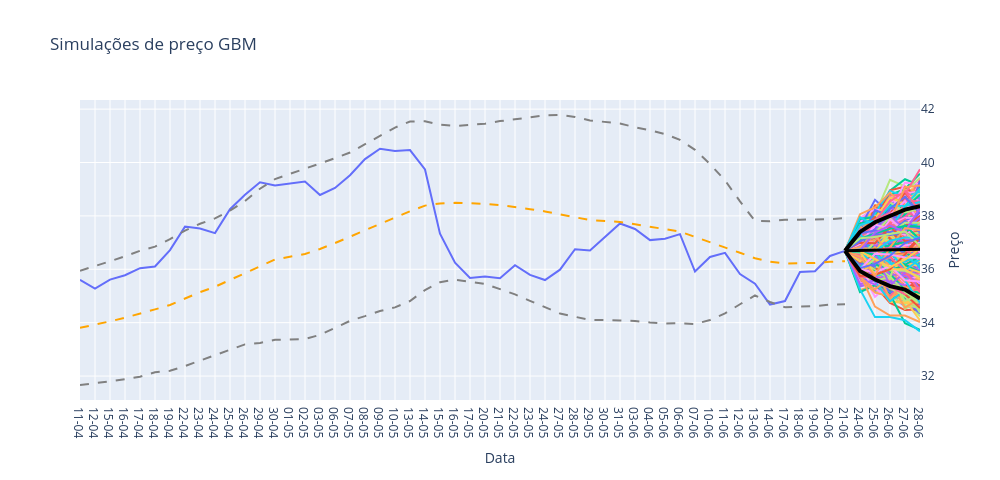

In [226]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=preco[codigo].iloc[-n_grafico:].index , y =preco[codigo].iloc[-n_grafico:]  , mode='lines' , name = 'preço'))

for i in range(n_cenarios):
    fig.add_trace(go.Scatter(x=df_simulado.index , y = df_simulado[i]  , mode='lines' ))
    fig.data[i+1].update(showlegend=False)

fig.add_trace(go.Scatter(x=df_simulado.index , y = df_simulado.quantile(0.05,axis=1) , mode='lines' , line=dict(color='black',width=4), name='percentil 5'))
fig.add_trace(go.Scatter(x=df_simulado.index , y = df_simulado.quantile(0.5,axis=1)  , mode='lines' , line=dict(color='black',width=3), name='mediana'))
fig.add_trace(go.Scatter(x=df_simulado.index , y = df_simulado.quantile(0.95,axis=1) , mode='lines' , line=dict(color='black',width=4), name='percentil 95'))

fig.add_trace(go.Scatter(name='mm21',
                         x=preco[codigo].iloc[-n_grafico:].index ,
                         y= preco['mm21'].iloc[-n_grafico:].values,
                         mode='lines', line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(name='mm21+2dp',
                         x=preco[codigo].iloc[-n_grafico:].index ,
                         y= preco['mm21+2dp'].iloc[-n_grafico:].values,
                         mode='lines', line=dict(color='gray', dash='dash') ))
fig.add_trace(go.Scatter(name='mm21-2dp',
                         x=preco[codigo].iloc[-n_grafico:].index ,
                         y= preco['mm21-2dp'].iloc[-n_grafico:].values,
                         mode='lines',line=dict(color='gray', dash='dash')))

fig.update_layout(
    title='Simulações de preço GBM',
    xaxis=dict(title='Data', dtick='D', tickformat='%d-%m', rangebreaks=[dict(bounds=["sat", "mon"])]),  # Excluir sábado e domingo
    yaxis=dict(title='Preço', side='right'),  # Posicionando os rótulos do eixo y no lado esquerdo
    width=1000,
    height=480,
    showlegend=False
)

# fig.update_xaxes(dtick='D', tickformat='%d-%m' ,
#     rangebreaks=[
#         dict(bounds=["sat", "mon"]),  # Excluir sábado e domingo
#     ]
# )

fig.show()

intervalo de confiança para preços na  simulação


In [227]:
def ic ( m,s, alfa) :
    l, u = stats.norm.interval(confidence=alfa,  loc=m , scale= s)
    return "{:.2f}".format(l), "{:.2f}".format(u)

alfa=.9

for i in range(n_dias):
    m = np.mean(df_simulado.iloc[i+1])
    s = stats.sem(df_simulado.iloc[i+1])

    print(f'dia {str(i+1)}: {str(100*alfa)}% -> ' , end='')
    print(f'({ic(m,s,alfa)[0]} , {ic(m,s,alfa)[1]})' , end='     95% ->')
    print(f'({ic(m,s,alfa+.05)[0]} , {ic(m,s,alfa+.05)[1]})' , end='     99% ->')
    print(f'({ic(m,s,alfa+.09)[0]} , {ic(m,s,alfa+.09)[1]})')

dia 1: 90.0% -> (36.66 , 36.71)     95% ->(36.66 , 36.71)     99% ->(36.65 , 36.72)
dia 2: 90.0% -> (36.68 , 36.75)     95% ->(36.68 , 36.76)     99% ->(36.67 , 36.77)
dia 3: 90.0% -> (36.67 , 36.75)     95% ->(36.66 , 36.76)     99% ->(36.64 , 36.77)
dia 4: 90.0% -> (36.68 , 36.77)     95% ->(36.67 , 36.78)     99% ->(36.65 , 36.80)
dia 5: 90.0% -> (36.66 , 36.77)     95% ->(36.65 , 36.78)     99% ->(36.63 , 36.80)


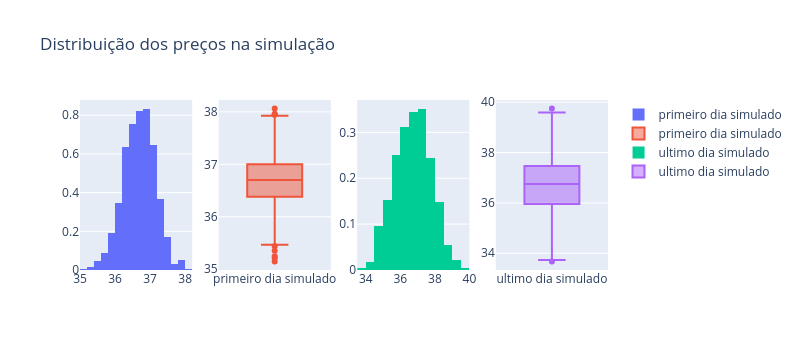

In [228]:
trace1 = go.Histogram(x=df_simulado.iloc[1] , nbinsx= int(2*(df_simulado.shape[1])**(1/3)), histnorm='probability density',name='primeiro dia simulado')
trace3 = go.Histogram(x=df_simulado.iloc[-1], nbinsx= int(2*(df_simulado.shape[-1])**(1/3)), histnorm='probability density',name='ultimo dia simulado')
trace2 = go.Box(y=df_simulado.iloc[1],name='primeiro dia simulado')
trace4 = go.Box(y=df_simulado.iloc[-1],name='ultimo dia simulado')

fig = make_subplots(rows=1, cols=4)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig.update_layout(title='Distribuição dos preços na simulação', height=350, width=800)

fig.show()

###tendência

Uma série temporal é definida como fortemente estacionária se sua distribuição de probabilidade conjunta for invariante sob translações no tempo ou no espaço. Em particular, a média e a variância do processo não mudam ao longo do tempo ou do espaço e cada uma delas não segue uma tendência. Uma característica crítica das séries de preços estacionárias é que os preços dentro da série se difundem a partir do seu valor inicial a uma taxa mais lenta do que a de um GBM. Medindo a taxa desse comportamento difusivo podemos identificar a natureza da série temporal.

*Expoente de Hurst*: uma medida de autocorrelação de uma série teporal, é uma maneira rápida de clasificar uma série temporal em "tendência", "reversão à média" ou "passeio aleatório".

O cálculo do expoente de Hurst requer a estimativa da [estatística R/S](https://en.wikipedia.org/wiki/Rescaled_range) em vários períodos de tempo diferentes e, em seguida, plotá-la em relação aos períodos de tempo em um gráfico log-log e encontrar a inclinação. A inclinação dessa linha é o expoente de Hurst H.

A ideia é usar a variância de uma série logarítmica de preços para avaliar a taxa de comportamento difusivo. Por um *lag* de tempo arbitrário $\tau$ a variância é dada por: $\mathbb{E}\{\log(t+\tau)-\log(t)\}^2$, e como estamos comparando a taxa de difusão com a de um Movimento Geométrico Browniano, podemos usar o fato de que em geral temos que a variância é proporcional a $\tau$, para $\tau$ grande, no caso de um GBM: $\mathbb{E}\{\log(t+\tau)-\log(t)\}^2 \sim \tau$.  A principal conclusão é que se existirem quaisquer autocorrelações então a relação acima não é válida. Nesse caso, modificamos para incluir um valor de expoente $H$:  $\mathbb{E}\{\log(t+\tau)-\log(t)\}^2 \sim \tau^{2H}$, o que nos dá o valor do Expoente de Hurst $H$.

Os valores do expoente de Hurst variam entre 0 e 1 com os quais podemos classificar qualquer série temporal em uma das três categorias:
* H < 0,5 — uma série de reversão à média. Quanto mais próximo 0, mais força tem o processo de reversão à média.
* H = 0,5 — um passeio aleatório (GBM).
* H > 0,5 — uma série de tendência. Quanto mais próximo de 1, mais forte será a tendência.


Abaixo, um dos modos de calcular o expoente de Hurst.

In [229]:
def get_hurst_exponent(ts, min_lag=2, max_lag=100):

    lags = range(min_lag, max_lag+1)

    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)

    return poly , lags, tau



Os cálculos do expoente de Hurst podem ser resumidos em duas etapas:
1. Para cada defasagem na *lag* considerada, calculamos o desvio padrão do diferencial da série.
2.Calculamos a inclinação do gráfico do logaritmo do diferencial $\times$ o logaritmo dos desvios padrão.


$D_{\tau} = x_{t+\tau} - x_t \quad (\forall \tau)$

$\sigma_{\tau} = \sqrt{\frac{1}{N} \sum(D_{\tau} - \bar{D}_{\tau})^2} \quad (\forall \tau)$

$\sigma_{\tau} = \tau^H \quad (\forall \tau)$

$\textrm{log}(\sigma_\tau) = H \textrm{log}(\tau)$

Exemplo

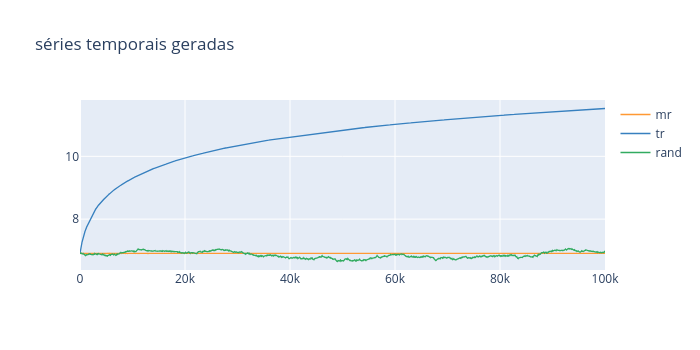

In [230]:
rand = np.log(np.cumsum(np.random.randn(100000))+1000)
mr = np.log(np.random.randn(100000)+1000)
tr = np.log(np.cumsum(np.random.randn(100000)+1)+1000)

dfHus = pd.DataFrame(data={"mr": mr , # + scalar),
                           "tr": tr , #+  scalar),
                           "rand": rand# + scalar),
                        }
                  )
dfHus.iplot(layout=dict(title="séries temporais geradas",height=350, width=700))

In [231]:
for lag in [20, 100, 250, 500 , 1000]:
    print(f"exponetes de Hurst com maxlag {lag}  ----")
    for column in dfHus.columns:
        print(f"{column}: {get_hurst_exponent(dfHus[column].values,2, lag)[0][0]:.4f}")
    print(f"{codigo}: {get_hurst_exponent(preco[codigo].values,2, lag)[0][0]:.4f}")

    print('----')

exponetes de Hurst com maxlag 20  ----
mr: 0.0003
tr: 0.9200
rand: 0.5014
PETR4: 0.5338
----
exponetes de Hurst com maxlag 100  ----
mr: 0.0000
tr: 0.9555
rand: 0.5120
PETR4: 0.4425
----
exponetes de Hurst com maxlag 250  ----
mr: 0.0001
tr: 0.9583
rand: 0.5160
PETR4: 0.4670
----
exponetes de Hurst com maxlag 500  ----
mr: 0.0000
tr: 0.9490
rand: 0.5161
PETR4: 0.4159
----
exponetes de Hurst com maxlag 1000  ----
mr: -0.0001
tr: 0.9257
rand: 0.5127
PETR4: 0.3545
----


In [232]:
recent =  preco.iloc[-662:][codigo]
for lag in [20, 100, 250, 500]:
    print(f"lag {lag} : {get_hurst_exponent(recent.values,2, lag)[0][0]:.4f}")

lag 20 : 0.5158
lag 100 : 0.3936
lag 250 : 0.4044
lag 500 : 0.0860


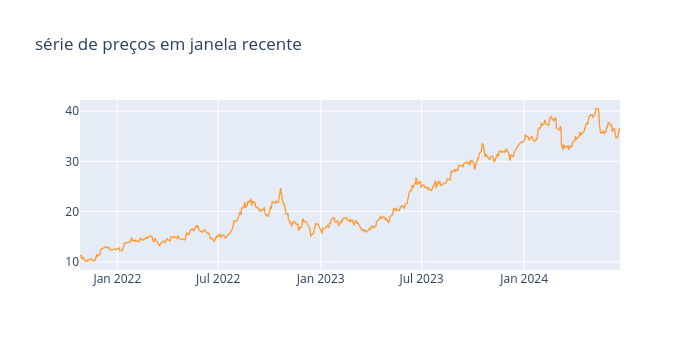

In [233]:
preco.iloc[-662:][codigo].iplot(layout=dict(title="série de preços em janela recente",height=350, width=700))

In [234]:
dfB = yf.download(['CHF=X','BTC-USD'],start='2019-01-01').dropna()  ## franco-suiçoXdolar, bitcoinXdolar
dfB.drop(['Volume', 'Open', 'High', 'Low' , 'Adj Close'], axis=1, inplace=True)
dfB = dfB['Close'].dropna()
# dfB

[*********************100%%**********************]  2 of 2 completed


In [235]:
Hvals = {c: get_hurst_exponent(dfB[c].dropna().values) for c in dfB.columns}


In [236]:
preco['ibov'][dfB.index[0]:]

Date
2019-06-21    102013.0
2019-06-24    102062.0
2019-06-25    100093.0
2019-06-26    100689.0
2019-06-27    100724.0
                ...   
2024-06-17    119138.0
2024-06-18    119630.0
2024-06-19    120261.0
2024-06-20    120446.0
2024-06-21    121341.0
Name: ibov, Length: 1244, dtype: float64

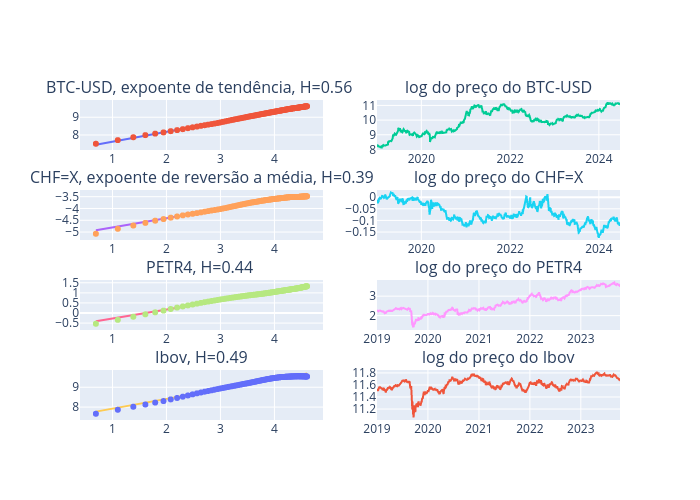

In [237]:
m,x,y = Hvals['BTC-USD']
trace1 = go.Scatter ( x= np.log(x) , y= m[0] * np.log(x) + m[1] )
trace2 = go.Scatter ( x= np.log(x) , y= np.log(y) , mode='markers' )
trace3 = go.Scatter ( x= dfB.index , y= np.log(dfB['BTC-USD'].values) ,mode='lines')

m,x,y = Hvals['CHF=X']
trace4 = go.Scatter ( x= np.log(x) , y= m[0] * np.log(x) + m[1] )
trace5 = go.Scatter ( x= np.log(x) , y= np.log(y) , mode='markers' )
trace6 = go.Scatter ( x= dfB.index , y= np.log(dfB['CHF=X'].values) ,mode='lines')

m1,x,y = get_hurst_exponent(preco[codigo][dfB.index[0]:].dropna().values)
trace7 = go.Scatter ( x= np.log(x) , y= m1[0] * np.log(x) + m1[1] )
trace8 = go.Scatter ( x= np.log(x) , y= np.log(y) , mode='markers' )
trace9 = go.Scatter ( x= dfB.index , y= np.log(preco[codigo][dfB.index[0]:].values) ,mode='lines')

m2,x,y = get_hurst_exponent(preco['ibov'][dfB.index[0]:].dropna().values)
trace10 = go.Scatter ( x= np.log(x) , y= m2[0] * np.log(x) + m2[1] )
trace11 = go.Scatter ( x= np.log(x) , y= np.log(y) , mode='markers' )
trace12 = go.Scatter ( x= dfB.index , y= np.log(preco['ibov'][dfB.index[0]:].values) ,mode='lines')

fig = make_subplots(rows=4, cols=2,#column_widths = [50,20],horizontal_spacing =.15,
                    subplot_titles=(
                        [   f"BTC-USD, expoente de tendência, H={round(Hvals['BTC-USD'][0][0],2)} ",
                            'log do preço do BTC-USD',
                            f'CHF=X, expoente de reversão a média, H={round(Hvals["CHF=X"][0][0],2)}',
                            'log do preço do CHF=X',
                            f"{codigo}, H={round(m1[0],2)} ",
                            f'log do preço do {codigo}',
                            f'Ibov, H={round(m2[0],2)}',
                            'log do preço do Ibov'
                            ]
                        )
                    )



fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 2)

fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 1)
fig.append_trace(trace6, 2, 2)

fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 1)
fig.append_trace(trace9, 3, 2)

fig.append_trace(trace10, 4, 1)
fig.append_trace(trace11, 4, 1)
fig.append_trace(trace12, 4, 2)

fig.update_layout(showlegend=False)

fig.show()

#### Reversão à média


Uma série temporal contínua com reversão à média pode ser representada por uma equação diferencial estocástica de Ornstein-Uhlenbeck: $dX_t = \theta(\mu-X_t)dt + \sigma dW_t$ onde $\theta$ é a taxa de reversão à média, $\mu$ é o valor  médio do processo, $\sigma$ é a variância do processo e $W_t$ é um Processo de Wiener (Movimento Browniano). Num cenário discreto a equação afirma que a mudança da série de preços no próximo período de tempo é proporcional à diferença entre o preço médio e o preço atual, com a adição de ruído gaussiano.

*Teste Dickey-Fuller Aumentado (ADF)*: testa a presença de uma *raiz unitária* em uma amostra de série temporal autorregressiva. Aproveita o fato de que se uma série de preços possuir reversão à média, então o próximo nível de preços será proporcional ao nível de preços atual. Um modelo linear de *lag* $p$ é usado para a série temporal: $\Delta y_t = \alpha + \beta t + \gamma y_t + \sum_{i=1}^{p-1} \delta_i y_{t-i}$

Onde $\alpha$ é uma constante, $\beta$ representa o coeficiente de uma tendência temporal. O papel do teste de hipótese ADF é considerar a hipótese nula de que $\gamma=0$, o que indicaria (com $\alpha=\beta=0$) que o processo é um passeio aleatório e, portanto, não tem reversão média. Se a hipótese de que $\gamma=0$ pode ser rejeitada, então o movimento seguinte da série de preços é proporcional ao preço atual e, portanto, é improvável que seja um passeio aleatório. A estatística de teste é um número negativo e, portanto, para ser significativo além dos valores críticos, o número deve ser mais negativo que esses valores, ou seja, menor que os valores críticos.

Uma questão prática é que qualquer desvio constante de longo prazo num preço é de uma magnitude muito menor do que qualquer flutuação de curto prazo e, por isso, é frequentemente assumido  $\beta=0$. Além disso, geralmente, é  suficiente definir $p=1$ para nos permitir rejeitar a hipótese nula.

In [238]:
def check_estacionaridade(X, cutoff=0.01):
    '''
    H_0 é nao-estacionário, i.e., admite raiz unitaria (teste adfuller)
  Returns
    test statistic
    pvalue
    used lag
    n obs
    critical values dict at the 1 %, 5 %, and 10 % levels.
    '''

    from statsmodels.tsa.stattools import adfuller

    print(adfuller(X))

    pvalue = adfuller(X)[1]

    if pvalue < cutoff:
        print(f' \n p-value = {pvalue}. A serie é, provavelmente, estacionaria ou estacionaria com tendência com grau de confiança {100*(1-pvalue)}.')
        return True
    else:
        mesg = 'não podemos rejeitar a hipótese nula de que existe uma raiz unitária, e, portanto, é improvável que tenhamos encontrado uma série temporal com reversão à média, o que implica que a série de dados não é estacionária.'
        print("\n".join(textwrap.wrap(mesg,118)))
        return False

In [239]:
check_estacionaridade( preco[codigo])

(0.5145910888967677, 0.985309898012305, 3, 1240, {'1%': -3.435634587707382, '5%': -2.8638736617392837, '10%': -2.568012472034339}, 1292.4536070049858)
não podemos rejeitar a hipótese nula de que existe uma raiz unitária, e, portanto, é improvável que tenhamos
encontrado uma série temporal com reversão à média, o que implica que a série de dados não é estacionária.


False

In [240]:
check_estacionaridade( preco[codigo].pct_change().fillna(0))

(-11.157353941859835, 2.8439688723121764e-20, 6, 1237, {'1%': -3.4356474307506084, '5%': -2.8638793281844253, '10%': -2.5680154897465575}, -5252.573882458241)
 
 p-value = 2.8439688723121764e-20. A serie é, provavelmente, estacionaria ou estacionaria com tendência com grau de confiança 100.0.


True

#### cointegração

É difícil encontrar um ativo possua um comportamento de reversão à média, a maioria das séries de preços não são estacionárias nem revertem à média, as ações comportam-se geralmente como GBM. Os retornos, e não os preços, são aqueles que geralmente se distribuem aleatoriamente em torno de uma média zero. Infelizmente, não podemos negociar com base na reversão à média dos retornos.

No entanto, podemos fabricar séries de preços com reversão porque muitas vezes podemos combinar duas ou mais séries de preços individuais que não são reversão à média em uma carteira cujo valor líquido de mercado (ou seja, preço) é de reversão à média.

A forma mais simples de estratégias  de reversão à média é a clássica "pair trading", que geralmente envolve um par de ações "long-short" neutro em relação ao mercado. A teoria diz que duas empresas do mesmo setor estarão provavelmente expostas a fatores de mercado semelhantes, que afetam os seus negócios. Ocasionalmente, os preços relativos das suas ações divergirão devido a determinados eventos, mas reverterão para a média de longo prazo. A cointegração é uma relação mais sutil do que a correlação. Se duas séries temporais são cointegradas, existe alguma relação linear entre elas que irá variar em torno de uma média. Em todos os momentos, a combinação entre eles está relacionada à mesma distribuição de probabilidade.


In [241]:
from statsmodels.tsa.stattools import coint

def zscore(series):
    return (series - series.mean()) / np.std(series)

def residuos (x,y)  :
  # slope,intercept, r, pvalue, stderr = stats.linregress(y=y,x=x)
#   from scipy import stats
  return y - stats.linregress(y=y,x=x)[0] * x

In [242]:
if usar_periodo and len(IBr) > 0:
  IBr_preco = yf.download((pd.Series(IBr)+'.SA').to_list(), period = periodo , progress = False)[qual_preco]
  IBr_preco = IBr_preco.loc[preco.index[0]:]
  IBr_preco.columns=IBr_preco.columns.str.replace(r'\.SA$', '')
elif len(IBr) > 0 :
  IBr_preco = yf.download((pd.Series(IBr)+'.SA').to_list(), start=inicio , end=termino , progress = False)[qual_preco]
  IBr_preco.columns=IBr_preco.columns.str.replace(r'\.SA$', '')

In [243]:
IBr_preco.columns=IBr_preco.columns.str.rstrip('.SA')

In [244]:
pair=pd.DataFrame()
Delta_preco = preco[codigo].diff()[1:]

if check_estacionaridade(Delta_preco) :

  min_score=0.0
  cont=0
  X = pd.Series( preco[codigo])

  print(codigo+' cointegra com ')
  for T in IBr :
      temp = pd.merge(X,IBr_preco[T],left_index=True,right_index=True,how='inner').dropna()
      X= temp.iloc[:,0]
      Y= temp.iloc[:,1]
      t,p,c = coint(X,Y)
      for pvalue in [0.01,0.05, 0.1] :
        if p < pvalue :
          cont+=1
          print(f'{T} no nivel de confiança {(1-pvalue)*100}%', end=" - ")
          if pvalue == 0.01 : vc=c[0]
          elif pvalue == 0.05 : vc=c[1]
          else : vc=c[2]
          print(f'score={t} para o valor crítico {vc} em {len(X)} dias')
          if t < min_score :
            min_score=t
            Min_score=T
            pair = temp
          break


(-19.4289357650325, 0.0, 2, 1240, {'1%': -3.435634587707382, '5%': -2.8638736617392837, '10%': -2.568012472034339}, 1290.172987297114)
 
 p-value = 0.0. A serie é, provavelmente, estacionaria ou estacionaria com tendência com grau de confiança 100.0.
PETR4 cointegra com 
LUPA3 no nivel de confiança 99.0% - score=-3.9550711204749973 para o valor crítico -3.9117798327915985 em 718 dias


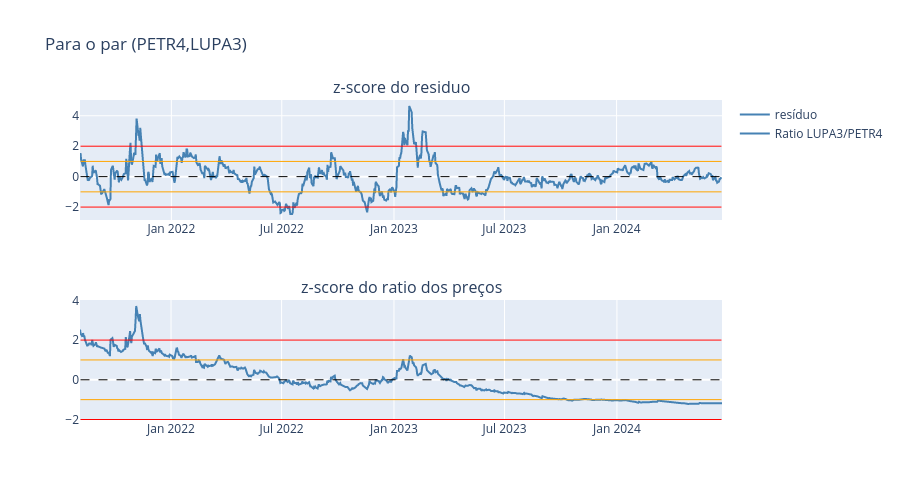

In [245]:
if cont>0 :
  x = pair.iloc[:,0]
  y = pair.iloc[:,1]
  slope,intercept, r, pvalue, stderr = stats.linregress(y=y,x=x)
  residuos =  y - slope * x

  trace1 = go.Scatter( x = residuos.index,  y = zscore(residuos) ,
                      name = 'resíduo',
                      line=dict(color='steelblue'))

  trace2 = go.Scatter( x = y.index,  y = zscore(y/x) ,
                      name = 'Ratio '+Min_score+'/'+codigo,
                      line=dict(color='steelblue'))

  fig = make_subplots(rows=2, cols=1,subplot_titles=(['z-score do residuo','z-score do ratio dos preços']))

  fig.append_trace(trace1, 1, 1)
  fig.append_trace(trace2, 2, 1)

  fig['layout'].update(shapes=[{'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'orange','width': 1}},
                              {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'orange','width': 1}},
                              {'type': 'line','y0':2,'y1': 2,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'red','width': 1}},
                              {'type': 'line','y0':-2,'y1': -2,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'red','width': 1}},
                              {'type': 'line','y0':0,'y1': 0,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y1','line': {'color': 'black','width': 1,'dash':'dash'}},
                              {'type': 'line','y0':0,'y1': 0,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'black','width': 1,'dash':'dash'}},
                              {'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'orange','width': 1}},
                              {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'orange','width': 1}},
                              {'type': 'line','y0':2,'y1': 2,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'red','width': 1}},
                              {'type': 'line','y0':-2,'y1': -2,'x0':min(residuos.index),'x1':max(residuos.index),
                                'yref':'y2','line': {'color': 'red','width': 1}}
                              ],title='Para o par ('+codigo+','+Min_score+')',
                      width=900,
                      height=500)
  fig.show()

cointegração no setor

In [246]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

[('CSAN3', 'RAIZ4'),
 ('LUPA3', 'UGPA3'),
 ('LUPA3', 'PETR4'),
 ('RRRP3', 'UGPA3'),
 ('RRRP3', 'VBBR3'),
 ('RRRP3', 'PETR4')]

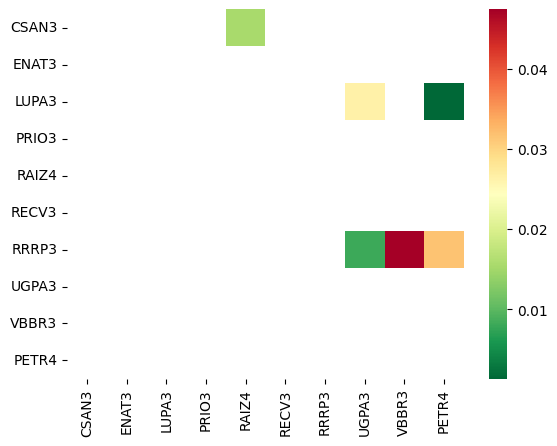

In [247]:
symbol_list = list(IBr_preco.join(preco[codigo]).columns)

scores, pvalues, pairs = find_cointegrated_pairs( (IBr_preco.join(preco[codigo])).dropna() )
import seaborn
seaborn.heatmap(pvalues, xticklabels=symbol_list, yticklabels=symbol_list, cmap='RdYlGn_r',
                mask = (pvalues >= 0.05))
pairs

### autocorrelação de preços

A autocorrelação é um conceito estatístico que mede a correlação entre as observações de uma série temporal e seus valores defasados (*lags*). Ajuda a analisar a dependência entre valores passados ​​e presentes e fornece insights sobre a persistência ou reversibilidade dos padrões de dados, o que ajuda a aprender sobre a tendência dos preços das ações.

Por exemplo, com uma série temporal dos preços de fechamento diários, mede a relação entre o preço de fechamento de um determinado dia e os preços de fechamento de dias anteriores. Se o preço de fechamento de hoje estiver positivamente correlacionado com o preço de fechamento do dia anterior, indica autocorrelação positiva, caso contrário, é considerado uma correlação negativa. A autocorrelação positiva sugere impulso de curto prazo ou comportamento de acompanhamento de tendências.

#### Autocorrelação vs Autocorrelação parcial

**Autocorrelação**  (ACF) quantifica a relação linear entre uma observação e suas observações anteriores em diferentes defasagens; mede a correlação global em cada defasagem sem considerar a influência das defasagens intermediárias. Ajuda a identificar a presença de padrões e tendências significativas nos dados. Útil para detectar sazonalidade, identificar a ordem de um modelo autorregressivo (AR) e determinar os valores de defasagem apropriados para previsão.

**Autocorrelação parcial** (PACF) mede a correlação direta entre uma observação e seus valores defasados, ao mesmo tempo que remove a correlação indireta por meio de defasagens intermediárias. Ajuda a identificar as defasagens específicas que influenciam diretamente uma observação sem a influência de outras defasagens; fornece insights sobre a contribuição única de cada defasagem para a observação atual. Útil para determinar a ordem de um modelo de média móvel (MA), identificar a presença de defasagens significativas e construir modelos de média móvel integrada autoregressiva (ARIMA).



In [248]:
from statsmodels.graphics.tsaplots import pacf , acf

def autocorr_plot(series, SIGNIFICANCE_LEVEL = 0.05 , lags=50 , plot_pacf=False):
    corr_array = pacf(series.dropna(),  nlags=lags , alpha= SIGNIFICANCE_LEVEL) if plot_pacf else acf(series.dropna(), nlags=lags,alpha=SIGNIFICANCE_LEVEL)
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f')
     for x in range(len(corr_array[0]))]
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines',fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1.1,lags+2])
    fig.update_yaxes(range=[-1.1,1.1],zerolinecolor='#000000')

    title='Partial Autocorrelation (PACF)' if plot_pacf else 'Autocorrelation (ACF)'
    fig.update_layout(title=title,width=800,height=380)
    fig.show()

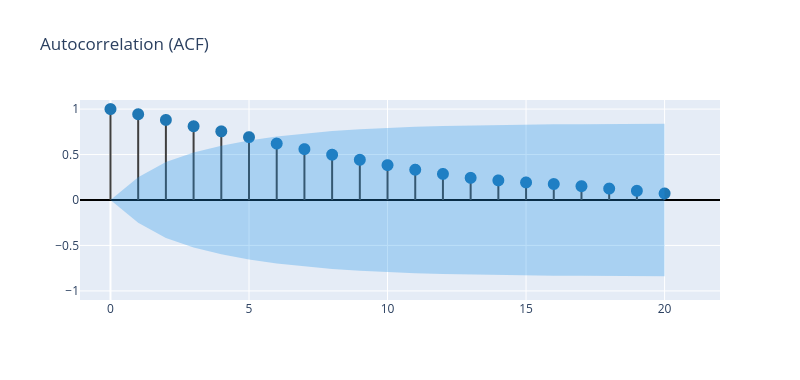

In [249]:
autocorr_plot(preco[codigo].resample('M').last().ffill(),lags=20)

Não analisamos a autocorrelação no *lag* 0, pois o preço atual está perfeitamente correlacionado consigo mesmo. Os valores de *lag* que ficam fora da região azul são estatisticamente significativos. A região azul é o intervalo de confiança, o padrão definido na biblioteca de modelos estatísticos é 95%. Uma lenta deterioração da autocorrelação mostra que os preços estão menos correlacionados com os preços atuais à medida que avançamos mais no passado.


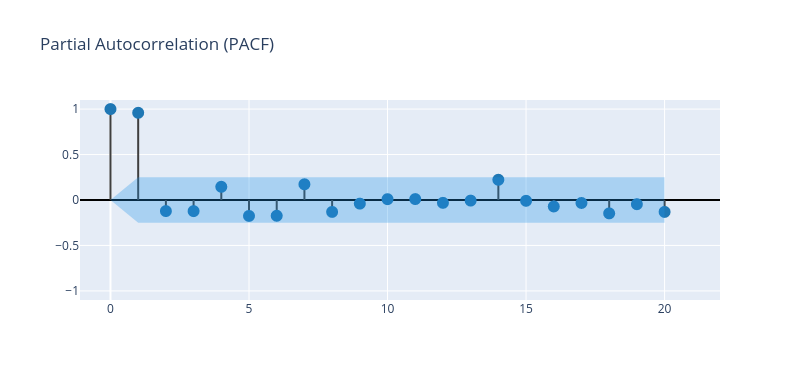

In [250]:
if preco[codigo].resample('M').last().ffill().shape[0] > 40 :
    autocorr_plot(preco[codigo].resample('M').last().ffill(),lags=20,plot_pacf=True)
else:
    autocorr_plot(preco[codigo].resample('M').last().ffill(),lags= int(preco[codigo].resample('M').last().ffill().shape[0]/2),plot_pacf=True)

Na análise técnica, a autocorrelação é normalmente aplicada aos retornos ou alterações no preço, e não aos níveis absolutos de preços. Ao examinar a autocorrelação dos retornos, os analistas podem obter insights sobre a persistência (autocorrelação positiva sugere a presença de uma tendência, indicando que os movimentos de preços passados ​​têm um efeito preditivo sobre os preços futuros) ou a natureza de reversão à média dos movimentos de preços (a autocorrelação negativa indica uma tendência de reversão de preços ou reversão à média).

Alḿe disso,, na análise técnnica, a análise de autocorrelação ajuda a selecionar um período de tempo apropriado para suas estratégias de negociação. Ao observar os padrões de autocorrelação em diferentes *lags* pode-se determinar o horizonte temporal ideal para capturar e explorar os movimentos de preços.

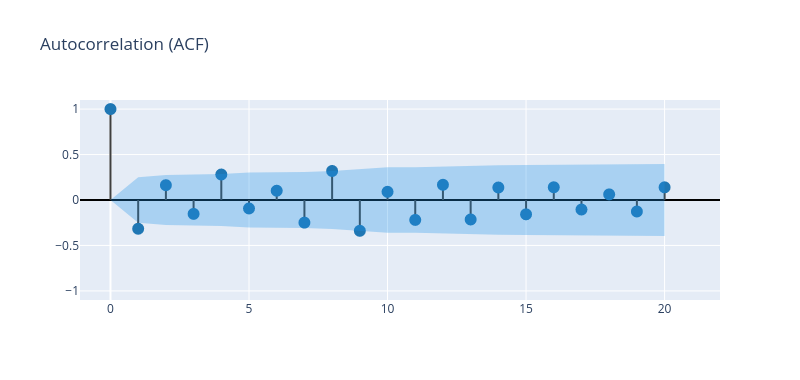

In [251]:
autocorr_plot(Delta_preco.resample('M').last().ffill(),lags=20)

##Drawdown máximo no período


In [252]:
def get_max_drawdown(price):
  data = pd.DataFrame(price)
  column = price.name
  data['max'] = data[column].cummax()
  data['delta'] = data['max'] - data[column]
  data['dd'] = 100 * (data['delta'] / data['max'])
  maxdrawdown = data['dd'].max()
  bottom_day = data['dd'].idxmax()
  bottom_index = data[['dd']].index.get_loc(bottom_day)
  max_value = data.iloc[bottom_index]['max']
  top_day = (data['max'] == max_value).idxmax()
  top_index = data[['max']].index.get_loc(top_day)
  return maxdrawdown, bottom_day, bottom_index, top_day, top_index

In [253]:
dd, bday, bindex, tday, tindex = get_max_drawdown( preco[codigo])
print('max drawdown ', round(dd,2),'% de ', tday.strftime('%d/%m/%Y') , ' até ' , bday.strftime('%d/%m/%Y') )

max drawdown  63.36 % de  06/01/2020  até  18/03/2020


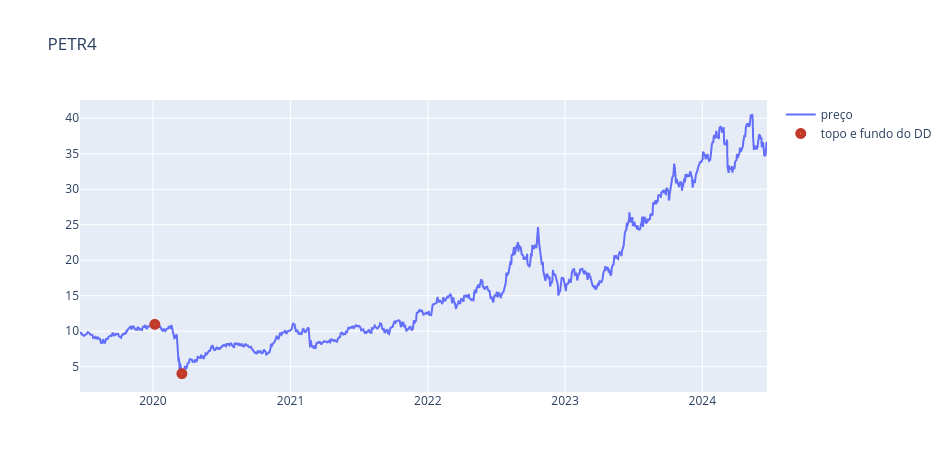

In [254]:
trace1 = go.Scatter(x = preco.index, y = preco[codigo], mode = 'lines' , name = 'preço' )
trace2 = go.Scatter(x = [preco.index[bindex],preco.index[tindex]],
                    y = [ preco[codigo].iloc[bindex] , preco[codigo].iloc[tindex]],
                   mode = 'markers', name = 'topo e fundo do DD',
                   marker =  {'color' : 'orange',
                              'line' : {'width': 5,
                                        'color': '#c0392b'}} )
layout =  dict( title = codigo, height = 472, width = 950, #  font = dict(  size = 10  ),
               )

data_trace = [trace1,trace2]

fig=go.Figure(data=data_trace , layout=layout)
fig.show()

# Retornos


In [255]:
preco['retorno'] = preco[codigo].pct_change()
preco['log_retorno'] = np.log( preco[codigo]) - np.log( preco[codigo].shift(1))
ibov['Preço'] = ibov[qual_preco]
ibov['retorno'] = ibov['Preço'].pct_change()
ibov['log_retorno'] = np.log(ibov['Preço']) - np.log(ibov['Preço'].shift(1))

In [256]:
retornos = pd.merge(ibov['retorno'], preco['retorno'],
                    left_index=True, right_index=True, how='inner')
retornos = retornos.rename(columns={ibov['retorno'].name+'_x':'r_ibov' , preco['retorno'].name+'_y':'r_'+codigo})
retornos['lr_ibov'] = ibov['log_retorno']
retornos['lr_'+codigo] = preco['log_retorno']
retornos.dropna(inplace=True)

print(retornos.shape)
retornos.head(2)

(1243, 4)


r_ibov   r_PETR4   lr_ibov  lr_PETR4
Date                                              
2019-06-24  0.000480 -0.001061  0.000480 -0.001061
2019-06-25 -0.019292 -0.026195 -0.019481 -0.026544

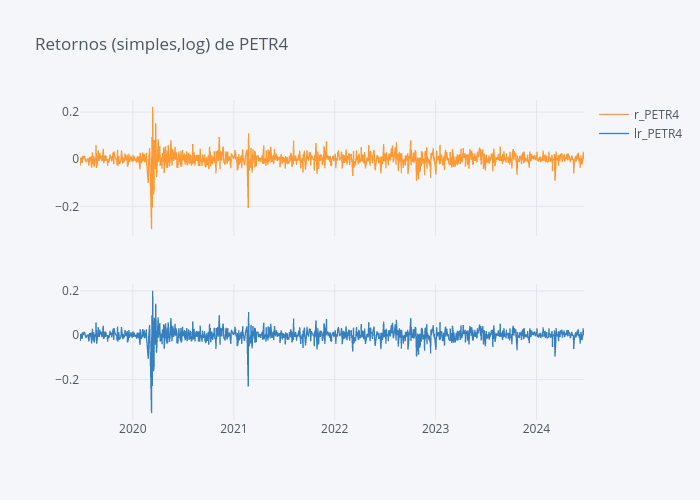

In [257]:
retornos[['r_'+codigo,'lr_'+codigo]].iplot(subplots=True, shape=(2,1), shared_xaxes=True,title='Retornos (simples,log) de '+codigo)

In [258]:
##semanal
weekly_returns = pd.DataFrame()
weekly_returns[codigo] = preco[codigo].resample('W').last().ffill()
weekly_returns['retorno'] =  weekly_returns[codigo].pct_change()
weekly_returns['logretorno'] =  np.log( weekly_returns[codigo]) - np.log(weekly_returns[codigo].shift(1))
weekly_returns.dropna(inplace=True)

##mensal
monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco[codigo].resample('M').last().ffill()
monthly_returns['retorno'] = monthly_returns[codigo].pct_change()
monthly_returns['logretorno'] = np.log(monthly_returns[codigo]) - np.log(monthly_returns[codigo].shift(1))
monthly_returns.dropna(inplace=True)

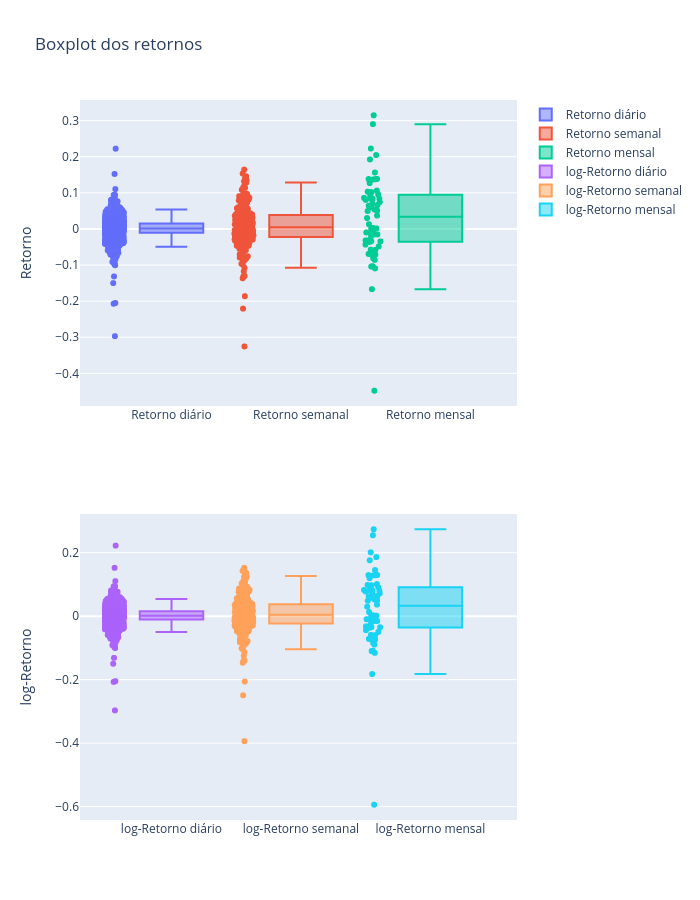

In [259]:
fig = make_subplots(rows=2,cols=1)
fig.add_trace(go.Box(y=retornos['r_'+codigo], name=f'Retorno diário', boxpoints='all', jitter=0.3, pointpos=-1.8),1,1)
fig.add_trace(go.Box(y=weekly_returns['retorno'], name=f'Retorno semanal', boxpoints='all', jitter=0.3, pointpos=-1.8),1,1)
fig.add_trace(go.Box(y=monthly_returns['retorno'], name=f'Retorno mensal', boxpoints='all', jitter=0.3, pointpos=-1.8),1,1)

fig.add_trace(go.Box(y=retornos['r_'+codigo], name=f'log-Retorno diário', boxpoints='all', jitter=0.3, pointpos=-1.8),2,1)
fig.add_trace(go.Box(y=weekly_returns['logretorno'], name=f'log-Retorno semanal', boxpoints='all', jitter=0.3, pointpos=-1.8),2,1)
fig.add_trace(go.Box(y=monthly_returns['logretorno'], name=f'log-Retorno mensal', boxpoints='all', jitter=0.3, pointpos=-1.8),2,1)

fig.update_layout(height=900,title='Boxplot dos retornos',
yaxis1=dict(title='Retorno'),
yaxis2=dict(title='log-Retorno')
)

fig.show()

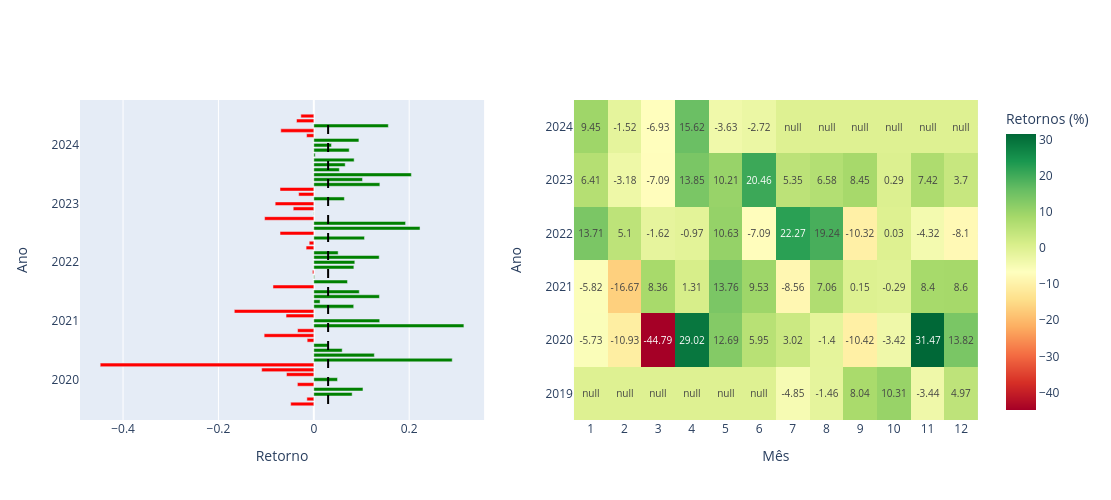

In [260]:
fig = make_subplots(rows=1,cols=2)

# Calcular o retorno médio
mean_return = monthly_returns['retorno'].mean()
neg_returns = monthly_returns[monthly_returns['retorno'] < 0]['retorno']
pos_returns = monthly_returns[monthly_returns['retorno'] >= 0]['retorno']
returns_table = monthly_returns.pivot_table(values='retorno',
                               index=monthly_returns.index.year,
                               columns=monthly_returns.index.month,
                               aggfunc='mean')

fig.add_trace(go.Bar(x=neg_returns, y=neg_returns.index, orientation='h', marker=dict(color='red'), name='Retornos Negativos'),row=1,col=1)
fig.add_trace(go.Bar(x=pos_returns, y=pos_returns.index, orientation='h', marker=dict(color='green'), name='Retornos Positivos'),row=1,col=1)
fig.add_trace(go.Scatter(x=[mean_return, mean_return], y=[monthly_returns.index[0], monthly_returns.index[-1]],
                         mode='lines',
                         line=dict(color='black', dash='dash'),
                         name='Retorno Médio'),row=1,col=1)

# Criar um objeto Heatmap
fig.add_trace(#
go.Heatmap(
    z=returns_table.fillna(0) * 100.0,
    colorscale='RdYlGn',
    colorbar=dict(title='Retornos (%)'),
    hoverongaps=False,
    text= (returns_table* 100.0).round(2),  # Valores dentro das células
    texttemplate="%{text}",
    textfont={"size":10} ),1,2)

fig.update_layout(showlegend=False,width=1111,
    xaxis=dict(title = 'Retorno'),
    xaxis2=dict(title='Mês', tickmode='array', tickvals=list(range(len(returns_table.columns))), ticktext=list(returns_table.columns)),
    yaxis=dict(title='Ano'),
    yaxis2=dict(title='Ano', tickmode='array', tickvals=list(range(len(returns_table.index))), ticktext=list(returns_table.index))
)

# Exibir o gráfico
fig.show()


#### retorno por calendario

todo

In [261]:
retornos.index.dayofweek

Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       ...
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
      dtype='int32', name='Date', length=1243)

In [262]:
# Separando os retornos por dia da semana
retorno_por_dia_da_semana = pd.DataFrame(index=retornos.index)
dias_da_semana = ['segunda', 'terça', 'quarta', 'quinta','sexta']

for i, dia in enumerate(dias_da_semana):
  retorno_por_dia_da_semana[dia] = retornos['r_'+codigo][retornos.index.dayofweek == i]

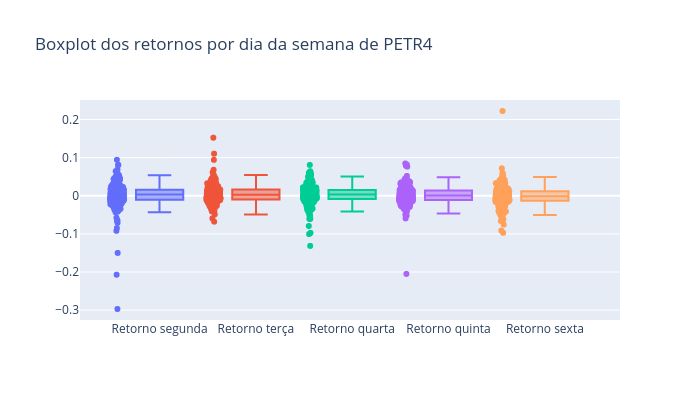

In [263]:
fig = go.Figure()
for dia in dias_da_semana:
    fig.add_trace(go.Box(y=retorno_por_dia_da_semana[dia], name=f'Retorno {dia}', boxpoints='all', jitter=0.3, pointpos=-1.8))


fig.update_layout(height=400,title=f'Boxplot dos retornos por dia da semana de {codigo}',showlegend=False)

# Exibindo o gráfico
fig.show()


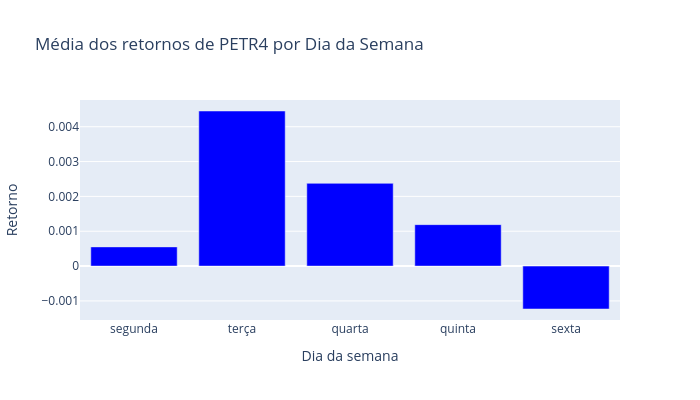

In [264]:
media = retorno_por_dia_da_semana.mean()

trace = go.Bar(
    x=media.index,
    y=media.values,
    marker=dict(color='blue')  # Cor das barras (opcional)
)

# Definindo o layout
layout = go.Layout(height=400,showlegend=False,
    title=f"Média dos retornos de {codigo} por Dia da Semana",
    xaxis=dict(title="Dia da semana"),
    yaxis=dict(title="Retorno")
)

# Criando a figura
fig = go.Figure(data=[trace], layout=layout)

# Exibindo o gráfico
fig.show()

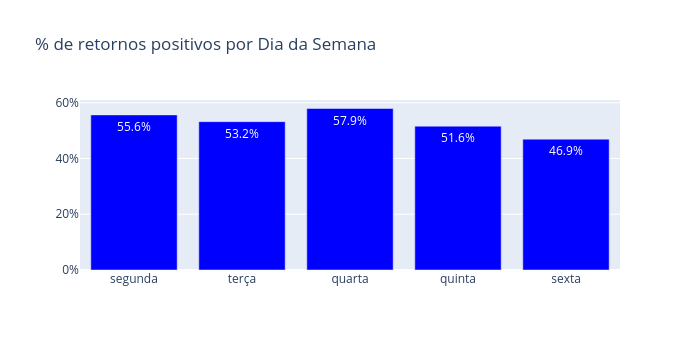

In [265]:
# percuntual de retornos positivos por dia da semana
ret_percentual = retorno_por_dia_da_semana.agg(lambda ret: (ret[ret>0].count() / ret.count()))

fig = go.Figure()

fig.add_trace(go.Bar(
    x=ret_percentual.index,
    y=ret_percentual.values,
    marker=dict(color='blue') , # Cor das barras (opcional)
    text=list(ret_percentual.values),
    textposition='auto',
))

fig.update_traces(texttemplate='%{text:.1%}')
fig.layout.yaxis.tickformat = ".0%"
fig.update_layout(showlegend=False, title = "% de retornos positivos por Dia da Semana " ,height=350)

In [266]:
retorno_por_dia_da_semana.describe()

segunda       terça      quarta      quinta       sexta
count  248.000000  248.000000  252.000000  250.000000  245.000000
mean     0.000551    0.004451    0.002375    0.001189   -0.001232
std      0.035388    0.024543    0.025270    0.025762    0.028871
min     -0.296977   -0.067967   -0.131538   -0.205047   -0.097272
25%     -0.010513   -0.010044   -0.008350   -0.011018   -0.013154
50%      0.002995    0.002331    0.003176    0.000533   -0.001444
75%      0.015776    0.016111    0.015242    0.013410    0.011959
max      0.094178    0.152174    0.080755    0.084615    0.222222

In [267]:
'''
Testes de Hipóteses
H0 - não há diferença estatística significativa nos retornos entre diferentes dias da semana
Ha - há diferença estatística significativa nos retornos entre diferentes os dias de semana
'''
alpha = 0.05
p_valores = pd.DataFrame(index=dias_da_semana, columns=dias_da_semana)

for dia1 in dias_da_semana:
  for dia2 in dias_da_semana:
    p_valores.at[dia1, dia2] = stats.ttest_ind(retorno_por_dia_da_semana[dia1].dropna(),
                                                 retorno_por_dia_da_semana[dia2].dropna())[1]
p_valores < alpha

segunda  terça  quarta  quinta  sexta
segunda    False  False   False   False  False
terça      False  False   False   False   True
quarta     False  False   False   False  False
quinta     False  False   False   False  False
sexta      False   True   False   False  False

In [268]:
monthly_returns.index.month

Index([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6],
      dtype='int32', name='Date')

In [269]:
retorno_por_mes = pd.DataFrame(index=monthly_returns.index)
mes_do_ano = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

for i, mes in enumerate(mes_do_ano):
  retorno_por_mes[mes] = monthly_returns['retorno'][monthly_returns.index.month == i]

retorno_por_mes

jan       fev       mar       abr       mai       jun       jul  \
Date                                                                          
2019-07-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2019-08-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2019-09-30  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2019-10-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2019-11-30  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2019-12-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-31  NaN -0.057323       NaN       NaN       NaN       NaN       NaN   
2020-02-29  NaN       NaN -0.109315       NaN       NaN       NaN       NaN   
2020-03-31  NaN       NaN       NaN -0.447909       NaN       NaN       NaN   
2020-04-30  NaN       NaN       NaN       NaN  0.290208       NaN       NaN   
2020-05-31  NaN       NaN       NaN       NaN       NaN  0.126870       NaN   
2020-06-30  NaN       NaN       NaN       NaN       NaN       NaN  0.059488   
2020-07-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2020-08-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2020-09-30  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2020-10-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2020-11-30  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2020-12-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2021-01-31  NaN -0.058221       NaN       NaN       NaN       NaN       NaN   
2021-02-28  NaN       NaN -0.166729       NaN       NaN       NaN       NaN   
2021-03-31  NaN       NaN       NaN  0.083633       NaN       NaN       NaN   
2021-04-30  NaN       NaN       NaN       NaN  0.013068       NaN       NaN   
2021-05-31  NaN       NaN       NaN       NaN       NaN  0.137595       NaN   
2021-06-30  NaN       NaN       NaN       NaN       NaN       NaN  0.095274   
2021-07-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2021-08-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2021-09-30  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2021-10-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-30  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2022-01-31  NaN  0.137082       NaN       NaN       NaN       NaN       NaN   
2022-02-28  NaN       NaN  0.051005       NaN       NaN       NaN       NaN   
2022-03-31  NaN       NaN       NaN -0.016177       NaN       NaN       NaN   
2022-04-30  NaN       NaN       NaN       NaN -0.009680       NaN       NaN   
2022-05-31  NaN       NaN       NaN       NaN       NaN  0.106281       NaN   
2022-06-30  NaN       NaN       NaN       NaN       NaN       NaN -0.070858   
2022-07-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2022-08-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2022-09-30  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2022-10-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2022-11-30  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2022-12-31  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-31  NaN  0.064082       NaN       NaN       NaN       NaN       NaN   
2023-02-28  NaN       NaN -0.031837       NaN       NaN       NaN       NaN   
2023-03-31  NaN       NaN       NaN -0.070919       NaN       NaN       NaN   
2023-04-30  NaN       NaN       NaN       NaN  0.138474       NaN       NaN   
2023-05-31  NaN       NaN       NaN       NaN       NaN  0.102110       NaN   
2023-06-30  NaN       NaN       NaN       NaN       NaN       NaN  0.204585   
2023-07-31  NaN       NaN       NaN       NaN       NaN       

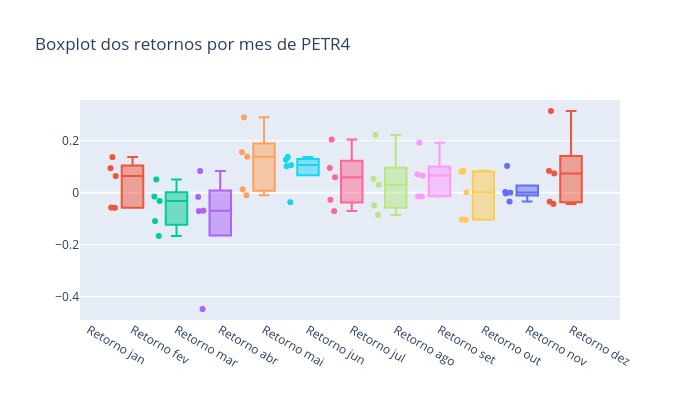

In [270]:
fig = go.Figure()
for mes in mes_do_ano:
    fig.add_trace(go.Box(y=retorno_por_mes[mes], name=f'Retorno {mes}', boxpoints='all', jitter=0.3, pointpos=-1.8))


fig.update_layout(height=400,title=f'Boxplot dos retornos por mes de {codigo}',showlegend=False)

# Exibindo o gráfico
fig.show()


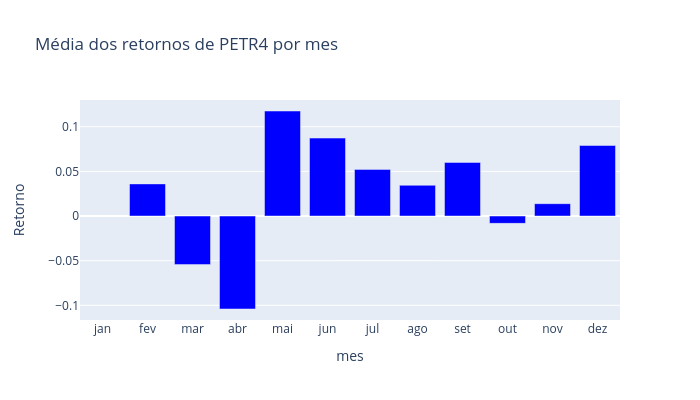

In [271]:
media = retorno_por_mes.mean()

trace = go.Bar(
    x=media.index,
    y=media.values,
    marker=dict(color='blue')  # Cor das barras (opcional)
)

# Definindo o layout
layout = go.Layout(height=400,showlegend=False,
    title=f"Média dos retornos de {codigo} por mes",
    xaxis=dict(title="mes"),
    yaxis=dict(title="Retorno")
)

# Criando a figura
fig = go.Figure(data=[trace], layout=layout)

# Exibindo o gráfico
fig.show()

In [272]:
monthly_returns

PETR4   retorno  logretorno
Date                                       
2019-07-31   9.021856 -0.048522   -0.049739
2019-08-31   8.890537 -0.014556   -0.014663
2019-09-30   9.605265  0.080392    0.077324
2019-10-31  10.595426  0.103085    0.098111
2019-11-30  10.230611 -0.034431   -0.035038
2019-12-31  10.738694  0.049663    0.048469
2020-01-31  10.123124 -0.057323   -0.059031
2020-02-29   9.016520 -0.109315   -0.115764
2020-03-31   4.977942 -0.447909   -0.594042
2020-04-30   6.422579  0.290208    0.254803
2020-05-31   7.237412  0.126870    0.119444
2020-06-30   7.667953  0.059488    0.057786
2020-07-31   7.899397  0.030183    0.029737
2020-08-31   7.789091 -0.013964   -0.014062
2020-09-30   6.977799 -0.104157   -0.109991
2020-10-31   6.739395 -0.034166   -0.034763
2020-11-30   8.860134  0.314678    0.273592
2020-12-31  10.084183  0.138152    0.129406
2021-01-31   9.497066 -0.058221   -0.059985
2021-02-28   7.913629 -0.166729   -0.182397
2021-03-31   8.575471  0.083633    0.080320
2021-04-30   8.687538  0.013068    0.012984
2021-05-31   9.882902  0.137595    0.128917
2021-06-30  10.824482  0.095274    0.091004
2021-07-31   9.897614 -0.085627   -0.089517
2021-08-31  10.596236  0.070585    0.068205
2021-09-30  10.611823  0.001471    0.001470
2021-10-31  10.580647 -0.002938   -0.002942
2021-11-30  11.469187  0.083978    0.080637
2021-12-31  12.455002  0.085953    0.082458
2022-01-31  14.162364  0.137082    0.128466
2022-02-28  14.884712  0.051005    0.049747
2022-03-31  14.643929 -0.016177   -0.016309
2022-04-30  14.502172 -0.009680   -0.009727
2022-05-31  16.043474  0.106281    0.101004
2022-06-30  14.906663 -0.070858   -0.073494
2022-07-31  18.226370  0.222700    0.201061
2022-08-31  21.732981  0.192392    0.175962
2022-09-30  19.489704 -0.103220   -0.108945
2022-10-31  19.496244  0.000336    0.000336
2022-11-30  18.654190 -0.043191   -0.044151
2022-12-31  17.142824 -0.081020   -0.084491
2023-01-31  18.241364  0.064082    0.062112
2023-02-28  17.660606 -0.031837   -0.032355
2023-03-31  16.408131 -0.070919   -0.073560
2023-04-30  18.680229  0.138474    0.129689
2023-05-31  20.587660  0.102110    0.097226
2023-06-30  24.799582  0.204585    0.186135
2023-07-31  26.126480  0.053505    0.052123
2023-08-31  27.845999  0.065815    0.063740
2023-09-30  30.199919  0.084534    0.081150
2023-10-31  30.287104  0.002887    0.002883
2023-11-30  32.534096  0.074190    0.071567
2023-12-31  33.739063  0.037037    0.036368
2024-01-31  36.928146  0.094522    0.090318
2024-02-29  36.366432 -0.015211   -0.015328
2024-03-31  33.847782 -0.069258   -0.071773
2024-04-30  39.135708  0.156227    0.145162
2024-05-31  37.715454 -0.036290   -0.036965
2024-06-30  36.689999 -0.027189   -0.027566

### normalidade na distribuição dos (log) retornos

---



In [273]:
lr_media = retornos['lr_'+codigo].mean()
lr_variancia = retornos['lr_'+codigo].var()
lr_desviopadrao = retornos['lr_'+codigo].std()

r_media = retornos['r_'+codigo].mean()
r_variancia = retornos['r_'+codigo].var()
r_desviopadrao = retornos['r_'+codigo].std()

In [274]:
jb_test = stats.jarque_bera(retornos['lr_'+codigo].values)

print('---------- Estatisticas Descriptivas ----------')
print('Periodo:', min(retornos.index.date), '-', max(retornos.index.date))
print('Observações:', retornos.shape[0])
print(f'Média: {lr_media:.4f}')
print(f'Mediana: {retornos["lr_"+codigo].median():.4f}')
print(f'Mínimo: {retornos["lr_"+codigo].min():.4f}')
print(f'Máximo: {retornos["lr_"+codigo].max():.4f}')
print(f'Desvio padrão: {lr_desviopadrao:.4f}')
print(f'Assimetria: {retornos["lr_"+codigo].skew():.4f}')
print(f'Curtose: {retornos["lr_"+codigo].kurtosis():.4f}')
print(f'Jarque-Bera teste: {jb_test[0]:.2f} com p-valor {jb_test[1]:.2f}')

---------- Estatisticas Descriptivas ----------
Periodo: 2019-06-24 - 2024-06-21
Observações: 1243
Média: 0.0011
Mediana: 0.0014
Mínimo: -0.3524
Máximo: 0.2007
Desvio padrão: 0.0290
Assimetria: -2.2494
Curtose: 27.5094
Jarque-Bera teste: 39912.03 com p-valor 0.00


 O teste Jarque-Bera utiliza como parâmetros os coeficientes de curtose e assimetria, que na normal são de 3 e 0, respectivamente,  e tem como hipótese nula a normalidade. Assim, se o p-valor for pequeno então rejeita-se a normalidade. O teste, da forma como está formulado, não responde se ela é aproximadamente normal,  o p-valor não diz o quão grande é o desvio em relação à normalidade.

É observado na literatura que os retornos (diários) dos ativos
apresentam o seguinte: *Assimetria negativa* (grandes retornos negativos ocorrem mais frequentemente do que grandes positivos) e *Excesso de curtose* (retornos grandes e pequenos ocorrem com mais frequência
do que o esperado).

Graficamente, podemos comparar a distribuição dos dados com a normal de dois modos: (1) traçar um histograma visualizando a distribuição
de retornos observados sobrepondo uma linha que representa a PDF da distribuição gaussiana com a média e o padrão desvio proveniente da série de retornos observada. Para verificar a existência dos padrões mencionados acima, a *assimetria negativa* resulta na cauda esquerda da  distribuição mais longa, enquanto a massa de a distribuição está concentrada no lado direito da distribuição; o *excesso de curtose* resulta na distribuição de cauda gorda e pontiaguda. (2) traçando seus quantis uns contra os outros (usando o Q-Q plot). Depois de inspecionar o histograma, observamos o gráfico QQ (quantil-quantil). No grafico abaixo, distribuição teórica é Gaussiana (Normal) e a distribuição observada um vem dos retornos. Se a distribuição empírica for gaussiana, então a grande maioria dos pontos ficará na linha vermelha. No entanto,os pontos do lado esquerdo do gráfico são mais negativos do que o esperado no caso da distribuição gaussiana, como indicado pela linha, significa que a cauda esquerda da distribuição de retornos é mais pesada que o da distribuição gaussiana. Conclusões analogas valem par a cauda direita, que é mais pesada do que na normal.


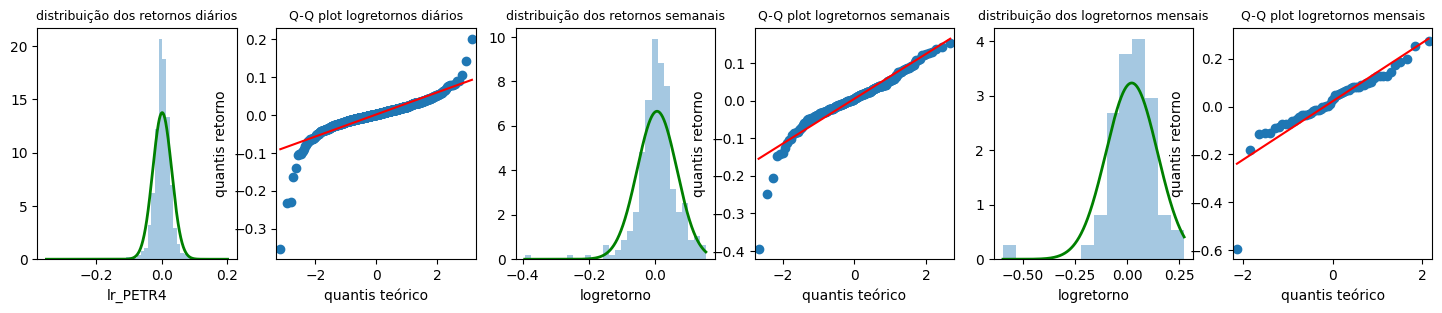

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

r_fig, ax = plt.subplots(1, 6 , figsize=(18,3))

r_range = np.linspace(min( retornos['lr_'+codigo]), max( retornos['lr_'+codigo]), num=1000)

## histograma diário
sns.distplot( retornos['lr_'+codigo], kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('distribuição dos retornos diários' , fontsize=9)
ax[0].plot(r_range, stats.norm.pdf(r_range, loc=lr_media, scale=lr_desviopadrao) ,#
           'g', lw=2,label=f'N({lr_media:.2f}, {lr_variancia:.4f})')
# Q-Q plot diário
qq1 = sm.qqplot( retornos['lr_'+codigo].values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot logretornos diários' , fontsize = 9)
ax[1].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

##semanal
r_range = np.linspace(min(weekly_returns['logretorno']), max(weekly_returns['logretorno']), num=1000)
w_m = weekly_returns['logretorno'].mean()
w_s = weekly_returns['logretorno'].std()

# histograma semanal
sns.distplot(weekly_returns['logretorno'] , kde=False, norm_hist=True, ax=ax[2])
ax[2].set_title('distribuição dos retornos semanais' , fontsize=9)
ax[2].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot semanal
qq2 = sm.qqplot(weekly_returns['logretorno'].values, line='s', ax=ax[3])
ax[3].set_title('Q-Q plot logretornos semanais', fontsize = 9)
ax[3].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')


##mensal
r_range = np.linspace(min(monthly_returns['logretorno']), max(monthly_returns['logretorno']), num=1000)
w_m = monthly_returns['logretorno'].mean()
w_s = monthly_returns['logretorno'].std()

# histograma mensal
sns.distplot(monthly_returns['logretorno'] , kde=False, norm_hist=True, ax=ax[4])
ax[4].set_title('distribuição dos logretornos mensais' , fontsize=9)
ax[4].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot mensal
qq2 = sm.qqplot(monthly_returns['logretorno'].values, line='s', ax=ax[5])
ax[5].set_title('Q-Q plot logretornos mensais' , fontsize = 9)
ax[5].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

# fig.tight_layout()
r_fig.show()

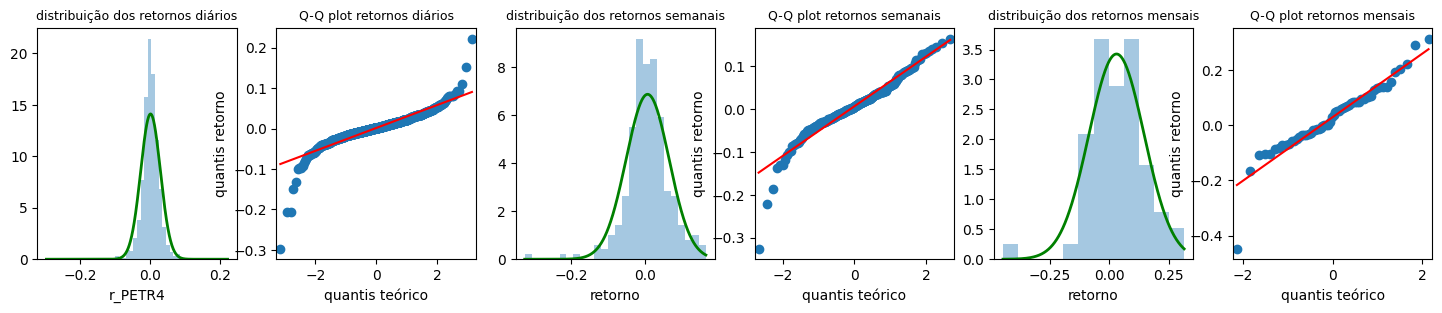

In [276]:
#@markdown para o retorno simples
r_fig, ax = plt.subplots(1, 6 , figsize=(18,3))

r_range = np.linspace(min( retornos['r_'+codigo]), max( retornos['r_'+codigo]), num=1000)

## histograma diário
sns.distplot( retornos['r_'+codigo], kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('distribuição dos retornos diários' , fontsize=9)
ax[0].plot(r_range, stats.norm.pdf(r_range, loc=r_media, scale=r_desviopadrao) ,#
           'g', lw=2,label=f'N({r_media:.2f}, {r_variancia:.4f})')
# Q-Q plot diário
qq1 = sm.qqplot( retornos['r_'+codigo].values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot retornos diários' , fontsize = 9)
ax[1].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

##semanal
r_range = np.linspace(min(weekly_returns['retorno']), max(weekly_returns['retorno']), num=1000)
w_m = weekly_returns['retorno'].mean()
w_s = weekly_returns['retorno'].std()

# histograma semanal
sns.distplot(weekly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[2])
ax[2].set_title('distribuição dos retornos semanais' , fontsize=9)
ax[2].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot semanal
qq2 = sm.qqplot(weekly_returns['retorno'].values, line='s', ax=ax[3])
ax[3].set_title('Q-Q plot retornos semanais', fontsize = 9)
ax[3].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')


##mensal
r_range = np.linspace(min(monthly_returns['retorno']), max(monthly_returns['retorno']), num=1000)
w_m = monthly_returns['retorno'].mean()
w_s = monthly_returns['retorno'].std()

# histograma mensal
sns.distplot(monthly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[4])
ax[4].set_title('distribuição dos retornos mensais' , fontsize=9)
ax[4].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot mensal
qq2 = sm.qqplot(monthly_returns['retorno'].values, line='s', ax=ax[5])
ax[5].set_title('Q-Q plot retornos mensais' , fontsize = 9)
ax[5].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

# fig.tight_layout()
r_fig.show()

In [277]:
from scipy.stats import skew, kurtosis
window=63
curtose_movel =  retornos['r_'+codigo].rolling(window).apply(lambda x: kurtosis(x), raw=False)
assimetria_movel =  retornos['r_'+codigo].rolling(window).apply(lambda x: skew(x), raw=False)

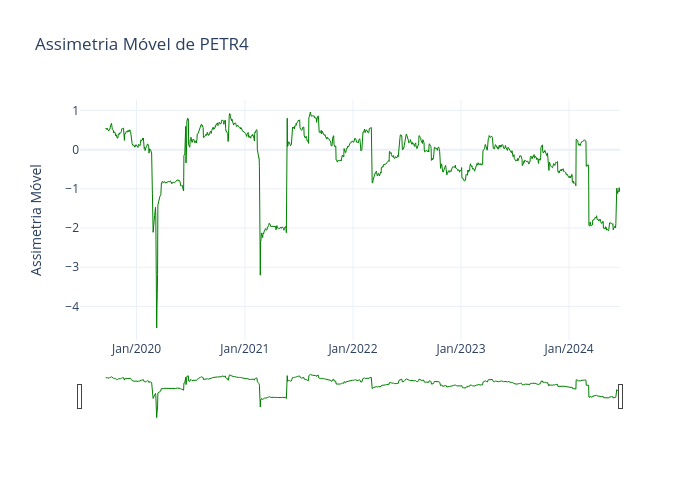

In [278]:
fig = go.Figure(data=[go.Scatter(
    x=assimetria_movel.index,  # Assumindo que 'Date' é o índice do DataFrame
    y=assimetria_movel,
    line=dict(color='green', width=1)
)])

fig.update_layout(
    title=f"Assimetria Móvel de {codigo}",
    xaxis_title="",
    yaxis_title="Assimetria Móvel",
    xaxis_tickformat="%b/%Y",
    xaxis_rangeslider_visible=True,  # Adiciona um slider de zoom no eixo x
    template="plotly_white"
)

fig.show()

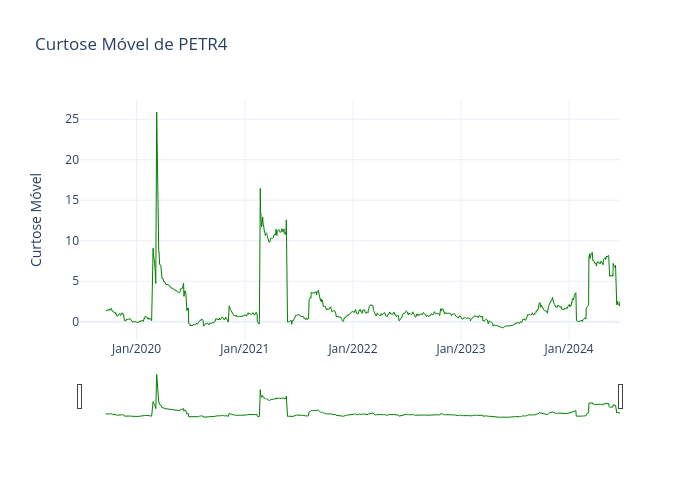

In [279]:
fig = go.Figure(data=[go.Scatter(
    x=curtose_movel.index,  # Assumindo que 'Date' é o índice do DataFrame
    y=curtose_movel,
    line=dict(color='green', width=1)
)])

fig.update_layout(
    title=f"Curtose Móvel de {codigo}",
    xaxis_title="",
    yaxis_title="Curtose Móvel",
    xaxis_tickformat="%b/%Y",
    xaxis_rangeslider_visible=True,  # Adiciona um slider de zoom no eixo x
    template="plotly_white"
)

fig.show()

In [280]:
 #@markdown tentativa de qq plot no plotly

# from statsmodels.graphics.gofplots import qqplot

# qqplot_data_D = qqplot(retornos['r_'+codigo], line='s').gca().lines
# qqplot_data_S = qqplot(weekly_returns['retorno'], line='s').gca().lines
# qqplot_data_M = qqplot(monthly_returns['retorno'], line='s').gca().lines

# fig = make_subplots(rows=3,cols=1)

# fig.add_trace(go.Scatter(x= qqplot_data_D[0].get_xdata(),y= qqplot_data_D[0].get_ydata(),mode='markers', marker= dict(color='#19d3f3')),1,1)
# fig.add_trace(go.Scatter(x= qqplot_data_D[1].get_xdata(),y= qqplot_data_D[1].get_ydata(),mode='lines', line=dict(color='#636efa')),1,1)
# fig.add_trace(go.Scatter(x= qqplot_data_S[0].get_xdata(),y= qqplot_data_D[0].get_ydata(),mode='markers', marker= dict(color='#19d3f3')),2,1)
# fig.add_trace(go.Scatter(x= qqplot_data_S[1].get_xdata(),y= qqplot_data_D[1].get_ydata(),mode='lines', line=dict(color='#636efa')),2,1)
# fig.add_trace(go.Scatter(x= qqplot_data_M[0].get_xdata(),y= qqplot_data_D[0].get_ydata(),mode='markers', marker= dict(color='#19d3f3')),3,1)
# fig.add_trace(go.Scatter(x= qqplot_data_M[1].get_xdata(),y= qqplot_data_D[1].get_ydata(),mode='lines', line=dict(color='#636efa')),3,1)

# fig.update_layout(showlegend=False,width=800,height=70
#     # xaxis=dict(title = 'Retorno'),
#     # xaxis2=dict(title='Mês', tickmode='array', tickvals=list(range(len(returns_table.columns))), ticktext=list(returns_table.columns)),
#     # yaxis=dict(title='Ano'),
#     # yaxis2=dict(title='Ano', tickmode='array', tickvals=list(range(len(returns_table.index))), ticktext=list(returns_table.index))
# )
# # fig.update_layout(title='Q-Q Plot',showlegend=False,width=800,height=700)
# # fig.update_xaxes1(title='Theoritical Quantities',zeroline=False)
# # # fig.update_yaxes(title='Sample Quantities')

# fig.show()

#### Autocorrelação dos retornos

é esperado que nenhuma (ou quase nenhuma) autocorrelação significativa seja observada nos retornos


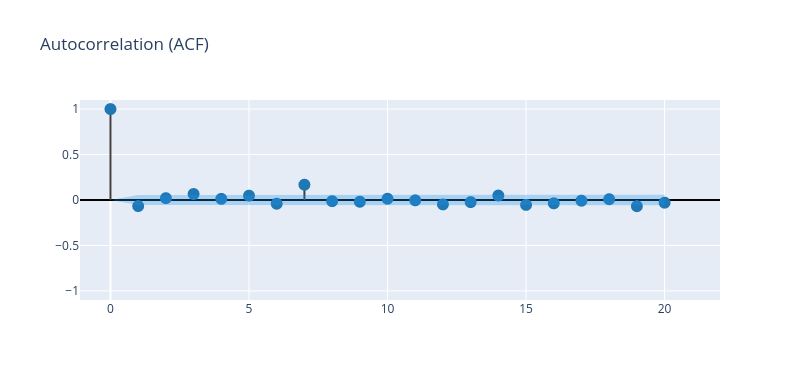

In [281]:
autocorr_plot(retornos['lr_'+codigo],lags=20)

Apenas valores  fora do intervalo de confiança (faixa azul claro, não considera o 0) podem ser considerado estatisticamente significativo; na ausência deles podemos supor que verificamos que não há autocorrelação na série.

A seguir, os gráficos *ACF de retornos quadrados e absolutos*. Valores pequenos e decrescentes são propriedades estatísticas esperada nos retornos empíricos, isto é, autocorrelação pequena e lentamente decrescente lentamente em retornos quadrados e absolutos.

A variância é basicamente a média dos erros quadráticos, enquanto o desvio absoluto é a média dos erros absolutos. No caso de retornos de ativos podemos observar períodos de alta/baixa volatilidade (agrupamento de volatilidade) no gráfico de retornos logarítmicos. Por outro lado, espera-se que a média dos retornos de curto prazo (diários) no longo prazo seja zero. É por isso que, ao observar os retornos quadrados e absolutos, estamos efetivamente medindo o desvio da média esperada, sem olhar para a direção do erro — tanto as funções quadradas como as absolutas anulam a direção do erro.


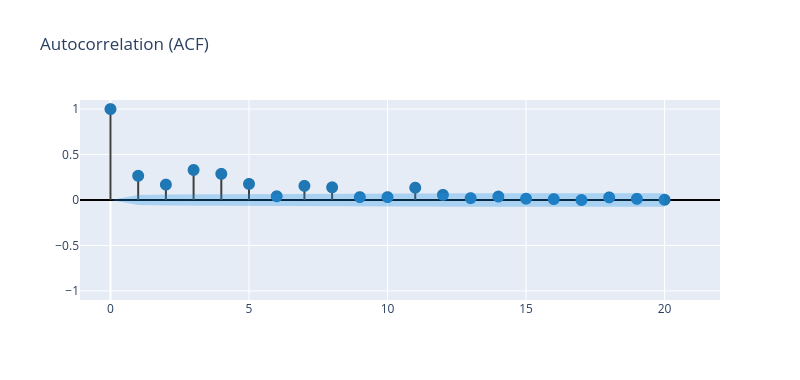

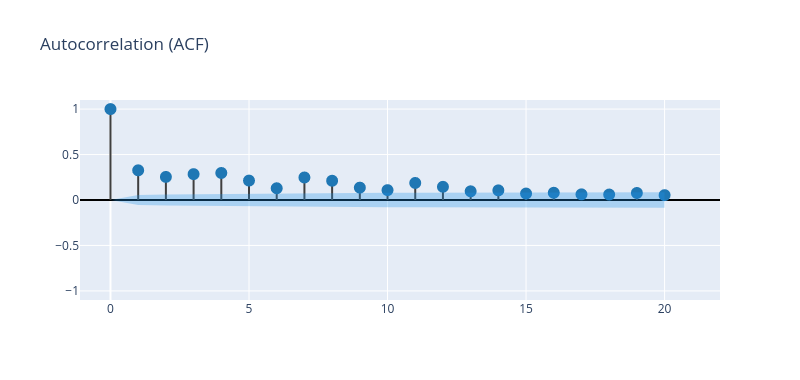

In [282]:
autocorr = pd.DataFrame()
autocorr['quad'] = autocorr_plot(retornos['lr_'+codigo]** 2,lags=20)
autocorr['abs'] = autocorr_plot(np.abs(retornos['lr_'+codigo]),lags=20)

### comparação de retornos com ibov

In [283]:
print('-- Estatísticas do retorno diário')
tmp = [['Intervalo de datas' , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date)) , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date))],
       ['no. de observações' , retornos['r_'+codigo].shape[0] , retornos['r_ibov'].shape[0]],
       ['min', str(round( retornos['r_'+codigo].min()*100,3))+'%', str(round( retornos['r_ibov'].min()*100,3))+'%'],
       ['max', str(round( retornos['r_'+codigo].max()*100,3))+'%', str(round( retornos['r_ibov'].max()*100,3))+'%'],
       ['média', str(round( retornos['r_'+codigo].mean()*100,3))+'%', str(round( retornos['r_ibov'].mean()*100,3))+'%'],
       ['mediana', str(round( retornos['r_'+codigo].median()*100,3))+'%', str(round( retornos['r_ibov'].median()*100,3))+'%'],
       ['desvio padrão', str(round( retornos['r_'+codigo].std()*100,3))+'%', str(round( retornos['r_ibov'].std()*100,3))+'%'],
       ['assimetria', round( retornos['r_'+codigo].skew(),3), round( retornos['r_ibov'].skew(),3)],
       ['curtose', round( retornos['r_'+codigo].kurtosis(),3), round( retornos['r_ibov'].kurtosis(),3)],
       ['retorno anualizado',str(round( retornos['r_'+codigo].mean()*252*100,2))+'%' , str(round( retornos['r_ibov'].mean()*252*100,2))+'%'],
       ['dp anualizado',str(round( retornos['r_'+codigo].std()*np.sqrt(252)*100,2))+'%' , str(round( retornos['r_ibov'].std()*np.sqrt(252)*100,2))+'%'],
      ]
vol = pd.DataFrame(tmp , columns=['tmp' , 'r_'+codigo , 'r_ibov'], index=[i[0] for i in tmp])
vol.drop('tmp',axis=1, inplace=True)
vol
# data_table.DataTable(vol , include_index=True ,num_rows_per_page=15)

-- Estatísticas do retorno diário


r_PETR4                   r_ibov
Intervalo de datas  2019-06-24 ~ 2024-06-21  2019-06-24 ~ 2024-06-21
no. de observações                     1243                     1243
min                                -29.698%                  -14.78%
max                                 22.222%                  13.908%
média                                0.148%                   0.027%
mediana                              0.142%                   0.043%
desvio padrão                        2.825%                   1.634%
assimetria                           -1.293                   -1.019
curtose                              19.185                   19.061
retorno anualizado                   37.19%                    6.93%
dp anualizado                        44.85%                   25.94%

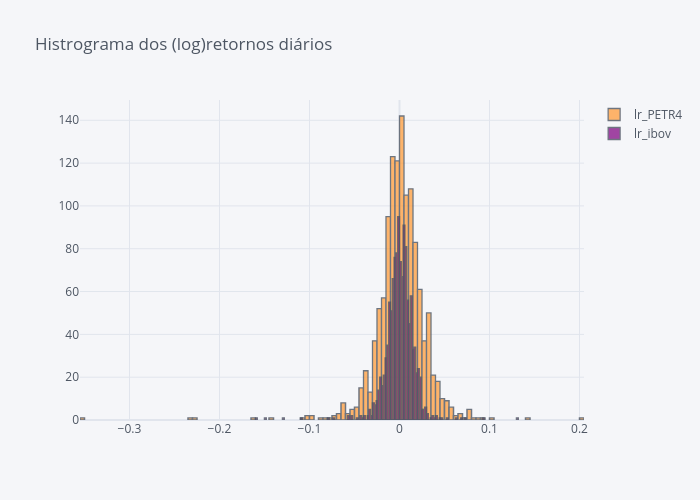

In [284]:
#@markdown histogramas dos (log)retornos diários

retornos.iplot(kind='histogram',
                  #subplots=True,
                  keys = ['lr_'+codigo,'lr_ibov'],
                  colors=['orange','purple'],
                  title='Histrograma dos (log)retornos diários',
                  #theme="henanigans"
                  )

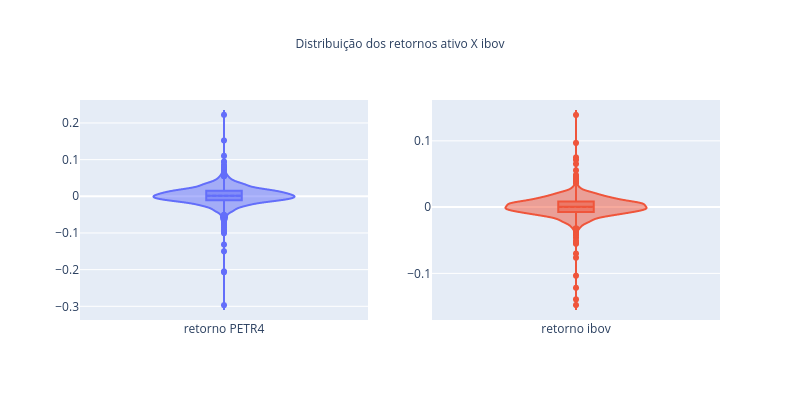

In [285]:
title = "Distribuição dos retornos ativo X ibov"

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_'+codigo].values, name='retorno '+codigo)
    ,row=1, col=1)
fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_ibov'], name='retorno ibov')
    ,row=1, col=2)
fig.update_layout(title_font_size=12 , width=800 , height=400 , showlegend=False,
               title={'text': title,'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},   )

fig.show()

In [286]:
stats.norm.interval(confidence=0.98,
              loc= retornos['r_ibov'].mean(),
              scale=retornos['r_ibov'].std())

(-0.03773752841617481, 0.03828718471050946)

Dados mensais

In [287]:
url_bcb_ipca= f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=csv"
ipca = pd.read_csv(url_bcb_ipca, sep=';' , decimal=',')
ipca['data'] = pd.to_datetime(ipca['data'], dayfirst=True)
ipca.set_index('data', inplace=True)
ipca.rename(columns={'valor': 'ipca (% m)'}, inplace=True)
ipca.head(3)

ipca (% m)
data                  
1980-01-01        6.62
1980-02-01        4.62
1980-03-01        6.04

In [288]:
url_bcb_cdi= f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.4391/dados?formato=csv"
cdi = pd.read_csv(url_bcb_cdi, sep=';', decimal=',')
cdi['data'] = pd.to_datetime(cdi['data'], dayfirst=True)
cdi.set_index('data', inplace=True)
cdi.rename(columns={'valor': 'cdi (% m)'}, inplace=True)
cdi

cdi (% m)
data                 
1986-03-01       0.87
1986-04-01       1.37
1986-05-01       1.32
1986-06-01       1.57
1986-07-01       2.23
...               ...
2024-02-01       0.80
2024-03-01       0.83
2024-04-01       0.89
2024-05-01       0.83
2024-06-01       0.55

[460 rows x 1 columns]

In [289]:
url_bcb = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.12466/dados?formato=csv"
ima = pd.read_csv(url_bcb, sep=';', decimal=',' )
ima['data'] = pd.to_datetime(ima['data'], dayfirst=True)
ima.set_index('data', inplace=True)
ima.rename(columns={'valor': 'ima-b'}, inplace=True)

In [290]:
imaB = ima.resample('MS').first()
imaB['ima-b (% m)'] = imaB['ima-b'].pct_change()*100
imaB.dropna(inplace=True)
imaB.drop('ima-b', axis='columns', inplace=True)
imaB.head(3)

ima-b (% m)
data                   
2004-05-01     0.014357
2004-06-01    -0.320618
2004-07-01     1.390098

In [291]:
indexes = pd.merge(pd.merge(ipca,cdi,left_index=True, right_index=True,how='inner'),imaB,left_index=True, right_index=True,how='inner')
indexes.tail()

ipca (% m)  cdi (% m)  ima-b (% m)
data                                          
2023-01-01        0.53       1.12    -0.578634
2023-02-01        0.84       0.92     0.757020
2023-03-01        0.71       1.17     1.159763
2023-04-01        0.61       0.92     2.921565
2023-05-01        0.23       1.12     1.760319

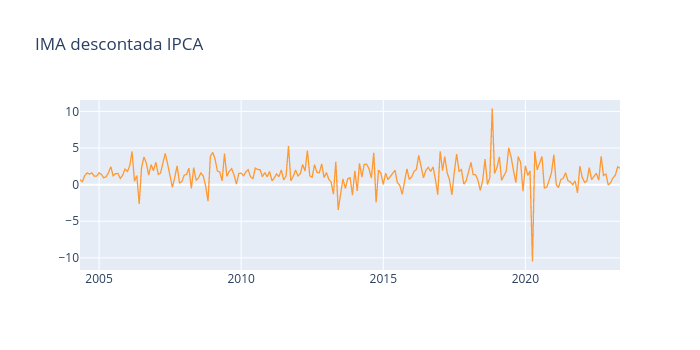

In [292]:
((indexes['ima-b (% m)'] +1)/(indexes['ipca (% m)'] +1)).iplot(layout=dict(title="IMA descontada IPCA",height=350, width=700))

In [293]:
REmonthly_returns = pd.DataFrame()
REmonthly_returns[codigo+'(% m)'] = (preco[codigo].resample('MS').first().ffill()).pct_change()*100
REmonthly_returns['ibov (% m)'] = (preco['ibov'].resample('MS').first().ffill()).pct_change()*100
REmonthly_returns.dropna(inplace=True)
REmonthly_returns.tail(3)

PETR4(% m)  ibov (% m)
Date                              
2024-04-01   -6.296650   -1.695309
2024-05-01   15.168945    0.103945
2024-06-01   -4.514357   -4.004028

In [294]:
allreturns = pd.merge(indexes,REmonthly_returns[['ibov (% m)',codigo+'(% m)']],left_index=True, right_index=True,how='inner')
allreturns.tail(3)

ipca (% m)  cdi (% m)  ima-b (% m)  ibov (% m)  PETR4(% m)
2023-03-01        0.71       1.17     1.159763   -7.050569   -1.594703
2023-04-01        0.61       0.92     2.921565   -2.758059   -3.201571
2023-05-01        0.23       1.12     1.760319    0.414754    4.596983

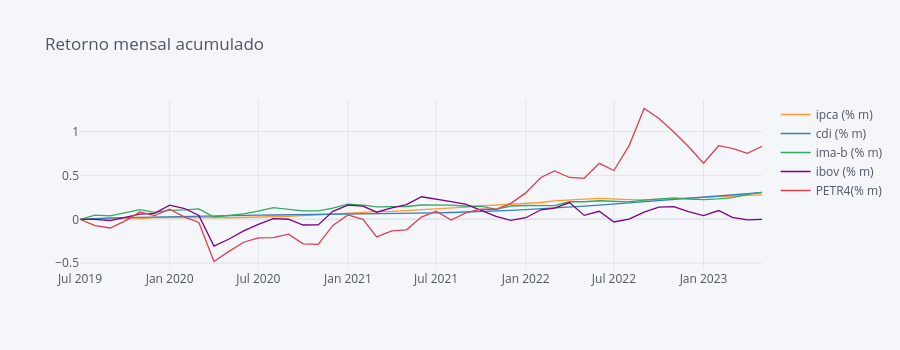

In [295]:
cumulative_allreturns = (1 + allreturns/100).cumprod()  - 1
cumulative_allreturns.iloc[0]=0
cumulative_allreturns.iplot(title= 'Retorno mensal acumulado',dimensions=(900,350))

### Beta

Beta pode ser interpretado como o nível de sensibilidade do retorno do ativo, em comparação com o mercado em geral.  Se o preço da ação sofrer movimentos maiores (mais voláteis) do que os do mercado de ações, o valor $\beta$ será maior que 1. Se os movimentos ou oscilações do preço de uma ação forem menores que os do mercado, o valor $\beta$ será ser menor que 1. Como o aumento da volatilidade do preço das ações significa mais riscos para o investidor, é razoável esperar maiores retornos das ações com $\beta$ acima de 1. O inverso é verdadeiro se o $\beta$ de uma ação for menor que 1, esperamos menos volatilidade, menor risco e, portanto, menores retornos gerais.


|             | Interpretação                                              |
| ----------- | ------------------------------------------------------------ |
| $\beta>1$   | *Risco alto*. Ações mais voláteis, mais agressivas, retorno esperado acima do mercado. |
| $\beta<1$   | *Risco baixo*. Ações menos voláteis, mais defensivas, retorno esperado abaixo do mercado. |
| $\beta=1$   | *Risco do mercado*. Retorno esperado igual ao retorno do mercado |
| $\beta = 0$ | Nesse caso não há risco, o retorno esperado será igual ao ativo livre de risco |
| $\beta < 0$ | O ativo caminha em direção oposta ao do mercado. |


Se $r_a$ é o retorno do ativo e $r_m$ o retorno do *benchmark* (mercado aqui) então
$$
\beta = \frac{\text{Cov}(r_a,r_m)}{\text{Var}(r_m)}
$$
De outro ponto de vista, o $\beta$  é o coeficiente angular de uma regressão linear dos excessos de retornos do ativo contra do mercado
$$
r_a - r_f = \alpha + \beta ( r_m - r_f)
$$
$r_f$ é a taxa livre de risco (usamos a selic).

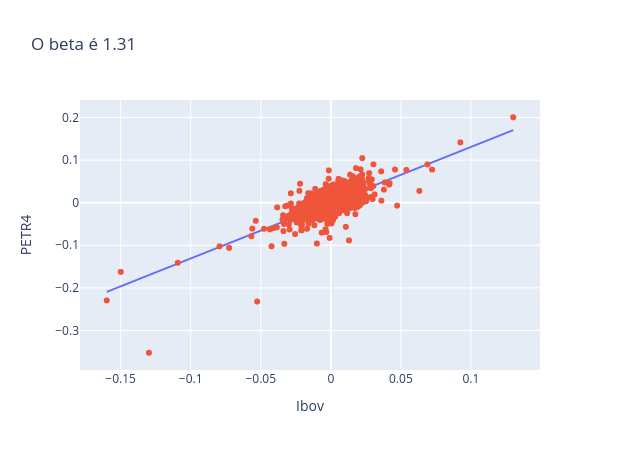

In [296]:
X = retornos['lr_ibov']
y = retornos['lr_'+codigo]
x = sm.add_constant(X)
beta_model = sm.OLS(y, x)
result = beta_model.fit()

intercept,slope = result.params

line_x = np.linspace(retornos['lr_ibov'].min(), retornos['lr_ibov'].max(),100)
line_y = slope*line_x + intercept



trace1 = go.Scatter(x = line_x,y =slope*line_x, mode = 'lines' )

trace2 = go.Scatter(x = retornos['lr_ibov'], y=retornos['lr_'+codigo] , mode ='markers')

layout = dict(title = f'O beta é {slope:.2f}',
              xaxis_title="Ibov",
              yaxis_title=codigo,
              height = 450,width = 620,
              showlegend=False,
              font = dict(size = 12),    )

data_trace = [trace1,trace2]

fig = go.Figure(data=data_trace , layout=layout)

fig.show()

In [297]:
url_bcb_selic= f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=csv"
selic = pd.read_csv(url_bcb_selic, sep=';', decimal=',')
selic['data'] = pd.to_datetime(selic['data'], dayfirst=True)
selic.set_index('data', inplace=True)
selic.rename(columns={'valor': 'selic'}, inplace=True)
# print("selic atual (%): ",selic.tail(1).values[0][0])

In [298]:
expected_return = selic.tail(1).values[0][0]/100 + slope * (retornos['lr_ibov'].mean()*12 -selic.tail(1).values[0][0]/100 )
print("Retorno esperado anualizado: ", expected_return)

Retorno esperado anualizado:  -0.030189296529909607


In [299]:
X.cov(y) /  X.var() ## beta pela covariancia

1.308389326416793

In [300]:

data = {'valor': [10.5, 15.2, 20.7, 25.3, 30.1]}
dates = pd.date_range(start='2022-01-01', periods=len(data['valor']), freq='D')

df = pd.DataFrame(data, index=dates)
print(df)
# Data a partir da qual você deseja somar o valor constante
data_inicial = '2022-01-03'

# Valor constante a ser adicionado
valor_constante = 5.0

# Condição para as datas a partir da data_inicial
condicao = df.index >= pd.to_datetime(data_inicial)

# Atualizar a coluna 'valor' somando o valor constante apenas para as datas após data_inicial
df.loc[condicao, 'valor'] += valor_constante

# Exibir o DataFrame resultante
print(df)

            valor
2022-01-01   10.5
2022-01-02   15.2
2022-01-03   20.7
2022-01-04   25.3
2022-01-05   30.1
            valor
2022-01-01   10.5
2022-01-02   15.2
2022-01-03   25.7
2022-01-04   30.3
2022-01-05   35.1


In [301]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               lr_PETR4   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1553.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          5.94e-221
Time:                        17:13:48   Log-Likelihood:                 3142.6
No. Observations:                1243   AIC:                            -6281.
Df Residuals:                    1241   BIC:                            -6271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.607      0.1

Na primeira coluna do topo da tabela, a variável dependente é 'y', usamos OLS (Mínimos Quadrados Ordinários) e a Data e Hora em que criamos o Modelo. A seguir, o número de observações no conjunto de dados. 'Df Residuals' é outro nome para grau de liberdade: número de observações - número de variáveis ​​de previsão - 1. O 'Df model' numera as variáveis ​​​​de previsão. O tipo de covariância está listado como não robusto, uma covariância robusta é aquela que é calculada de forma a minimizar ou eliminar variáveis.

O 'R-squared' é a medida de quanto da variável independente é explicada por mudanças em nossas variáveis dependentes, em termos percentuais,o 'ajustado' é importante para analisar a eficácia de múltiplas variáveis dependentes (o R-quadrado nunca diminuirá com variáveis adicionais, portanto seu modelo pode parecer mais preciso com múltiplas variáveis, mesmo que elas contribuam pouco) penalizando a fórmula do R-quadrado com base no número de variáveis, portanto, uma pontuação ajustada mais baixa pode indicar que algumas variáveis não estão contribuindo adequadamente para o R-quadrado do seu modelo.

A 'F-statistic' compara seu modelo com um modelo que substitui o efeito de suas variáveis por 0, para descobrir se seu grupo de variáveis ​​é estatisticamente significativo.'Prob(F-statistic')' usa esse número para informar a precisão da hipótese nula ou se é preciso que o efeito de suas variáveis seja 0. A 'log-likelyhood' é um significante numérico da probabilidade de que seu modelo produzido tenha produzido os dados fornecidos. É usado para comparar valores de coeficientes para cada variável no processo de criação do modelo. AIC e BIC são ambos utilizados para comparar a eficácia de modelos no processo de regressão linear, utilizando um sistema de penalidade para medição de múltiplas variáveis.

Na segunda parte da tabela.

'const' e 'r_ibov' na coluna 'coef' são, respectivamente o m e o b na fórmula linear clássica 'y = mx+b'. 'std err' é o erro padrão, uma estimativa do desvio padrão do coeficiente. O 't'  é uma medida da precisão com que o coeficiente foi medido. Um erro padrão baixo comparado a um coeficiente alto produz uma estatística t alta, o que significa uma significância alta para o seu coeficiente.

'P>|t|' é uma das estatísticas mais importantes do resumo, usa a estatística t para produzir o *valor p* (uma medida da chance do coeficiente ser medido por acaso por meio de nosso modelo). Um valor p de 0,378 indica que há 37,8% de chance da variável não afetar a variável dependente  nossos resultados serem produzidos ao acaso. A análise adequada do modelo comparará o valor p com um limite com o qual podemos aplicar significância ao nosso coeficiente, o "comum" é 0,05.

[0,025 e 0,975] são medidas de valores dos coeficientes dentro de 95% dos dados, ou dentro de dois desvios padrão. Fora desses valores geralmente podem ser considerados valores discrepantes.

'Omnibus' descreve a normalidade da distribuição de nossos resíduos. Um 0 indicaria normalidade perfeita. Prob(Omnibus) é um teste estatístico que mede a probabilidade de os resíduos serem normalmente distribuídos. Um 1 indicaria uma distribuição perfeitamente normal. 'Skew' é uma medida de simetria em nossos dados, sendo 0 uma simetria perfeita. 'Kurtosis' mede o pico de nossos dados, ou sua concentração em torno de 0 em uma curva normal. Uma curtose mais alta implica menos valores discrepantes.

'Durbin-Watson' é uma medida de homocedasticidade, ou uma distribuição uniforme de erros em nossos dados. A heterocedasticidade implicaria uma distribuição desigual, por exemplo, à medida que o ponto de dados aumenta, o erro relativo aumenta. A homocedasticidade ideal ficará entre 1 e 2. 'Jarque-Bera' (JB) e 'Prob(JB)' são métodos alternativos de medir o mesmo valor que 'Omnibus' e 'Prob(Omnibus)' usando assimetria e curtose. Usamos esses valores para confirmar um ao outro.

Essas definições mal arranham a superfície de qualquer um desses tópicos. [[fórmulas](https://www.adrian.idv.hk/2021-07-16-statsmodels/)]

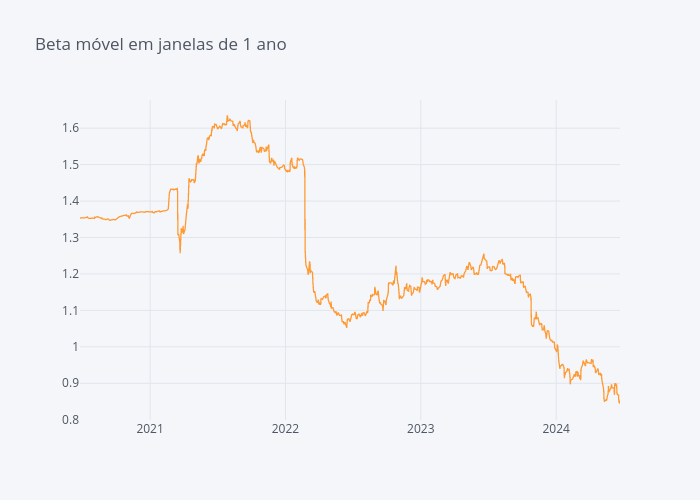

In [302]:
from statsmodels.regression.rolling import RollingOLS

modelo = RollingOLS(y,x,window=252)
resultado = modelo.fit()
betas = pd.DataFrame(resultado.params.lr_ibov.dropna())
betas.iplot(title='Beta móvel em janelas de 1 ano')

### CAPM

O famoso [Capital Asset Pricing Model](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.1964.tb02865.x) (CAPM) representa a relação entre o retorno esperado de um ativo de risco e o risco de mercado (também conhecido como sistemático ou não diversificável).

O CAPM é representado pela seguinte equação:
$$E(r_a) = r_f +\beta(E(r_m)-r_f)$$
onde $E(\ )$ denota o retorno esperado e $\beta$ é o coeficiente beta que pode ser interpretado como o nível de sensibilidade do retorno do ativo, em comparação com o mercado em geral.

In [303]:
capm_data =  pd.merge(cdi,REmonthly_returns[['ibov (% m)',codigo+'(% m)']],left_index=True, right_index=True,how='inner').copy()
capm_data.rename(columns={"cdi (% m)":"cdi","ibov (% m)":"mercado",codigo+'(% m)':"ativo"},inplace=True)
capm_data

cdi    mercado      ativo
2019-07-01  0.57  -0.659720  -3.606774
2019-08-01  0.50   0.775607  -3.705070
2019-09-01  0.46  -1.468774  -2.861634
2019-10-01  0.48   3.405680   8.735204
2019-11-01  0.38   3.981625  10.614294
2019-12-01  0.37   0.799475  -3.834707
2020-01-01  0.38   8.721725   7.068701
2020-02-01  0.29  -3.326221  -8.208470
2020-03-01  0.34  -6.982526  -5.855209
2020-04-01  0.28 -33.442438 -46.098763
2020-05-01  0.24  11.144617  21.538458
2020-06-01  0.21  12.353568  16.973527
2020-07-01  0.19   8.556759   6.787997
2020-08-01  0.16   6.888559   0.416586
2020-09-01  0.16  -0.643781   4.908259
2020-10-01  0.16  -6.547060 -13.205066
2020-11-01  0.15   0.113114  -1.007581
2020-12-01  0.16  16.475044  30.279912
2021-01-01  0.15   6.487627  12.929694
2021-02-01  0.13  -1.006259  -4.773439
2021-03-01  0.20  -5.989861 -20.087181
2021-04-01  0.21   4.457334   8.590924
2021-05-01  0.27   3.432449   1.375279
2021-06-01  0.31   7.598420  16.474600
2021-07-01  0.36  -2.027801   6.485889
2021-08-01  0.43  -2.506645  -9.119067
2021-09-01  0.44  -2.546606   8.483544
2021-10-01  0.49  -5.440718   3.550271
2021-11-01  0.59  -6.509300   0.000000
2021-12-01  0.77  -4.524827   5.714294
2022-01-01  0.73   3.122798  10.400542
2022-02-01  0.76   8.876850  13.441040
2022-03-01  0.93   1.791475   5.060592
2022-04-01  0.83   5.553337  -4.787986
2022-05-01  1.03 -12.281813  -0.642250
2022-06-01  1.02   4.427086  11.586407
2022-07-01  1.03 -11.140445  -4.963353
2022-08-01  1.17   3.305576  18.051186
2022-09-01  1.07   8.001956  23.158940
2022-10-01  1.02   5.189077  -4.933509
2022-11-01  1.02   0.684554  -7.209445
2022-12-01  1.12  -5.133885  -8.312983
2023-01-01  1.12  -4.101834 -10.433781
2023-02-01  0.92   5.571746  12.172776
2023-03-01  1.17  -7.050569  -1.594703
2023-04-01  0.92  -2.758059  -3.201571
2023-05-01  1.12   0.414754   4.596983
2023-06-01  1.07   8.474693  18.557605
2023-07-01  1.07   8.237688  18.878977
2023-08-01  1.14   1.316086   1.728730
2023-09-01  0.97  -2.767056  10.698735
2023-10-01  1.00  -2.405571   4.566343
2023-11-01  0.92  -0.003477   2.930833
2023-12-01  0.89  11.342599   5.546533
2024-01-01  0.97   3.586177   5.915352
2024-02-01  0.80  -3.177163  10.031748
2024-03-01  0.83   0.544049  -3.343761
2024-04-01  0.89  -1.695309  -6.296650
2024-05-01  0.83   0.103945  15.168945
2024-06-01  0.55  -4.004028  -4.514357

In [304]:
X = capm_data['mercado'] - capm_data['cdi']     # excesso retorno ativo
y = capm_data['ativo']   - capm_data['cdi']  # excesso retorno indice
x = sm.add_constant(X)
capm_model = sm.OLS(y, x)
result = capm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     92.42
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.31e-13
Time:                        17:13:49   Log-Likelihood:                -203.84
No. Observations:                  60   AIC:                             411.7
Df Residuals:                      58   BIC:                             415.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4330      0.949      2.563      0.0

O intercepto ([Jensen alfa](https://www.investopedia.com/terms/j/jensensmeasure.asp)) positivo e significativo, significa que – assumindo que o modelo CAPM é verdadeiro – o ativo ou carteira gera retornos ajustados ao risco anormalmente elevados. Existem duas possíveis
implicações – ou o mercado é ineficiente ou há algum outro fator de risco que deve ser incluído no modelo. Esta questão é conhecida como joint hypothesis problem.

O CAPM pode ser considerado um modelo unifatorial.
[Fama e French expandiram o modelo CAPM](https://www.sciencedirect.com/science/article/abs/pii/0304405X93900235) adicionando dois fatores adicionais que explicam os retornos excessivos de um ativo ou carteira. Os fatores são: **O fator de mercado** (*MKT*) --- mede o excesso de retorno do mercado, analogo do CAPM; **O fator tamanho**, *SMB* (Small Minus Big)--- mede o excesso de retorno das ações com uma pequena capitalização de mercado sobre aqueles com uma grande capitalização de mercad; **O fator de valor**, *HML* (High Minus Low) --- mede o excesso
de retorno de ações de valor em relação às ações de crescimento.

 As ações de valor têm uma alta razão [book-to-market](https://maisretorno.com/portal/termos/b/book-to-market), enquanto as ações de crescimento são caracterizadas por uma baixa razão.

 O modelo pode ser escrito como

$$
E(r_a) -r_f = \alpha + \beta_{\text{MKT}}\text{MKT} + \beta_{\text{SMB}}{\text{SMB}} + \beta_{\text{HML}}\text{HML}.
$$

Esses fatores tornaram-se conhecidos coletivamente como Fatores Fama-French ou Modelo de Três Fatores. Eles foram amplamente aceitos em  ambos academia e a indústria como referência do mercado de ações e são
frequentemente usados para avaliar desempenho do investimento.

In [305]:
url1 = 'https://nefin.com.br/data/risk_factors.html'
#ptra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
#junta com a requests
r1 = requests.get(url1, headers=header)
# read_html do pandas põe a tabela num dataframe
dfs = pd.read_html(r1.text, decimal=',', thousands='.' , index_col=0)[0]

dfs

6 months  1 year 5 years Full sample
Risk Factors*                                     
Rm-Rf           17.19%  11.23%  -0.82%       1.24%
SMB            -12.33%  -1.44%   0.59%      -0.82%
HML             23.75%  42.86%  19.39%       3.82%
WML              9.43%   7.25%  29.81%      11.57%
IML            -12.41%  -6.51%   5.26%       0.08%
Risk-Free         1087  12.13%   7.94%      11.72%

O NEFIN (Núcleo de Pesquisa em Economia Financeira) disponibiliza séries históricas dos fatores de risco da bolsa brasileira, sendo eles:

Rm_minus_Rf -> Fator de mercado

SMB -> Tamanho

HML -> Valor

WML -> Momentum

IML -> Liquidez

In [306]:
url = 'https://nefin.com.br/resources/risk_factors/nefin_factors.csv'
fff = pd.read_csv(url, index_col = [0], parse_dates = ['Date'])
# fff.index = pd.to_datetime(fff.index , format="%Y-%m-%d")

In [307]:
fff

Date        RM  Risk_Free  Rm_minus_Rf       SMB       HML  \
1    2001-01-02  0.007179   0.000579     0.006601  0.176477  0.015225   
2    2001-01-03  0.063005   0.000577     0.062427  0.013144  0.034089   
3    2001-01-04  0.000264   0.000574    -0.000310 -0.009516 -0.018572   
4    2001-01-05 -0.012267   0.000573    -0.012839  0.013002 -0.009581   
5    2001-01-08  0.004554   0.000573     0.003982 -0.002692  0.021409   
...         ...       ...        ...          ...       ...       ...   
5786 2024-05-13  0.001510   0.000392     0.001117 -0.000826  0.000586   
5787 2024-05-14  0.001639   0.000392     0.001247  0.003705 -0.008032   
5788 2024-05-15  0.001499   0.000392     0.001107  0.011536 -0.020510   
5789 2024-05-16 -0.000877   0.000392    -0.001269 -0.000699 -0.009680   
5790 2024-05-17 -0.002655   0.000392    -0.003048  0.001124 -0.002377   

           WML       IML  
1     0.010002  0.003199  
2    -0.059469  0.018638  
3    -0.000032 -0.005971  
4     0.010626  0.023871  
5    -0.006673  0.005605  
...        ...       ...  
5786 -0.003114 -0.004916  
5787 -0.011840  0.002671  
5788 -0.022977 -0.000729  
5789 -0.012397 -0.000058  
5790 -0.010031 -0.009013  

[5790 rows x 8 columns]

In [308]:
fff_data = pd.merge(fff, retornos[['r_'+codigo]],
                    left_on='Date', right_index=True,how='inner')
fff_data['excess_rtn'] = fff_data['r_'+codigo] - fff_data['Risk_Free']
# fff_data.set_index('Date',inplace=True)
fff_data

Date        RM  Risk_Free  Rm_minus_Rf       SMB       HML  \
4571 2019-06-24  0.000396   0.000246     0.000149  0.012687  0.001446   
4572 2019-06-25 -0.017112   0.000246    -0.017358  0.008186 -0.002679   
4573 2019-06-26  0.006416   0.000246     0.006170  0.004067  0.005704   
4574 2019-06-27  0.000382   0.000246     0.000136 -0.002393 -0.004606   
4575 2019-06-28  0.003451   0.000246     0.003205  0.008020  0.009718   
...         ...       ...        ...          ...       ...       ...   
5786 2024-05-13  0.001510   0.000392     0.001117 -0.000826  0.000586   
5787 2024-05-14  0.001639   0.000392     0.001247  0.003705 -0.008032   
5788 2024-05-15  0.001499   0.000392     0.001107  0.011536 -0.020510   
5789 2024-05-16 -0.000877   0.000392    -0.001269 -0.000699 -0.009680   
5790 2024-05-17 -0.002655   0.000392    -0.003048  0.001124 -0.002377   

           WML       IML   r_PETR4  excess_rtn  
4571  0.001712  0.005314 -0.001061   -0.001307  
4572  0.000024  0.004489 -0.026195   -0.026441  
4573  0.002894 -0.000843  0.005816    0.005570  
4574  0.000759  0.002965 -0.015902   -0.016148  
4575  0.005720  0.007798  0.006611    0.006364  
...        ...       ...       ...         ...  
5786 -0.003114 -0.004916  0.000962    0.000570  
5787 -0.011840  0.002671 -0.018020   -0.018412  
5788 -0.022977 -0.000729 -0.060436   -0.060828  
5789 -0.012397 -0.000058 -0.029167   -0.029559  
5790 -0.010031 -0.009013 -0.015826   -0.016219  

[1219 rows x 10 columns]

In [309]:
import statsmodels.formula.api as smf
fff_model = smf.ols(formula='excess_rtn ~ RM + SMB + HML',data=fff_data).fit()
print(fff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1262.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:13:51   Log-Likelihood:                 3472.7
No. Observations:                1219   AIC:                            -6937.
Df Residuals:                    1215   BIC:                            -6917.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.213e-05      0.000     -0.105      0.9

Devemos prestar atenção a dois problemas: (1) Se o intercepto é positivo
 e estatisticamente significativo; (2) Quais fatores são estatisticamente significativos e se sua direção corresponde aos
resultados passados (por exemplo, da literatura) ou as nossas suposições.
Também podemos olhar para a estatística F apresentada no resumo da regressão (Prob (F-statistic)), que testa a significância conjunta da regressão. A hipótese nula afirma que os coeficientes de todos os fatores, exceto o intercepto, possuem valores iguais a 0.


###previsão

In [310]:
# Calcula o retorno mensal dos fatores para todas as colunas, exceto a coluna "Date"
fff_m = (fff_data
            .assign(month = lambda x : pd.PeriodIndex(x['Date'], freq = 'M'))
            .groupby('month')
            .agg(**{col: (col, lambda x: (x + 1).prod() - 1) for col in fff_data.columns if col != 'Date'})
            )

fff_m

RM  Risk_Free  Rm_minus_Rf       SMB       HML       WML  \
month                                                                     
2019-06 -0.006620   0.001232    -0.007844  0.030879  0.009549  0.011149   
2019-07  0.018028   0.005280     0.012684  0.070941 -0.072486 -0.037064   
2019-08 -0.002278   0.004959    -0.007204  0.040418  0.014244  0.087440   
2019-09  0.030661   0.004474     0.026077 -0.038981 -0.015437 -0.039942   
2019-10  0.016928   0.004593     0.012281  0.021161  0.053908  0.049235   
2019-11  0.013866   0.003522     0.010310  0.077145 -0.043413  0.000307   
2019-12  0.082867   0.003297     0.079323  0.089779 -0.021871 -0.027510   
2020-01 -0.010944   0.003713    -0.014605  0.051703  0.016272  0.092617   
2020-02 -0.081468   0.002914    -0.084150 -0.008271 -0.032899  0.018199   
2020-03 -0.285786   0.003285    -0.288169 -0.223835 -0.019175 -0.023170   
2020-04  0.091904   0.002683     0.088994  0.040214 -0.073574  0.159764   
2020-05  0.083319   0.002205     0.080944 -0.034149  0.015152  0.036776   
2020-06  0.087309   0.001895     0.085261  0.090825 -0.006413  0.021140   
2020-07  0.084266   0.001887     0.082230 -0.028136  0.051430  0.065739   
2020-08 -0.033518   0.001580    -0.035045  0.014421 -0.009036  0.082931   
2020-09 -0.046170   0.001583    -0.047681 -0.049742 -0.018027  0.016189   
2020-10 -0.000840   0.001583    -0.002420 -0.021302  0.008575  0.009069   
2020-11  0.149844   0.001436     0.148208 -0.006196  0.011201 -0.100823   
2020-12  0.088832   0.001509     0.087199 -0.057436 -0.004995 -0.032422   
2021-01 -0.031772   0.001431    -0.033159 -0.012532 -0.083142  0.093273   
2021-02 -0.038261   0.001407    -0.039615 -0.022663 -0.050057  0.115911   
2021-03  0.050111   0.002215     0.047795  0.037888  0.080687 -0.068901   
2021-04  0.028188   0.002342     0.025789  0.099781  0.026469  0.080669   
2021-05  0.060527   0.002927     0.057440  0.010138  0.052921 -0.037219   
2021-06  0.004050   0.003316     0.000731  0.070861  0.023127  0.014414   
2021-07 -0.035503   0.003711    -0.039077 -0.012779 -0.012737  0.067889   
2021-08 -0.021434   0.004506    -0.025829  0.004124  0.050696  0.012431   
2021-09 -0.064900   0.004840    -0.069420  0.012158  0.066410 -0.024652   
2021-10 -0.057742   0.005317    -0.062744 -0.050443  0.041582  0.015944   
2021-11 -0.014870   0.006325    -0.021070 -0.011966  0.097020  0.068508   
2021-12  0.023004   0.007283     0.015612  0.041018  0.042611  0.078849   
2022-01  0.056978   0.007825     0.048790 -0.042962  0.054176 -0.073269   
2022-02 -0.003358   0.007831    -0.011108 -0.071351  0.021986  0.069651   
2022-03  0.064084   0.009589     0.054000 -0.004743 -0.040611 -0.017825   
2022-04 -0.090341   0.008632    -0.098169  0.022602  0.123024  0.179315   
2022-05  0.021155   0.010538     0.010510 -0.019370  0.078296  0.089468   
2022-06 -0.114648   0.010306    -0.123737 -0.068508  0.051612  0.130912   
2022-07  0.054223   0.010500     0.043290  0.037143  0.072072 -0.023220   
2022-08  0.066647   0.011752     0.054285  0.069487  0.081891 -0.053464   
2022-09 -0.005635   0.010751    -0.016220  0.016207 -0.087604  0.012434   
2022-10  0.056169   0.010213     0.045513  0.004210 -0.023518 -0.013876   
2022-11 -0.046342   0.010231    -0.056029 -0.103705  0.009089  0.043035   
2022-12 -0.026697   0.010729    -0.037048  0.031127 -0.039292  0.019978   
2023-01  0.037438   0.011240     0.025919  0.025324  0.025500 -0.028863   
2023-02 -0.058174   0.009184    -0.066778 -0.042180 -0.008056  0.092990   
2023-03 -0.027399   0.011744    -0.038709  0.011894 -0.025507  0.076974   
2023-04  0.030204   0.009180     0.020842  0.012201  0.057166 -0.012680   
2023-05  0.055140   0.011231     0.043444  0.113493  0.037622 -0.126933   
2023-06  0.090358   0.010714     0.078841  0.012140  0.063906 -0.025139   
2023-07  0.023174   0.010593     0.012454  0.025630  0.016064  0.001674   
2023-08 -0.051464   0.011286    -0.062080  0.005852  0.045327  0.095096   
2023-09  0.007214   0.009574    -0.00234

In [311]:
fff_m.index = fff_m.index.to_timestamp()
fff_m = fff_m.drop(["RM", "Risk_Free", "r_"+codigo], axis = 1)
fff_m

Rm_minus_Rf       SMB       HML       WML       IML  excess_rtn
month                                                                      
2019-06-01    -0.007844  0.030879  0.009549  0.011149  0.019858   -0.031964
2019-07-01     0.012684  0.070941 -0.072486 -0.037064  0.066396   -0.053532
2019-08-01    -0.007204  0.040418  0.014244  0.087440  0.087290   -0.019424
2019-09-01     0.026077 -0.038981 -0.015437 -0.039942 -0.041783    0.075597
2019-10-01     0.012281  0.021161  0.053908  0.049235  0.030199    0.098061
2019-11-01     0.010310  0.077145 -0.043413  0.000307  0.050207   -0.037827
2019-12-01     0.079323  0.089779 -0.021871 -0.027510  0.129425    0.046221
2020-01-01    -0.014605  0.051703  0.016272  0.092617  0.075728   -0.060820
2020-02-01    -0.084150 -0.008271 -0.032899  0.018199 -0.016025   -0.111921
2020-03-01    -0.288169 -0.223835 -0.019175 -0.023170 -0.127537   -0.449784
2020-04-01     0.088994  0.040214 -0.073574  0.159764 -0.014430    0.286796
2020-05-01     0.080944 -0.034149  0.015152  0.036776 -0.023107    0.124403
2020-06-01     0.085261  0.090825 -0.006413  0.021140  0.065559    0.057489
2020-07-01     0.082230 -0.028136  0.051430  0.065739 -0.004810    0.028245
2020-08-01    -0.035045  0.014421 -0.009036  0.082931  0.031897   -0.015521
2020-09-01    -0.047681 -0.049742 -0.018027  0.016189 -0.049079   -0.105581
2020-10-01    -0.002420 -0.021302  0.008575  0.009069 -0.033186   -0.035696
2020-11-01     0.148208 -0.006196  0.011201 -0.100823  0.003348    0.312819
2020-12-01     0.087199 -0.057436 -0.004995 -0.032422 -0.018583    0.136449
2021-01-01    -0.033159 -0.012532 -0.083142  0.093273  0.059522   -0.059572
2021-02-01    -0.039615 -0.022663 -0.050057  0.115911  0.090261   -0.167915
2021-03-01     0.047795  0.037888  0.080687 -0.068901 -0.027605    0.081246
2021-04-01     0.025789  0.099781  0.026469  0.080669  0.042057    0.010703
2021-05-01     0.057440  0.010138  0.052921 -0.037219  0.031229    0.134294
2021-06-01     0.000731  0.070861  0.023127  0.014414  0.028871    0.091668
2021-07-01    -0.039077 -0.012779 -0.012737  0.067889 -0.012392   -0.089023
2021-08-01    -0.025829  0.004124  0.050696  0.012431 -0.002253    0.065795
2021-09-01    -0.069420  0.012158  0.066410 -0.024652  0.001992   -0.003353
2021-10-01    -0.062744 -0.050443  0.041582  0.015944 -0.068836   -0.008218
2021-11-01    -0.021070 -0.011966  0.097020  0.068508  0.040418    0.077189
2021-12-01     0.015612  0.041018  0.042611  0.078849  0.036411    0.078127
2022-01-01     0.048790 -0.042962  0.054176 -0.073269  0.000318    0.128302
2022-02-01    -0.011108 -0.071351  0.021986  0.069651 -0.066010    0.042855
2022-03-01     0.054000 -0.004743 -0.040611 -0.017825  0.042699   -0.025535
2022-04-01    -0.098169  0.022602  0.123024  0.179315 -0.011197   -0.018166
2022-05-01     0.010510 -0.019370  0.078296  0.089468 -0.006137    0.094787
2022-06-01    -0.123737 -0.068508  0.051612  0.130912 -0.038292   -0.080376
2022-07-01     0.043290  0.037143  0.072072 -0.023220 -0.035585    0.210106
2022-08-01     0.054285  0.069487  0.081891 -0.053464  0.006982    0.178635
2022-09-01    -0.016220  0.016207 -0.087604  0.012434  0.021199   -0.112814
2022-10-01     0.045513  0.004210 -0.023518 -0.013876 -0.021589   -0.009791
2022-11-01    -0.056029 -0.103705  0.009089  0.043035 -0.063753   -0.052911
2022-12-01    -0.037048  0.031127 -0.039292  0.019978  0.043723   -0.090823
2023-01-01     0.025919  0.025324  0.025500 -0.028863  0.004495    0.052277
2023-02-01    -0.066778 -0.042180 -0.008056  0.092990  0.040607   -0.040670
2023-03-01    -0.038709  0.011894 -0.025507  0.076974 -0.023284   -0.081745
2023-04-01     0.020842  0.012201  0.057166 -0.012680 -0.001392    0.128184
2023-05-01     0.043444  0.113493  0.037622 -0.126933  0.074280    0.089915
2023-06-01     0.078841  0.012140  0.063906 -0.025139 -0.013656    0.191917
2023-07-01     0.012454  0.025630  0.016064  0.001674 -0.040115    0.042481
2023-08-01    -0.062080  0.005852  0.045327  0.095096  0.005

#### regressão de Lasso

In [312]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [313]:
# Definindo um modelo de regressão com os parâmetros adequados
lm_model = ElasticNet(
  alpha=0.0053,  # Parâmetro de regularização para controlar a força da penalização
  l1_ratio=1,    # Razão entre a penalização L1 e L2 (Lasso e Ridge, respectivamente)
  max_iter=5000, # Número máximo de iterações permitidas durante a otimização
  fit_intercept=False  # Indica se deve ou não ajustar uma interceptação na regressão
)

# Criando um pipeline para o modelo de regressão
lm_pipeline = Pipeline([
  ("regressor", lm_model)
])

# Definindo a data de treinamento
training_date = "2021-12"

# Selecionando os dados de treinamento até a data especificada
data_training = (fff_m
  .query(f"month<='{training_date}'")
)

# Realiza o ajuste do modelo
lm_fit = lm_pipeline.fit(
  data_training, # X
  data_training.get("excess_rtn") # Y
)

# Criando um DataFrame com os valores previstos e reais
predicted_values = (pd.DataFrame({
    "Ajuste": lm_fit.predict(fff_m),  # Valores previstos pelo modelo
    "Realização": fff_m.get("excess_rtn")  # Valores reais observados
  })
  .assign(month = fff_m.index)  # Adicionando a coluna de meses
  .melt(id_vars="month", var_name="Variable", value_name="return")  # "Derretendo" o DataFrame para facilitar a plotagem
)

predicted_values

month    Variable    return
0   2019-06-01      Ajuste -0.022618
1   2019-07-01      Ajuste -0.037881
2   2019-08-01      Ajuste -0.013745
3   2019-09-01      Ajuste  0.053494
4   2019-10-01      Ajuste  0.069391
..         ...         ...       ...
115 2024-01-01  Realização  0.084265
116 2024-02-01  Realização -0.022994
117 2024-03-01  Realização -0.076827
118 2024-04-01  Realização  0.146209
119 2024-05-01  Realização -0.092781

[120 rows x 3 columns]

In [314]:
import matplotlib.pyplot as plt
from plotnine import *

from mizani.formatters import percent_format, date_format
from mizani.breaks import date_breaks

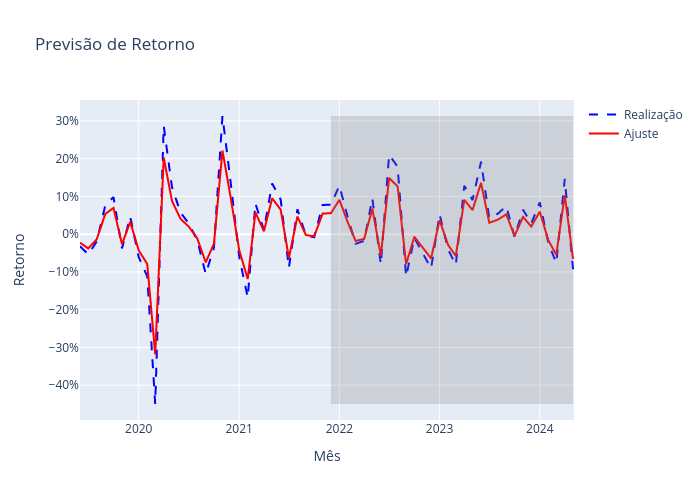

In [315]:
# prompt: gere o grafico da celula acima usando o plotly graph objects

fig = go.Figure()

fig.add_trace(go.Scatter(x=predicted_values['month'], y=predicted_values[predicted_values['Variable']=='Realização']['return'],
                    mode='lines',  line=dict(dash='dash',color ='blue'),
                    name='Realização'))
fig.add_trace(go.Scatter(x=predicted_values['month'], y=predicted_values[predicted_values['Variable']=='Ajuste']['return'],
                    mode='lines',line=dict(color ='red'),
                    name='Ajuste'))

fig.update_layout(
    title="Previsão de Retorno",
    xaxis_title="Mês",
    yaxis_title="Retorno",
    # height=550,
    # width=920,
    showlegend=True,
    font=dict(size=12),
)

fig.update_yaxes(tickformat='.0%')

fig.add_shape(
    type='rect',
    x0 = data_training.index.max(),
    x1 = fff_m.index.max(),
    y0 = predicted_values['return'].min(),
    y1 = predicted_values['return'].max(),
    line_color='rgba(0,0,0,0)',
    fillcolor='rgba(128,128,128,0.25)',# Cor do retângulo com opacidade
)

fig.show()



#### mais fatores

[[five factors model](https://tevgeniou.github.io/EquityRiskFactors/bibliography/FiveFactor.pdf)] o *modelo de Quatro Fatores de Carhart* supõe, subjacentemente, que dentro de um curto período de tempo, uma ação vencedora permanecerá vencedora, enquanto uma ação perdedora permanecerá perdedora. Por exemplo, um critério para classificar vencedores e perdedores poderia ser o retorno total acumulado dos últimos 12 meses. Depois de identificar os dois grupos, compramos os vencedores e vendemos os perdedores dentro de um determinado.
**O fator momentum** (*WML*; Winners Minus Losers) mede os excessos de retorno das ações vencedoras sobre as ações perdedoras nos últimos 12 meses. O modelo de quatro fatores pode ser expresso:

$$
E(r_a) -r_f = \alpha + \beta_{\text{MKT}}\text{MKT} + \beta_{\text{SMB}}{\text{SMB}} + \beta_{\text{HML}}\text{HML}+ \beta_{\text{WML}}\text{WML}.
$$

O *modelo de cinco fatores de Fama-French* adiciona dois fatores aos 3 anteriores: **o fator Robust Minus Weak** (*RMW*) mede os excessos de retorno de empresas com margens de lucro altas (lucratividade robusta) sobre aqueles com lucros mais baixos (fraca lucratividade). **O fator Conservative Minus Aggressive** (*CMA*) mede os excessos de retorno das
 empresas com políticas de baixo investimento (conservadoras) em detrimento daqueles que investem mais (agressivas). O modelo de cinco fatores pode ser expresso da seguinte forma:

$$
E(r_a) -r_f = \alpha + \beta_{\text{MKT}}\text{MKT} + \beta_{\text{SMB}}{\text{SMB}} + \beta_{\text{HML}}\text{HML}+ \beta_{\text{RMW}}\text{RMW} + \beta_{\text{CMA}}\text{CMA}.
$$

obs: O fator SMB no conjunto de dados de cinco fatores é calculado de forma diferente em comparação com como está no conjunto de dados de três fatores. [link](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html)

In [316]:
# !wget http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip
# !unzip -a F-F_Research_Data_Factors_CSV.zip
# !rm F-F_Research_Data_Factors_CSV.zip
# factor_df = pd.read_csv('/content/F-F_Research_Data_Factors.CSV',skiprows=3)
# STR_TO_MATCH = ' Annual Factors: January-December '
# indices = factor_df.iloc[:, 0] == STR_TO_MATCH
# start_of_annual = factor_df[indices].index[0]
# factor_df = factor_df[factor_df.index < start_of_annual]
# factor_df

### DNN
Deep Neural network -- previsão do movimento com base em valores históricos de log-retornos

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [318]:
logrets = pd.DataFrame()
logrets['returns'] = retornos['lr_'+codigo][-252:].copy()
logrets['direção'] = np.sign(logrets['returns']).astype(int)

lags = 5 # lags utilizados para prever o direcionamento
# Cria lags
cols = []
for lag in range(1, lags + 1):
  col = 'lag_{}'.format(lag)
  logrets[col] = logrets['returns'].shift(lag)
  cols.append(col)
logrets.dropna(inplace = True)

'''
    Criar os sinais (valores das variáveis dependentes)
    para avaliar a probabilidade de um movimento ascendente e um
    movimento descendente a partir das observações históricas
'''
cols_bin = []
for col in cols:
  col_bin = col + '_bin'
  logrets[col_bin] = np.digitize(logrets[col], bins=[0])
  cols_bin.append(col_bin)

# treinamento e teste com  50% para cada
train, test = train_test_split(logrets, test_size=0.5, random_state=100)

# Copiando e classificando os conjuntos de treinamento e teste com base nos índices
train = train.copy().sort_index()
test = test.copy().sort_index()

# Definindo o modelo de classificação MLP (DNN) com os parâmetros especificados
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500, hidden_layer_sizes=3 * [500], random_state=1)

# Treinando o modelo com os dados de treinamento, utilizando apenas as características binárias (cols_bin) e a direção como rótulo
model.fit(train[cols_bin], train['direção'])



MLPClassifier(alpha=1e-05, hidden_layer_sizes=[500, 500, 500], max_iter=500,
              random_state=1, solver='lbfgs')

In [319]:
# previsões usando o modelo treinado nos dados de teste
test['pos_dnn'] = model.predict(test[cols_bin])

# retornos da estratégia com base nas previsões do modelo e nos retornos históricos
test['dnn'] = test['pos_dnn'] * test['returns']

# Somando os retornos históricos e os retornos da estratégia e aplicando a função exponencial para obter o total acumulado
test[['returns', 'dnn']].sum().apply(np.exp)

returns    1.256592
dnn        0.824830
dtype: float64

In [320]:
# Calculando os retornos acumulados
cumulative_returns = test[['returns', 'dnn']].cumsum().apply(np.exp)
cumulative_returns.reset_index(inplace=True)

# Transforma em formato long
cumulative_returns_long = cumulative_returns.melt(id_vars = 'Date', var_name='strategy', value_name='cumulative_return')


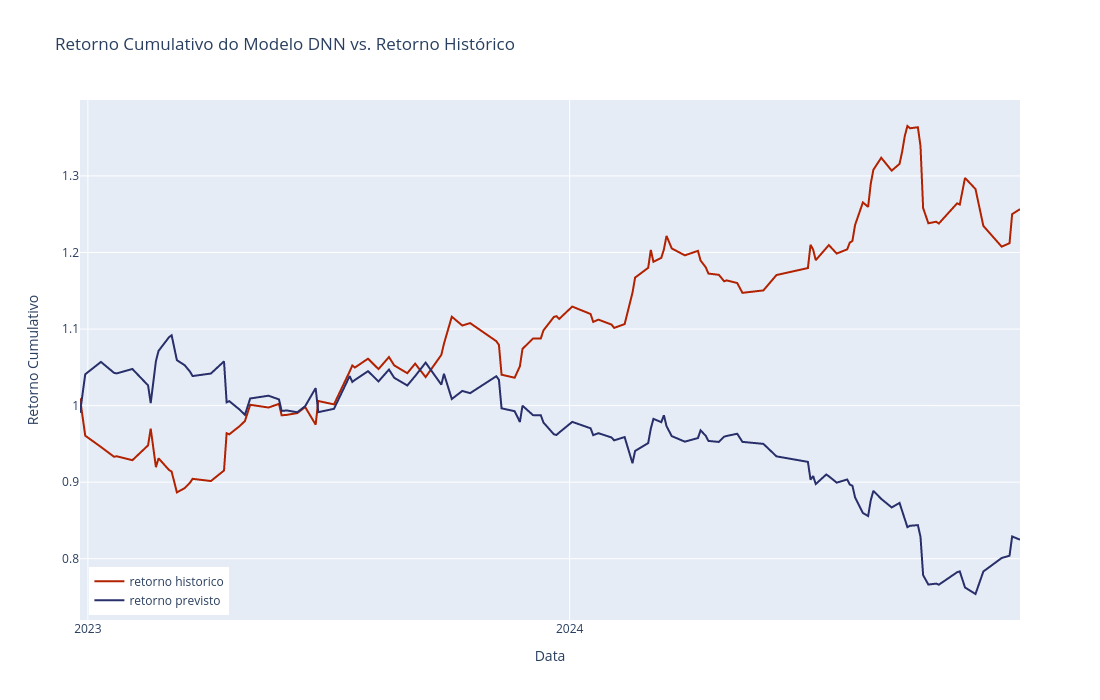

In [321]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=cumulative_returns_long['Date'],
                         y=cumulative_returns_long[cumulative_returns_long['strategy']=='returns']['cumulative_return'],
                         mode='lines', name='retorno historico', line=dict(color='#b22200', width=2)))
fig.add_trace(go.Scatter(x=cumulative_returns_long['Date'],
                         y=cumulative_returns_long[cumulative_returns_long['strategy']=='dnn']['cumulative_return'],
                         mode='lines', name='retorno previsto', line=dict(color='#282f6b', width=2)))

fig.update_layout(title='Retorno Cumulativo do Modelo DNN vs. Retorno Histórico',
                  xaxis_title='Data',
                  yaxis_title='Retorno Cumulativo',
                  xaxis=dict(tickformat="%Y", tickmode="linear", dtick="M6"),
                  legend=dict(yanchor="bottom", y=0.01, xanchor="left", x=0.01),
                  width=1100, height=700)

fig.show()

###Hedge
Os gerentes de carteiras projetam modelos de fatores que lhes dizem como equilibrar um portfólio para obter alfa. Como alfa é como os gerentes são pagos, eles só querem exposição a seus fatores. A cobertura beta (*beta hedge*) remove a parte dos retornos impulsionados pelo mercado e deixa apenas os retornos impulsionados pelos fatores.

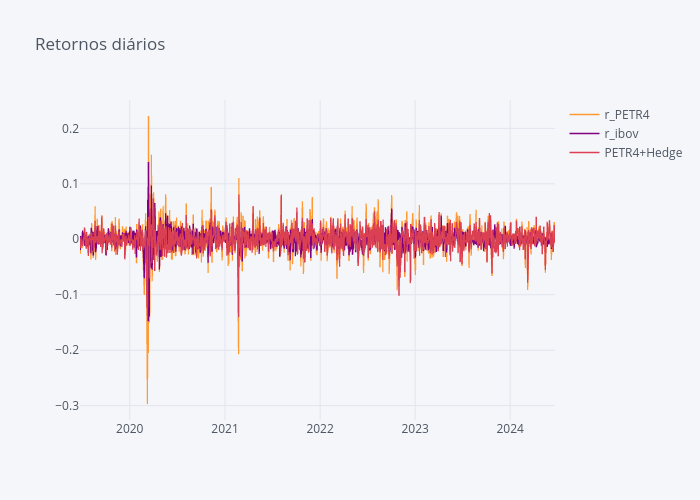

In [322]:
# beta hedge
retornos[codigo+"+Hedge"] = -1 * slope * retornos['r_ibov']+ retornos['r_'+codigo]
retornos.iplot(   keys = ['r_'+codigo,'r_ibov',codigo+"+Hedge"],
                  colors=['orange','purple', 'red'],
                  title='Retornos diários' )


In [323]:
P = retornos[codigo+"+Hedge"].values
X = retornos['r_ibov'].values
alpha,beta,_,_,_ = stats.linregress(X, P)
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: -0.023004234414008767
Beta: 0.0011226574228790666


###Underwater

In [324]:
# def underW (rtns : pd.Series):

#   df_cum_rtns=(1+rtns).cumprod()
#   max_accum = np.maximum.accumulate(df_cum_rtns)
#   return ( df_cum_rtns /max_accum -1 )

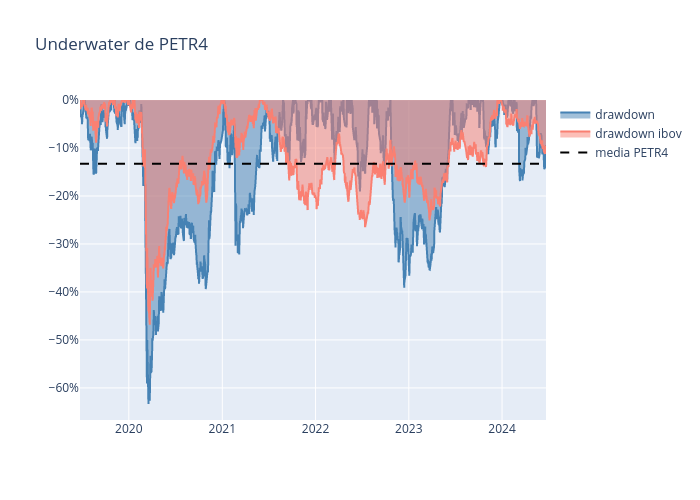

In [325]:
df_cum_rets = (retornos[['r_'+codigo,'r_ibov']]+1).cumprod()
running_max = np.maximum.accumulate(df_cum_rets)
underwater = (df_cum_rets-running_max) / running_max
trace1 = go.Scatter(x=underwater.index,y=underwater['r_'+codigo], name = 'drawdown',line=dict(color='steelblue'), fill='tozeroy')
trace3 = go.Scatter(x=underwater.index,y=underwater['r_ibov'],opacity=.1,  name = 'drawdown ibov',line=dict(color='salmon'), fill='tozeroy')

df_cum_rets_mean = -underwater.mean()
trace2 = go.Scatter(x=[min(underwater.index),max(underwater.index)],y=[-df_cum_rets_mean['r_'+codigo],-df_cum_rets_mean['r_'+codigo]],
                    mode='lines',name = f'media '+codigo,line=dict(color='black', width=2, dash='dash'))

layout = go.Layout(title=f'Underwater de '+codigo ,showlegend=True)
fig = go.Figure(data=[trace1,trace3,trace2], layout=layout)
fig.layout.yaxis.tickformat = '.0%'

fig.show()

### agrupamento do setor por retorno diário

In [326]:
IBr_rtrns = pd.DataFrame()
if codigo in IBr : IBr_rtrns = IBr_preco.pct_change()
else :
  IBr_rtrns = (IBr_preco.pct_change()).join(retornos['r_'+codigo],how='inner')
  IBr_rtrns.rename(columns={'r_'+codigo : codigo+'.SA'}, inplace=True)
IBr_rtrns.dropna(inplace=True)
#m=IBr_rtrns.corr()

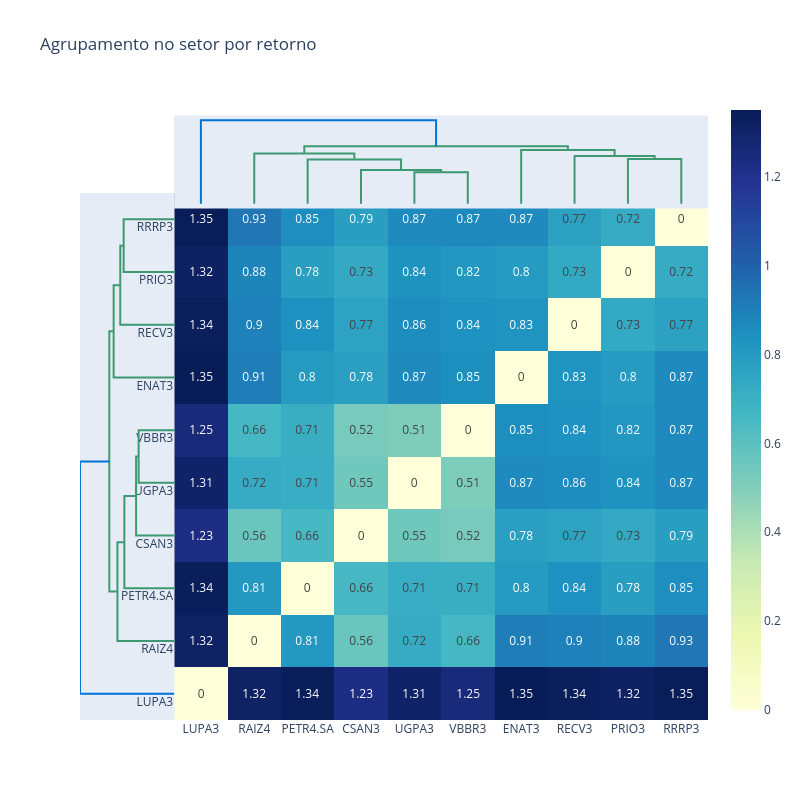

In [327]:
from scipy.spatial.distance import pdist, squareform
import plotly.figure_factory as ff


# Convert DataFrame to a NumPy array
data_array = IBr_rtrns.T.values
labels = IBr_rtrns.columns

# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(data_array, orientation='bottom', labels=labels)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'
# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array) #Pairwise (euclidean)) distances between observations in n-dimensional space.
heat_data = squareform(data_dist) #Convert a vector-form distance vector to a square-form distance matrix
heat_data = heat_data[dendro_leaves, :]
heat_data = heat_data[:, dendro_leaves]

heatmap = [
    go.Heatmap(
        x=dendro_leaves,
        y=dendro_leaves,
        z=heat_data,
        # colorscale='Blues',
        colorscale='YlGnBu',
        text= heat_data.round(2),  # Valores dentro das células
        texttemplate="%{text}",
        textfont={"size":12} ,
        hovertemplate= 'heat: %{z:.2f} <br> x: %{x} ',
    )
]

heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']


# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)

# Edit Layout
fig.update_layout({'title':'Agrupamento no setor por retorno','width': 800, 'height': 800,
                   'showlegend': False, 'hovermode': 'closest',
                   })
# Edit xaxis
fig.update_layout(xaxis={'domain': [.15, 1], 'mirror': False, 'showgrid': False, 'showline': False, 'zeroline': False, 'ticks': ""})
# Edit xaxis2
fig.update_layout(xaxis2={'domain': [0, .15],  'mirror': False,'showgrid': False,'showline': False,'zeroline': False,'showticklabels': False,'ticks': ""})
# Edit yaxis
ytics = [ x-1.5 for x in list(heatmap[0]['y'])]
ylabels = [labels[l] for l in dendro_leaves]
fig.update_layout(yaxis={'tickvals': ytics ,'ticktext': ylabels ,'domain': [0, .85],'mirror': False,'showgrid': False,'showline': False,'zeroline': False,'showticklabels': True,'ticks': '' })
# Edit yaxis2
fig.update_layout(yaxis2={'domain': [.825, .975],'mirror': False, 'showgrid': False,'showline': False,'zeroline': False,'showticklabels': False,'ticks': ""})

# Plot!
fig.show()


### correlação dos retornos com ativos do índice amplo

In [328]:
IBr_corr = IBr_rtrns.corr()
data_corr = pd.DataFrame(IBr_corr[codigo+'.SA'])

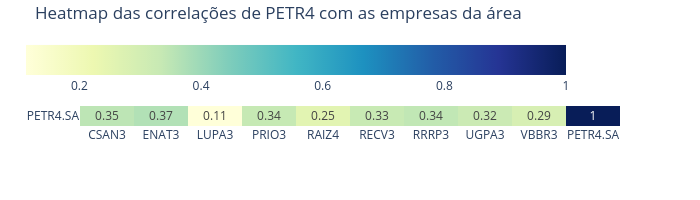

In [329]:
fig = go.Figure(data=go.Heatmap(
    z=data_corr[codigo+'.SA'].values.reshape(1, -1),
    x=data_corr.index,
    y=[codigo+'.SA'],
    colorscale='YlGnBu',
    text= data_corr[codigo+'.SA'].values.reshape(1, -1).round(2),  # Valores dentro das células
    texttemplate="%{text}",
    textfont={"size":12} ,
    colorbar=dict(orientation='h', xpad=0, xanchor='left', x=-0.1, y=1.2)
))

# Configurar o layout
fig.update_layout(height=200,
    title=f'Heatmap das correlações de {codigo} com as empresas da área',
    # xaxis_title='Índice',
    # yaxis_title='Categoria',
)

# Exibir o gráfico
fig.show()


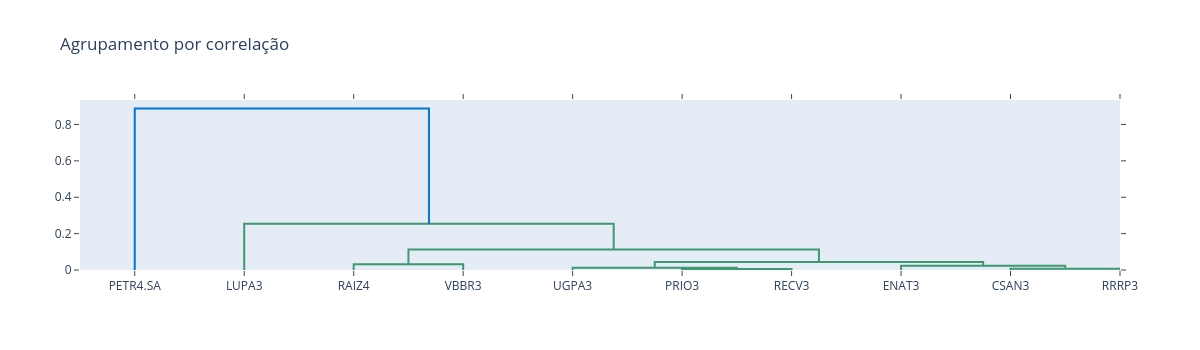

In [330]:
fig3 = ff.create_dendrogram(data_corr)
fig3.update_layout(title='Agrupamento por correlação', width=1200, height=350)
xlabels = [list(data_corr.index)[int(j)] for j in list(fig3['layout']['xaxis']['ticktext'])]
fig3.update_layout(xaxis={'tickvals': list(fig3['layout']['xaxis']['tickvals']) ,'ticktext': xlabels ,})
fig3.show()

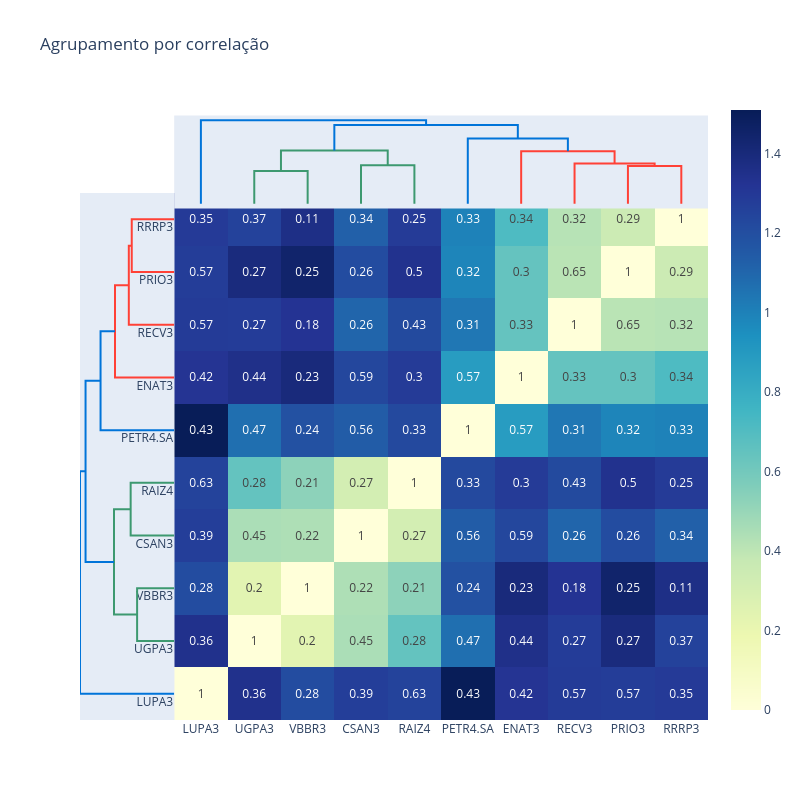

In [331]:
# Convert DataFrame to a NumPy array
data_array = IBr_corr.values
labels = IBr_corr.columns


# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(data_array, orientation='bottom', labels=labels)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'
# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array , metric='correlation')
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves, :]
heat_data = heat_data[:, dendro_leaves]

heatmap = [
    go.Heatmap(
        x=dendro_leaves,
        y=dendro_leaves,
        z=heat_data,
        # colorscale='Blues',
        colorscale='YlGnBu',
        text= IBr_corr.values.round(2),  # Valores dentro das células
        texttemplate="%{text}",
        textfont={"size":12} ,
        hovertemplate= 'heat: %{z:.2f} <br> x: %{x} <br> Corr: %{text} ',
    )
]

heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']


# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)

# Edit Layout
fig.update_layout({'title':'Agrupamento por correlação','width': 800, 'height': 800,
                   'showlegend': False, 'hovermode': 'closest',
                   })
# Edit xaxis
fig.update_layout(xaxis={'domain': [.15, 1], 'mirror': False, 'showgrid': False, 'showline': False, 'zeroline': False, 'ticks': ""})
# Edit xaxis2
fig.update_layout(xaxis2={'domain': [0, .15],  'mirror': False,'showgrid': False,'showline': False,'zeroline': False,'showticklabels': False,'ticks': ""})
# Edit yaxis
ytics = [ x-1.5 for x in list(heatmap[0]['y'])]
ylabels = [labels[l] for l in dendro_leaves]
fig.update_layout(yaxis={'tickvals': ytics ,'ticktext': ylabels ,'domain': [0, .85],'mirror': False,'showgrid': False,'showline': False,'zeroline': False,'showticklabels': True,'ticks': '' })
# Edit yaxis2
fig.update_layout(yaxis2={'domain': [.825, .975],'mirror': False, 'showgrid': False,'showline': False,'zeroline': False,'showticklabels': False,'ticks': ""})

# Plot!
fig.show()


### Valor-em-risco (*value-at-risk*)

In [332]:
def calculate_var_n(S , mu, sigma, c= 0.99, n=1): # n days in the future, c confidence level
    var = S * (mu * n - sigma * np.sqrt(n) * stats.norm.ppf(1-c))
    return var

In [333]:
def simulation(S, mu, sigma, c=.99, n=1, iterations=10000):
    stock_data = np.zeros([iterations, 1])
    rand = np.random.normal(0, 1, [1, iterations])

    # equation for the S(t) stock price
    stock_price = S * np.exp(n * (mu - 0.5 * sigma ** 2) + sigma * np.sqrt(n) * rand)

    # we have to sort the stock prices to determine the percentile
    stock_price = np.sort(stock_price)

    # it depends on the confidence level: 95% -> 5 and 99% -> 1
    percentile = np.percentile(stock_price, (1 - c) * 100)

    return S - percentile

In [334]:
# #parametros da simulação
# t = 1
# n_simuls = 10 ** 5
# port = np.array(20* df['pesos'])  # menor carteira possivel em no.de acoes, 1 unidade de carteira Plena

# chol_mat = np.linalg.cholesky(retornos[df['ativos']].cov()) #decomposição matriz cov
# rv = np.random.normal(size=(n_simuls, len(carteira))) #matriz aleatória n_simuls X len(carteira)
# correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv))) #números aleatórios correlacionados da distribuição Normal Padrão:

# r = np.mean(retornos[df['ativos']], axis=0).values      #retorno medio dos ativos
# sigma = np.std(retornos[df['ativos']], axis=0).values   #dp dos ativos
# S_0 = dados[df['ativos']].values[-1, :]                 #ultimo preço dos ativos
# P_0 = np.sum(port * S_0)                                #ultimo preço de 1 Plena
# print(f'O preço inicial de "1 Plena" é {P_0:.2f}')

# S_t = S_0 * np.exp((r - 0.5 * sigma ** 2) * t + sigma * np.sqrt(t) * correlated_rv) #preço final dos ativos
# P_t = np.sum( port * S_t, axis=1)                                                   #preços finais de 1 Plena
# P_t

# #variação dos preços
# Delta_P = P_t/P_0 - 1

# Delta_P_ordenado = np.sort(Delta_P)
# percentis = [0.01 , 0.1 , 1.0 , 3.0 , 5.0]
# var = np.percentile(Delta_P_ordenado , percentis)
# for x, y in zip(percentis, var):
#   print(f'V@R para 1 dia com grau confiança {100-x:.2f}% é {-y*100:.2f}%')

# pd.DataFrame(Delta_P).hist(bins=75, density=False, histtype='stepfilled', alpha=0.4, color='orange')
# plt.axvline(var[2], 0, 10000 , color = 'darkblue')
# plt.title("Distribuição das possíveis mudanças em 1 dia e o 1-dia 99% VaR");

In [335]:
# alpha = 0.05 #  1 - alpha = 0.95 => 95% confidence level
# var =  norm.ppf(alpha, retornos['Plena'].mean(), retornos['Plena'].std())
# print(f'O VaR diário é {var:.2%} com grau de confiança {1-alpha:.2f}')

# retornos['Plena'].hist(bins=25, density=True, histtype='stepfilled', alpha=0.4, color='orange')
# x = np.linspace((retornos['Plena'].mean() - 4*retornos['Plena'].std()), (retornos['Plena'].mean() + 4*retornos['Plena'].std()), 50)
# plt.plot(x, norm.pdf(x, retornos['Plena'].mean(), retornos['Plena'].std()), 'r--', lw=2)
# plt.axvline(x=var, color = 'darkblue')
# plt.text(0.02, 15, 'normal', fontsize=10, color='red')
# plt.text(-0.02, 30, 'Plena', fontsize=10, color='darkgreen')
# plt.text(-0.05, 20, 'V@R', fontsize=11, color='darkblue')
# plt.ylabel('Frequencia')
# plt.show()

#Volatilidade


A maioria das medidas da volatilidade de um ativo estão negativamente correlacionadas com os seus retornos, e podemos observar um padrão de aumento da volatilidade quando os preços descem e de diminuição da volatilidade quando estão a subir.

In [336]:
vol_movel = pd.DataFrame()
vol_movel['mm21'] = retornos['lr_'+codigo].rolling(window=21).std()
vol_movel['mm252'] = retornos['lr_'+codigo].rolling(window=252).std()

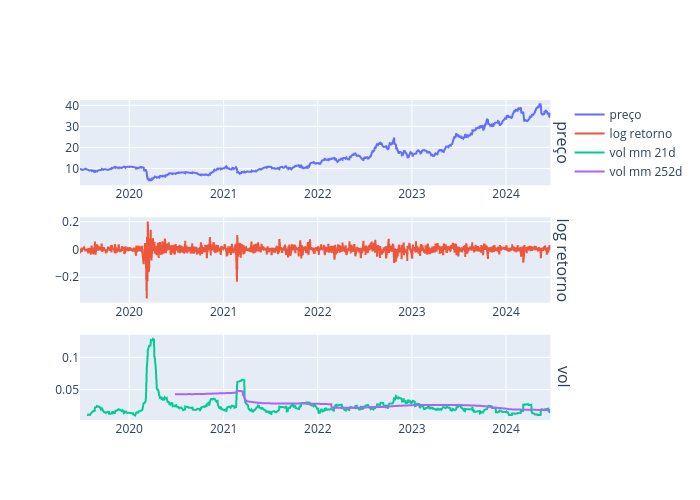

In [337]:
fig=make_subplots(rows=3,cols=1,row_titles=['preço','log retorno','vol'] )
fig.add_trace(go.Scatter(x=vol_movel.index , y = preco[codigo] ,name = 'preço'), row=1,col=1)
fig.add_trace(go.Scatter(x=vol_movel.index , y = retornos['lr_'+codigo],name = 'log retorno'),  row=2,col=1)
fig.add_trace(go.Scatter(x=vol_movel.index , y = vol_movel['mm21'] ,name = 'vol mm 21d'), row=3,col=1)
fig.add_trace(go.Scatter(x=vol_movel.index , y = vol_movel['mm252'],name = 'vol mm 252d' ), row=3,col=1)
fig.show()


##Volatilidade Condicional

Garch(1,1): a variância condicional é $\sigma_n^2 = \omega + \alpha r_{n-1}^2 + \beta\sigma_{n-1}^2 $, as letras gregas são parâmetros estimados (por máx. verossimilhança) do modelo, $r$ é retorno e $\sigma^2$ variância.  Os parâmetros:  $\omega = (1-\alpha-\beta)\cdot(\text{var de longo prazo})$, que é uma "reversão a média": $\sigma_{\infty}^2\to \text{VLP}$ com velocidade $1-\alpha-\beta$; $\alpha$ é o peso dos retornos  mais recentes, desde que $\alpha,\beta,\omega\geq 0$ e $\alpha+\beta<1$; $\beta$ é velocidade do  decaimento para as volatilidades mais recentes.

Quando $\omega=0,\alpha=1-\lambda, \beta=\lambda$ é o ewma: $ (1-\lambda) r_{n-1}^2 + \lambda \sigma_{n-1}^2$


In [338]:
#@title ####   EWMA
#@markdown fator de decaimento para ewma:
Lambda=0.94 #@param {type:"number"}


In [339]:
## ewma a partir da definição
ewma = pd.DataFrame(data = 0, columns=['vol_brute'],index=retornos.index)
ewma['vol_brute'].iloc[0] = np.sqrt((retornos['lr_'+codigo][0:4]**2).sum())
for t in range(1,len(retornos['r_'+codigo])):
    ewma.iloc[t] = np.sqrt((1-Lambda)*retornos['r_'+codigo].iloc[t-1]**2 + Lambda*ewma.iloc[t-1]**2)
# ewma.tail(3)

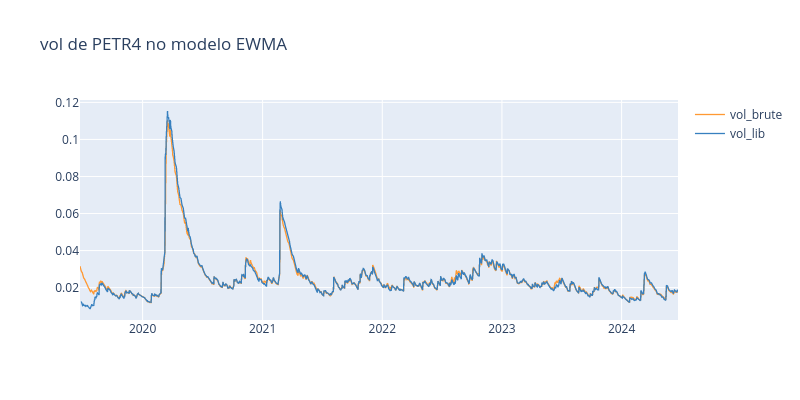

In [340]:
## ewma usando a biblioteca
#########
ewma['vol_lib'] = (retornos['lr_'+codigo].ewm(alpha = 0.06, min_periods=4, adjust=False).std()).shift(1)
ewma.iplot(layout=dict(title=f'vol de {codigo} no modelo EWMA' , height = 400, width=800))
##########

In [341]:
#@title ####   GARCH(1,1)

## da definição
%pip install -q arch
import scipy.optimize as spop

def garch_mle(params):
    mu    = params[0]
    omega = params[1]
    alpha = params[2]
    beta  = params[3]
    #variancia de longo prazo
    long_var =  (omega/(1 - alpha - beta))
    #volatilidade de longo prazo
    long_run = np.sqrt(long_var*252)
    #volatilidade condicional
    resid = retornos['lr_'+codigo] - mu
    realised = abs(resid)
    conditional = np.zeros(len(retornos['r_'+codigo]))
    conditional[0] =  long_run
    # GARCH
    for t in range(1,len(retornos['lr_'+codigo])):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    # np.log-verossimilhança
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    np.log_likelihood = np.sum(np.log(likelihood))
    return -np.log_likelihood
### grach parametros
# maximização  np.log-verossimilhança
res = spop.minimize(garch_mle , [r_media, r_variancia, 0, 0  ], method='Nelder-Mead')

params = res.x
G_mu     = res.x[0]
G_omega  = res.x[1]
G_alpha  = res.x[2]
G_beta   = res.x[3]
np.log_likelihood = -float(res.fun)
print('np.log-verossim. '+str(round(np.log_likelihood, 4)))
###############################

# print('Parâmetros do GARCH encontrados:')
print('mu '+str(round(G_mu, 6)))
print('omega '+str(round(G_omega, 6)))
print('alpha '+str(round(G_alpha, 6)))
print('beta  '+str(round(G_beta, 6)))

Note: you may need to restart the kernel to use updated packages.
np.log-verossim. 2844.0404
mu 0.002168
omega 0.00018
alpha 0.261091
beta  0.479504


In [342]:
long_run = (G_omega/(1 - G_alpha - G_beta))**(1/2)
G_resid = retornos['lr_'+codigo] - G_mu

print('VOLATILIDADE:')
print('volatilidade diária de longo prazo '+str(round(long_run, 3)*100)+'%')
print('volatilidade de longo prazo anualizada '+str(round(long_run*np.sqrt(252), 3)*100)+'%')
print(' ')

VOLATILIDADE:
volatilidade diária de longo prazo 2.6%
volatilidade de longo prazo anualizada 41.8%
 


In [343]:
conditional = pd.DataFrame(data = 0, columns=['vol_brute'],index=retornos.index)
conditional['vol_brute'].iloc[0] = long_run
for t in range(1,len(retornos['lr_'+codigo])):
    conditional['vol_brute'].iloc[t] = (G_omega + G_alpha*G_resid.iloc[t-1]**2 + G_beta*conditional.iloc[t-1]**2)**(1/2)
conditional.head(2)

vol_brute
Date                 
2019-06-24   0.026322
2019-06-25   0.022686

In [344]:
##   GARCH(1,1)

## da bilioteca
from arch import arch_model
model = arch_model(retornos['lr_'+codigo],vol='GARCH', p=1, q=1)
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               lr_PETR4   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2863.11
Distribution:                  Normal   AIC:                          -5718.23
Method:            Maximum Likelihood   BIC:                          -5697.73
                                        No. Observations:                 1243
Date:                Sun, Jun 23 2024   Df Residuals:                     1242
Time:                        17:15:09   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.9339e-03  6.648e-04      2.909  3.626e-03 [6.

In [345]:
model_fitted.params

mu          0.001934
omega       0.000084
alpha[1]    0.199980
beta[1]     0.699929
Name: params, dtype: float64

In [346]:
Omega = model_fitted.params[1]
Alpha = model_fitted.params[2]
Beta = model_fitted.params[3]
long_run2 = (Omega/(1 - Alpha - Beta))**(1/2)

print('VOLATILIDADE:')
print('volatilidade diária de longo prazo '+str(round(long_run2, 3)*100)+'%')
print('volatilidade de longo prazo anualizada '+str(round(long_run2*np.sqrt(252), 3)*100)+'%')
print(' ')

VOLATILIDADE:
volatilidade diária de longo prazo 2.9000000000000004%
volatilidade de longo prazo anualizada 46.0%
 


In [347]:
## da bilioteca
from arch import arch_model
model = arch_model(retornos['lr_'+codigo],vol='GARCH', p=1, q=1)
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               lr_PETR4   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2863.11
Distribution:                  Normal   AIC:                          -5718.23
Method:            Maximum Likelihood   BIC:                          -5697.73
                                        No. Observations:                 1243
Date:                Sun, Jun 23 2024   Df Residuals:                     1242
Time:                        17:15:09   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.9339e-03  6.648e-04      2.909  3.626e-03 [6.

In [348]:
conditional['vol_lib']=model_fitted.conditional_volatility
conditional

vol_brute   vol_lib
Date                           
2019-06-24   0.026322  0.016487
2019-06-25   0.022686  0.016613
2019-06-26   0.025333  0.020959
2019-06-27   0.022156  0.019860
2019-06-28   0.022396  0.020604
...               ...       ...
2024-06-17   0.023839  0.023331
2024-06-18   0.021281  0.021577
2024-06-19   0.024727  0.024017
2024-06-20   0.021757  0.022089
2024-06-21   0.021326  0.021531

[1243 rows x 2 columns]

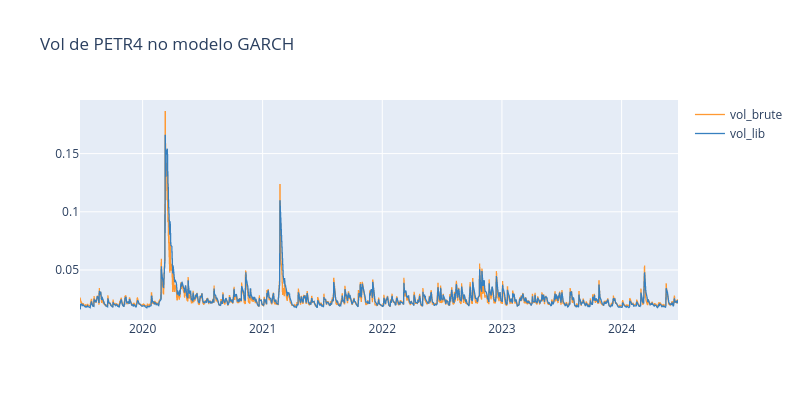

In [349]:
conditional.iplot(layout=dict(title=f'Vol de {codigo} no modelo GARCH', height = 400, width=800))

In [350]:
vols = pd.DataFrame()
vols['ewma1'] = ewma['vol_lib']
vols['ewma2'] = ewma['vol_brute']
vols['garch1'] = conditional['vol_lib']
vols['garch2'] = conditional['vol_brute']

vols['dp'] = r_desviopadrao
vols['longo prazo1'] = long_run2 # da lib
vols['longo prazo2'] = long_run

vols.round(decimals=3).iloc[::-1].head(3)

ewma1  ewma2  garch1  garch2     dp  longo prazo1  longo prazo2
Date                                                                       
2024-06-21  0.018  0.018   0.022   0.021  0.028         0.029         0.026
2024-06-20  0.018  0.018   0.022   0.022  0.028         0.029         0.026
2024-06-19  0.019  0.018   0.024   0.025  0.028         0.029         0.026

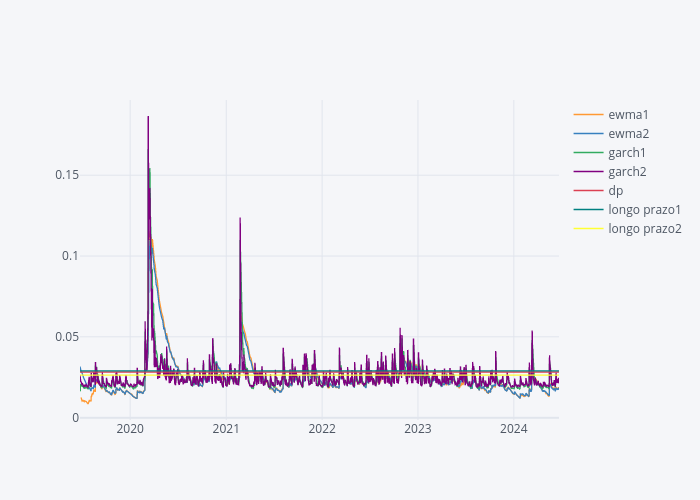

In [351]:
vols.iplot()

usando método de *forecast*

In [352]:
model_forecast = model_fitted.forecast(horizon=5)
model_forecast.mean

h.1       h.2       h.3       h.4       h.5
Date                                                        
2024-06-21  0.001934  0.001934  0.001934  0.001934  0.001934

In [353]:
model_forecast.variance

h.1       h.2       h.3       h.4       h.5
Date                                                        
2024-06-21  0.000411  0.000453  0.000492  0.000527  0.000558

In [354]:
model_forecast_vol = model_forecast.variance **0.5
model_forecast_vol

h.1       h.2      h.3       h.4       h.5
Date                                                       
2024-06-21  0.020262  0.021293  0.02218  0.022949  0.023619

In [355]:
model_forecast_vol_anual =  (model_forecast.variance * 252) **0.5
model_forecast_vol_anual
# model_vol_anual =  (model_forecast.variance[-1:] * 252) **0.5


h.1       h.2       h.3       h.4       h.5
Date                                                        
2024-06-21  0.321642  0.338012  0.352094  0.364301  0.374947

*forecast* em janelas móveis

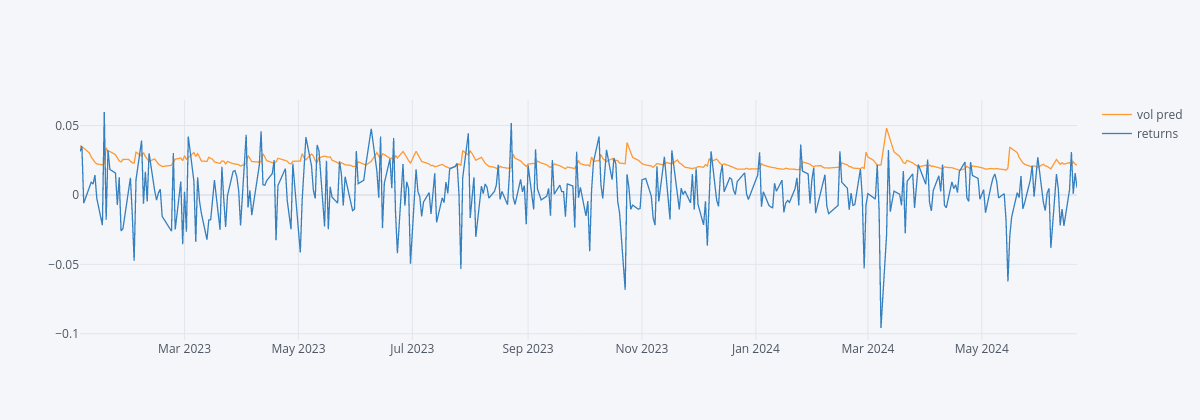

In [356]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = retornos['lr_'+codigo][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_pred = pd.DataFrame({'vol pred':rolling_predictions}, index=retornos['lr_'+codigo].index[-365:])
rolling_pred['returns'] = retornos['lr_'+codigo].iloc[-365:]

rolling_pred.iplot(dimensions=(1200,420))

#### Volatilidade histórica

Não existe um cálculo único para a volatilidade histórica. O número de dias para o cálculo da volatilidade histórica altera o cálculo. Não deverá, contudo, haver qualquer diferença entre a volatilidade histórica média diária ou semanal. Abaixo examinamos diferentes métodos de cálculo de volatilidade histórica, incluindo medidas avançadas de volatilidade, como Parkinson, Garman-Klass (incluindo extensão Yang-Zhang), Rogers e Satchell e Yang-Zhang. [MEASURING HISTORICAL VOLATILITY](https://dynamiproject.files.wordpress.com/2016/01/measuring_historic_volatility.pdf)

In [357]:
def standard_deviation(price_data, window=30, trading_periods=252, clean=True):

    log_return = (price_data / price_data.shift(1)).apply(np.log)
    result = log_return.rolling(window=window, center=False).std() * np.sqrt(trading_periods)

    if clean:
        return result.dropna()
    else:
        return result

def parkinson(price_data, window=30, trading_periods=252, clean=True):

    rs = (1.0 / (4.0 * np.log(2.0))) * ((price_data["High"] / price_data["Low"]).apply(np.log) ) ** 2.0

    def f(v):
        return (trading_periods * v.mean()) ** 0.5

    result = rs.rolling(window=window, center=False).apply(func=f)

    if clean:
        return result.dropna()
    else:
        return result

def garman_klass(price_data, window=30, trading_periods=252, clean=True):

    log_hl = (price_data["High"] / price_data["Low"]).apply(np.log)
    log_co = (price_data["Close"] / price_data["Open"]).apply(np.log)

    rs = 0.5 * log_hl ** 2 - (2 * np.log(2) - 1) * log_co ** 2

    def f(v):
        return (trading_periods * v.mean()) ** 0.5

    result = rs.rolling(window=window, center=False).apply(func=f)

    if clean:
        return result.dropna()
    else:
        return result
def hodges_tompkins(price_data, window=30, trading_periods=252, clean=True):

    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)

    vol = log_return.rolling(window=window, center=False).std() * np.sqrt(
        trading_periods
    )

    h = window
    n = (log_return.count() - h) + 1

    adj_factor = 1.0 / (1.0 - (h / n) + ((h ** 2 - 1) / (3 * n ** 2)))

    result = vol * adj_factor

    if clean:
        return result.dropna()
    else:
        return
def rogers_satchell(price_data, window=30, trading_periods=252, clean=True):

    log_ho = (price_data["High"] / price_data["Open"]).apply(np.log)
    log_lo = (price_data["Low"] / price_data["Open"]).apply(np.log)
    log_co = (price_data["Close"] / price_data["Open"]).apply(np.log)

    rs = log_ho * (log_ho - log_co) + log_lo * (log_lo - log_co)

    def f(v):
        return (trading_periods * v.mean()) ** 0.5

    result = rs.rolling(window=window, center=False).apply(func=f)

    if clean:
        return result.dropna()
    else:
        return result

def yang_zhang(price_data, window=30, trading_periods=252, clean=True):

    log_ho = (price_data["High"] / price_data["Open"]).apply(np.log)
    log_lo = (price_data["Low"] / price_data["Open"]).apply(np.log)
    log_co = (price_data["Close"] / price_data["Open"]).apply(np.log)

    log_oc = (price_data["Open"] / price_data["Close"].shift(1)).apply(np.log)
    log_oc_sq = log_oc ** 2

    log_cc = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)
    log_cc_sq = log_cc ** 2

    rs = log_ho * (log_ho - log_co) + log_lo * (log_lo - log_co)

    close_vol = log_cc_sq.rolling(window=window, center=False).sum() * (
        1.0 / (window - 1.0)
    )
    open_vol = log_oc_sq.rolling(window=window, center=False).sum() * (
        1.0 / (window - 1.0)
    )
    window_rs = rs.rolling(window=window, center=False).sum() * (1.0 / (window - 1.0))

    k = 0.34 / (1.34 + (window + 1) / (window - 1))
    result = (open_vol + k * close_vol + (1 - k) * window_rs).apply(
        np.sqrt
    ) * np.sqrt(trading_periods)

    if clean:
        return result.dropna()
    else:
        return result


In [358]:
HistVol = pd.DataFrame()

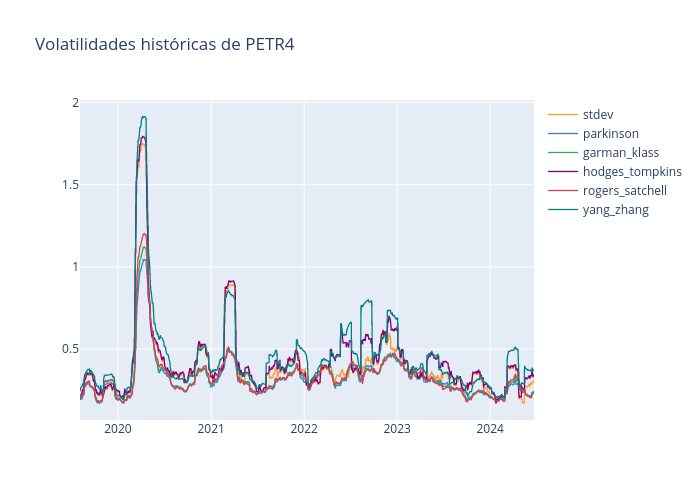

In [359]:
price_data = ativo.copy()

HistVol['stdev']= standard_deviation(price_data['Adj Close'], window=30, trading_periods=252, clean=True)

HistVol['parkinson']= parkinson(price_data, window=30, trading_periods=252, clean=True)

HistVol['garman_klass']= garman_klass(price_data, window=30, trading_periods=252, clean=True)

HistVol['hodges_tompkins']= hodges_tompkins(price_data, window=30, trading_periods=252, clean=True)

HistVol['rogers_satchell']= rogers_satchell(price_data, window=30, trading_periods=252, clean=True)

HistVol['yang_zhang']= yang_zhang(price_data, window=30, trading_periods=252, clean=True)

HistVol.iplot(layout=dict(title=f"Volatilidades históricas de {codigo}"))

# Futuros


In [360]:
symb = codigo[:4]
url1 = f'https://www.tradergrafico.com.br/opcoes/?TG=&opcrt=&opc={symb}'
#ptra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
#junta com a requests
r1 = requests.get(url1, headers=header)
dfs = pd.read_html(r1.text, decimal=',', thousands='.')
# dfs = dfs[0]
colunas={dfs[0].columns[i]:dfs[0].iloc[0].values[i] for i in range(len(dfs[0].columns))}
dfs = dfs[0].rename(columns=colunas)
dfs = dfs.drop(labels=0, axis=0)
dfs[dfs['Últ.Cotação']!=0.0]

Código      Hora Últ.Cotação No Negócios     Descrição  Vencimento  \
1     PETRR315W4  00:00:00     R$ 0,00           0   PETRE (PUT)  28/06/2024   
2     PETRF315W4  00:00:00     R$ 0,00           0   PETR (Call)  28/06/2024   
3     PETRR320W4  00:00:00     R$ 0,00           0   PETRE (PUT)  28/06/2024   
4     PETRF320W4  00:00:00     R$ 0,00           0   PETR (Call)  28/06/2024   
5     PETRR325W4  00:00:00     R$ 0,00           0   PETRE (PUT)  28/06/2024   
...          ...       ...         ...         ...           ...         ...   
1700    PETRD449  00:00:00     R$ 0,00           0  PETRE (Call)  17/04/2026   
1701     PETRP48  00:00:00     R$ 0,00           0   PETRE (PUT)  17/04/2026   
1702     PETRD48  00:00:00     R$ 0,00           0  PETRE (Call)  17/04/2026   
1703     PETRP50  00:00:00     R$ 0,00           0   PETRE (PUT)  17/04/2026   
1704     PETRD50  00:00:00     R$ 0,00           0  PETRE (Call)  17/04/2026   

     Exercício (R$)  
1          PN 31,50  
2          PN 31,50  
3          PN 32,00  
4          PN 32,00  
5          PN 32,50  
...             ...  
1700       PN 42,12  
1701       PN 45,12  
1702       PN 45,12  
1703       PN 47,12  
1704       PN 47,12  

[1704 rows x 7 columns]

In [361]:
dfs[dfs['Últ.Cotação']!="R$ 0,00"]

Código      Hora Últ.Cotação No Negócios     Descrição  Vencimento  \
334   PETRG580  00:00:00     R$ 0,01          15   PETR (Call)  19/07/2024   
335   PETRG487  00:00:00     R$ 0,01           5   PETR (Call)  19/07/2024   
336   PETRG461  00:00:00     R$ 0,03           6   PETR (Call)  19/07/2024   
337   PETRG456  00:00:00     R$ 0,04          44   PETR (Call)  19/07/2024   
338   PETRS340  00:00:00     R$ 0,05           4   PETRE (PUT)  19/07/2024   
...        ...       ...         ...         ...           ...         ...   
412   PETRG364  00:00:00     R$ 4,40          66  PETRE (Call)  19/07/2024   
684   PETRT388  00:00:00     R$ 0,71         111   PETRE (PUT)  16/08/2024   
685   PETRT398  00:00:00     R$ 0,97         137   PETRE (PUT)  16/08/2024   
686   PETRH419  00:00:00     R$ 1,09          66   PETR (Call)  16/08/2024   
1486   PETRL45  00:00:00     R$ 5,68           6   PETR (Call)  20/12/2024   

     Exercício (R$)  
334        PN 44,87  
335        PN 45,37  
336        PN 43,37  
337        PN 42,87  
338        PN 29,87  
...             ...  
412        PN 33,62  
684        PN 35,95  
685        PN 36,95  
686        PN 39,20  
1486       PN 35,13  

[83 rows x 7 columns]

## Preço das opções por BS


Preço da Call $ = SN(d_1) - K e^{-rt}N(d_2)$ e

Preço da Put $ = Ke^{-rt}N(-d_2)-SN(-d_1)$

$d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})t}{\sigma \cdot \sqrt{t}}$
e $d_2 = d_1 - \sigma \cdot \sqrt{t}$

S = preço subjacente (por ação)
K = preço de exercício (por ação)
σ = volatilidade (% a.a.)
rf = taxa de juros sem risco continuamente composta (% a.a.)
q = rendimento de dividendos compostos continuamente (% a.a.)
t = tempo até o vencimento (% do ano)

N(d) = Probabilidade de que uma variável aleatória padronizada e com distribuição normal, seja menor ou igual a d

No caso de considerar dividendos, ajuste em $S$: $S e^{-qt}$ onde $q$ é dy anual (continuously compounded dividend yield )


In [362]:
def call_option_price(S, E, T, rf, sigma, dyield=0.0):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*stats.norm.cdf(d1)-E*np.exp(-rf*T)*stats.norm.cdf(d2) , d1 , d2


def put_option_price(S, E, T, rf, sigma, dyield=0.0):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S*stats.norm.cdf(-d1)+E*np.exp(-rf*T)*stats.norm.cdf(-d2) , -d1 , -d2


def gregas(tipo, S, E, T, rf, sigma, dyield=0.0):

    ## https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model#The_Options_Greeks
    ## https://www.macroption.com/black-scholes-formula/

    if dyield>0.0 and T>0.0: ajuste=np.exp(-dyield*T)
    else: ajuste =1.0

    _ , d1 , d2 =  call_option_price(S, E, T, rf, sigma, dyield)

    ## DELTA

    if tipo == "call": delta = ajuste*stats.norm.cdf(d1)
    elif tipo == "put": delta = ajuste*(stats.norm.cdf(d1)-1.0)

    ## GAMMA

    cdf_d1_prime=np.exp(-0.5*d1*d1)/np.sqrt(2.0*np.pi)

    gamma = ajuste*cdf_d1_prime/(S*sigma*np.sqrt(T))

    ## THETA

    if tipo == "call":
        theta = (1/365)*(-(S*sigma*ajuste*cdf_d1_prime/(2.0*np.sqrt(T))-rf*E*np.exp(-rf*T)*stats.norm.cdf(d2) - dyield*S*ajuste*stats.norm.cdf(d1)))
    elif tipo == "put":
        theta = (1/365)*(-(S*sigma*ajuste*cdf_d1_prime/(2.0*np.sqrt(T))+rf*E*np.exp(-rf*T)*stats.norm.cdf(-d2) + dyield*S*ajuste*stats.norm.cdf(-d1)))

    ## VEGA

    vega = S*cdf_d1_prime*np.sqrt(T)

    ## RHO

    if tipo == "call":
        rho = E*T*np.exp(-rf*T)*stats.norm.cdf(d2)
    elif tipo == "put":
        rho = E*T*np.exp(-rf*T)*stats.norm.cdf(-d2)

    return delta , gamma , theta , vega , rho

def get_third_fridays(n):

    from dateutil.relativedelta import relativedelta,FR

    output= []
    today = datetime.now() #gets current system date
    f_friday = today+ relativedelta(day=1, weekday=FR(3))
    output.append(f_friday.strftime("%Y-%m-%d"))
    for i in range(1,n+1): #value of i varies from 1 to 6 if n=6
        next_month = today + relativedelta(months=+i) #adds i months to current system date

        third_friday = next_month+ relativedelta(day=1, weekday=FR(3))
        #find_mth_friday(next_month,3) #finds third friday of the month using 'find_mth_friday()', the function we defined
        output.append(third_friday.strftime("%Y-%m-%d"))
    return output



In [363]:
print('Próximos vencimentos: ',*get_third_fridays(4))

Próximos vencimentos:  2024-06-21 2024-07-19 2024-08-16 2024-09-20 2024-10-18


In [364]:
T = (datetime.strptime(get_third_fridays(1)[1] , "%Y-%m-%d")-datetime.today()).days/252
r = np.log(1+.1125)/T

In [365]:

print("(delta , gamma , theta , vega , rho) =")
gregas(tipo="call", S=34.55 , E=35.39 , T=T, rf=.1125, sigma= .145 , dyield=0.12)

(delta , gamma , theta , vega , rho) =


(0.39319817349162456,
 0.2416093416569273,
 0.00026297603580684853,
 4.198435329387889,
 1.3207172274114733)

In [366]:
print("selic atual (%): ",selic.tail(1).values[0][0])

selic atual (%):  10.5


In [367]:
#data
vencimento = get_third_fridays(2)[1]
venc= datetime.strptime(vencimento, '%Y-%m-%d')

hoje= preco.index[-1]
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
# taxa livre risco
r =  np.log((selic.iloc[-1]/100).values[0]+1)
# preço
S = preco[codigo].iloc[-1]
# volatilidade
sigma = vols['ewma1'].iloc[-1]*np.sqrt(252)
# sigma = vols['g-model'].iloc[-1]*np.sqrt(252)

# strikes

mm = ( preco[codigo][-21:-1].dropna()).mean()  #preço médio
ss = ( preco[codigo][-21:-1].dropna()).std()   #dp do preço
Ss= mm-3*ss
Sa= mm-2*ss
Sb= mm-1*ss
Sc= mm+1*ss
Sd= mm+2*ss
Se= mm+3*ss



In [368]:
bs_data = [
    [ '{:0.2f}'.format(Ss) , round(call_option_price(S,Ss, t, r, sigma)[0],2)  ,round(put_option_price(S,Ss, t, r, sigma)[0],2) ] ,
    [ '{:0.2f}'.format(Sa) , round(call_option_price(S,Sa, t, r, sigma)[0],2)  ,round(put_option_price(S,Sa, t, r, sigma)[0],2) ] ,
    [ '{:0.2f}'.format(Sb) , round(call_option_price(S,Sb, t, r, sigma)[0],2)  ,round(put_option_price(S,Sb, t, r, sigma)[0],2) ] ,
    [ '{:0.2f}'.format(mm) , round(call_option_price(S,mm, t, r, sigma)[0],2)  ,round(put_option_price(S,mm, t, r, sigma)[0],2) ] ,
    [ '{:0.2f}'.format(S)  , round(call_option_price(S,S , t, r, sigma)[0],2)  ,round(put_option_price(S ,S, t, r, sigma)[0],2) ] ,
    [ '{:0.2f}'.format(Sc) , round(call_option_price(S,Sc, t, r, sigma)[0],2)  ,round(put_option_price(S,Sc, t, r, sigma)[0],2) ] ,
    [ '{:0.2f}'.format(Sd) , round(call_option_price(S,Sd, t, r, sigma)[0],2)  ,round(put_option_price(S,Sd, t, r, sigma)[0],2) ] ,
    [ '{:0.2f}'.format(Se) , round(call_option_price(S,Se, t, r, sigma)[0],2)  ,round(put_option_price(S,Se, t, r, sigma)[0],2) ]
]


BS = pd.DataFrame(bs_data , columns=['preço '+codigo, 'preço Call' , 'preço Put'] )
BS

preço PETR4  preço Call  preço Put
0       33.76        3.38       0.19
1       34.60        2.70       0.33
2       35.44        2.08       0.56
3       36.29        1.55       0.86
4       36.69        1.33       1.04
5       37.13        1.12       1.26
6       37.97        0.78       1.76
7       38.81        0.52       2.33

In [369]:
#@markdown preço teórico a partir de outros parâmetros
#@markdown usando BS e Monte Carlo

# preço
S=34.81 #@param {type:"number"}
print('preço  do ativo',S)

# data
vencimento = "2025-06-20"    #@param {type:"date"}
hoje= preco.index[-1]
venc= datetime.strptime(vencimento, '%Y-%m-%d')
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
print("vencimento em "+str(res)+" dias (",t,"anos)")

# strike
strike=34.67  #@param {type:"number"}

# selic
juros = 10.5 #@param {type:"number"}
r=np.log(juros/100+1)
# vol
volatilidade ='EWMA'  #@param ['GARCH' , 'EWMA' ,'Desvio Padrao' ]

if volatilidade == 'GARCH'  :
	sigma = vols['garch1'].iloc[-1]*np.sqrt(252)
elif volatilidade == 'EWMA' :
	sigma = vols['ewma1'].iloc[-1]*np.sqrt(252)
else : sigma = vols['dp'].iloc[-1]*np.sqrt(252)

print("Preços dos derivativos pelo modelo Black-Scholes")
print("Call: ", round(call_option_price(S, strike, t, r, sigma)[0],2))
print("Put: ", round(put_option_price(S, strike, t, r, sigma)[0],2))


preço  do ativo 34.81
vencimento em 260 dias ( 1.0317460317460319 anos)
Preços dos derivativos pelo modelo Black-Scholes
Call:  5.86
Put:  2.33


In [370]:
# Monte Carlo
def call_option_simulation(S0,E,T,rf,sigma,iterations):
	option_data = np.zeros([iterations, 2])
	rand = np.random.normal(0, 1, [1, iterations])
	#equation for the S(t) stock price
	stock_price = S0*np.exp(T*(r - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
	#we need S-E because we have to calculate the max(S-E,0)
	option_data[:,1] = stock_price - E
	#average for the Monte-Carlo method
	#np.amax() returns the max(0,S-E) according to the formula
	average = np.sum(np.amax(option_data, axis=1))/float(iterations)
	#have to use the np.exp(-rT) discount factor
	return np.exp(-1.0*rf*T)*average

def put_option_simulation(S0,E,T,rf,sigma,iterations):
 option_data = np.zeros([iterations, 2])
 rand = np.random.normal(0, 1, [1, iterations])
 stock_price = S0*np.exp(T*(rf - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
 option_data[:,1] = E - stock_price
 average = np.sum(np.amax(option_data, axis=1))/float(iterations)
 return np.exp(-1.0*rf*T)*average


rodadas = 1000	#number of iterations in the Monte-Carlo simulation


print("Preços dos derivativos por simulação Monte Carlo")
print("Call: ", round(call_option_simulation(S,strike,t,r,sigma,rodadas),2))
print("Put: ", round(put_option_simulation(S,strike,t,r,sigma,rodadas),2))

Preços dos derivativos por simulação Monte Carlo
Call:  5.8
Put:  2.27


# Macro

In [371]:
# pd.read_html('https://www.anbima.com.br/informacoes/est-termo/CZ.asp',
#                    encoding='iso-8859-1',thousands='.',decimal=',')[4]
'''
estranho mas o comportamento é dierente pc X colab
'''


pd.read_html('https://www.anbima.com.br/informacoes/est-termo/CZ.asp',
                   encoding='iso-8859-1',thousands='.',decimal=',')[5][1:]

ETTJ / Inflação Implicita (IPCA) (%a.a./252)                       \
                                       Vértices  ETTJ IPCA  ETTJ PRE   
1                                      Vértices  ETTJ IPCA  ETTJ PRE   
2                                           126     7.0073   10.4252   
3                                           252     6.2034   10.7647   
4                                           378     6.1885   11.0581   
5                                           504     6.2488   11.3050   
..                                          ...        ...       ...   
68                                         8442     6.3756       NaN   
69                                         8568     6.3794       NaN   
70                                         8694     6.3831       NaN   
71                                         8820     6.3868       NaN   
72                                         8946     6.3905       NaN   

                        
    Inflação Implícita  
1   Inflação Implícita  
2               3.1940  
3               4.2948  
4               4.5858  
5               4.7588  
..                 ...  
68                 NaN  
69                 NaN  
70                 NaN  
71                 NaN  
72                 NaN  

[72 rows x 4 columns]

In [372]:
web=pd.DataFrame()
web = pd.read_html('https://www.anbima.com.br/informacoes/est-termo/CZ.asp',
                    encoding='iso-8859-1',thousands='.',decimal=',',
                    # converters={'*': lambda x: pd.to_numeric(x, errors='coerce')}
                    )[5].loc[2:]
web.columns = ['Vertices','IPCA','PRE','II']

web['Vertices']=web['Vertices'].astype(int)
web['IPCA']=web['IPCA'].astype(float)
web['PRE']=web['PRE'].astype(float)
web['II']=web['II'].astype(float)



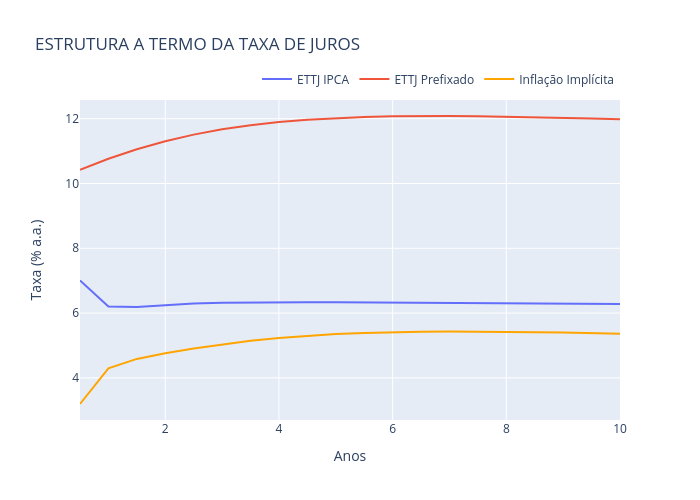

In [373]:
fig=go.Figure()
x = np.array(web['Vertices'][:20]/252)

fig.add_trace(go.Scatter(x=x, y=web['IPCA'][:20], mode='lines', name='ETTJ IPCA'))
fig.add_trace(go.Scatter(x=x, y=web['PRE'][:20], mode='lines', name='ETTJ Prefixado'))
fig.add_trace(go.Scatter(x=x, y=web['II'][:20], mode='lines', name='Inflação Implícita',
                         line=dict(color='orange')))

fig.update_layout(title='ESTRUTURA A TERMO DA TAXA DE JUROS',
                   xaxis_title='Anos',
                   yaxis_title='Taxa (% a.a.)',
                   legend=dict(orientation="h",
                              yanchor="bottom",
                              y=1.02,
                              xanchor="right",
                              x=1
))

fig.show()

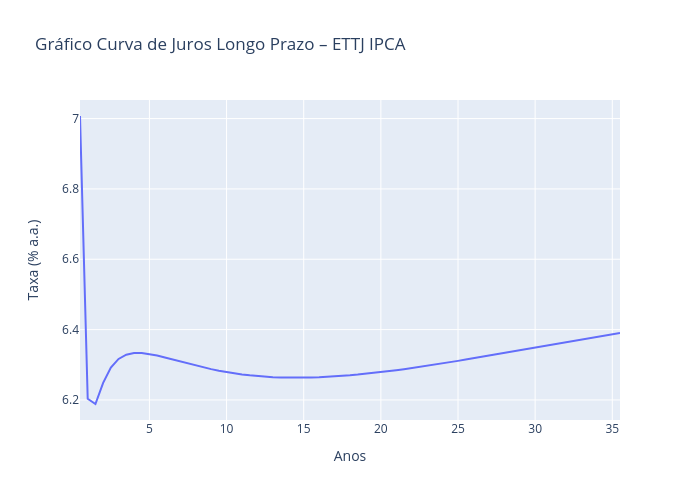

In [374]:
fig=go.Figure()
x = np.array(web['Vertices']/252)
fig.add_trace(go.Scatter(x=x, y=web['IPCA'], mode='lines', name='Juros reais',))
fig.update_layout(title='Gráfico Curva de Juros Longo Prazo – ETTJ IPCA',
                   xaxis_title='Anos',
                   yaxis_title='Taxa (% a.a.)')
fig.show()

[Empirical properties of asset returns:
stylized facts and statistical issues](https://http://finance.martinsewell.com/stylized-facts/dependence/Cont2001.pdf)

In [ ]:
print('ok')